# COVID-19 Tweet Misinformation Detection using BERT

Contributers:
Sumit Kumar<br>
Raj Ratn Pranesh<br>
Prof Dr Kathleen Carley

# DistilBERT

In [ ]:
!pip install transformers==2.3.0

We then load and inspect the dataset we had previously prepared. In order to train faster, we use the sampled version, which contains 10% of the original prepared dataset.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/result_31.csv', encoding='latin-1')

In [ ]:
df.shape

(1970, 4)

In [ ]:
df

,ID,Primary,text,Product_Labels
0,1.005030e+05,three,Snake oil Salesmen are not gone. They have jus...,3
1,1.009760e+05,three,Fact check: Gargling water with salt or vinega...,3
2,1.011710e+05,zero,".. this is great advice. Also, stop fighting f...",0
3,1.017920e+05,three,"14 people in Iran died from alcohol poisoning,...",3
4,1.037400e+05,one,"To be fair, China is not the only country alle...",1
...,...,...,...,...
1965,1.230000e+18,one,@TheSecondRevol1 @VincentCrypt46 I have been s...,1
1966,1.230000e+18,one,If anyone is aware of the 5G theory related to...,1
1967,1.230000e+18,one,@ClydeLewis @ClydeLewis have you looked into 5...,1
1968,1.230000e+18,one,How many have the âVirusâ where thereâs...,1


Clean(tweet)

In [ ]:

import re
import string
def clean(tweet):
            
    # Special characters
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)    
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    tweet = re.sub(r"å£3million", "3 million", tweet)
    tweet = re.sub(r"åÀ", "", tweet)
    
    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)   
            
    # Character entity references
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # Typos, slang and informal abbreviations
    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/", "with", tweet)
    tweet = re.sub(r"USAgov", "USA government", tweet)
    tweet = re.sub(r"recentlu", "recently", tweet)
    tweet = re.sub(r"Ph0tos", "Photos", tweet)
    tweet = re.sub(r"amirite", "am I right", tweet)
    tweet = re.sub(r"exp0sed", "exposed", tweet)
    tweet = re.sub(r"<3", "love", tweet)
    tweet = re.sub(r"amageddon", "armageddon", tweet)
    tweet = re.sub(r"Trfc", "Traffic", tweet)
    tweet = re.sub(r"8/5/2015", "2015-08-05", tweet)
    tweet = re.sub(r"WindStorm", "Wind Storm", tweet)
    tweet = re.sub(r"8/6/2015", "2015-08-06", tweet)
    tweet = re.sub(r"10:38PM", "10:38 PM", tweet)
    tweet = re.sub(r"10:30pm", "10:30 PM", tweet)
    tweet = re.sub(r"16yr", "16 year", tweet)
    tweet = re.sub(r"lmao", "laughing my ass off", tweet)   
    tweet = re.sub(r"TRAUMATISED", "traumatized", tweet)
    
  # re.sub(r"humanconsumption", "human consumption", tweet)
  #   tweet = re.sub(r"Typhoon-Devastated", "Typhoon Devastated", tweet)
  #   tweet = re.sub(r"Meat-Loving", "Meat Loving", tweet)
  #   tweet = re.sub(r"facialabuse", "facial abuse", tweet)
  #   tweet = re.sub(r"LakeCounty", "Lake County", tweet)
  #   tweet = re.sub(r"BeingAuthor", "Being Author", tweet)
  #   tweet = re.sub(r"withheavenly", "with heavenly", tweet)
  #   tweet = re.sub(r"thankU", "thank you", tweet)
  #   tweet = re.sub(r"iTunesMusic", "iTunes Music", tweet)
  #   tweet = re.sub(r"OffensiveContent", "Offensive Content", tweet)
  #   tweet = re.sub(r"WorstSummerJob", "Worst Summer Job", tweet)
  #   tweet = re.sub(r"HarryBeCareful", "Harry Be Careful", tweet)
  #   tweet = re.sub(r"NASASolarSystem", "NASA Solar System", tweet)
  #   tweet = re.sub(r"animalrescue", "animal rescue", tweet)
  #   tweet = re.sub(r"KurtSchlichter", "Kurt Schlichter", tweet)
  #   tweet = re.sub(r"aRmageddon", "armageddon", tweet)
  #   tweet = re.sub(r"Throwingknifes", "Throwing knives", tweet)
  #   tweet = re.sub(r"GodsLove", "God's Love", tweet)
  #   tweet = re.sub(r"bookboost", "book boost", tweet)
  #   tweet = re.sub(r"ibooklove", "I book love", tweet)
  #   tweet = re.sub(r"NestleIndia", "Nestle India", tweet)
  #   tweet = re.sub(r"realDonaldTrump", "Donald Trump", tweet)
  #   tweet = re.sub(r"DavidVonderhaar", "David Vonderhaar", tweet)
  #   tweet = re.sub(r"CecilTheLion", "Cecil The Lion", tweet)
  #   tweet = re.sub(r"weathernetwork", "weather network", tweet)
  #   tweet = re.sub(r"withBioterrorism  # Hashtags and usernames
  #   tweet = re.sub(r"IranDeal", "Iran Deal", tweet)
  #   tweet = re.sub(r"ArianaGrande", "Ariana Grande", tweet)
  #   tweet = re.sub(r"camilacabello97", "camila cabello", tweet) 
  #   tweet = re.sub(r"RondaRousey", "Ronda Rousey", tweet)     
  #   tweet = re.sub(r"MTVHottest", "MTV Hottest", tweet)
  #   tweet = re.sub(r"TrapMusic", "Trap Music", tweet)
  #   tweet = re.sub(r"ProphetMuhammad", "Prophet Muhammad", tweet)
  #   tweet = re.sub(r"PantherAttack", "Panther Attack", tweet)
  #   tweet = re.sub(r"StrategicPatience", "Strategic Patience", tweet)
  #   tweet = re.sub(r"socialnews", "social news", tweet)
  #   tweet = re.sub(r"NASAHurricane", "NASA Hurricane", tweet)
  #   tweet = re.sub(r"onlinecommunities", "online communities", tweet)
  #   tweet = &use", "with Bioterrorism & use", tweet)
  #   tweet = re.sub(r"Hostage&2", "Hostage & 2", tweet)
  #   tweet = re.sub(r"GOPDebate", "GOP Debate", tweet)
  #   tweet = re.sub(r"RickPerry", "Rick Perry", tweet)
  #   tweet = re.sub(r"frontpage", "front page", tweet)
  #   tweet = re.sub(r"NewsInTweets", "News In Tweets", tweet)
  #   tweet = re.sub(r"ViralSpell", "Viral Spell", tweet)
  #   tweet = re.sub(r"til_now", "until now", tweet)
  #   tweet = re.sub(r"volcanoinRussia", "volcano in Russia", tweet)
  #   tweet = re.sub(r"ZippedNews", "Zipped News", tweet)
  #   tweet = re.sub(r"MicheleBachman", "Michele Bachman", tweet)
  #   tweet = re.sub(r"53inch", "53 inch", tweet)
  #   tweet = re.sub(r"KerrickTrial", "Kerrick Trial", tweet)
  #   tweet = re.sub(r"abstorm", "Alberta Storm", tweet)
  #   tweet = re.sub(r"Beyhive", "Beyonce hive", tweet)
  #   tweet = re.sub(r"IDFire", "Idaho Fire", tweet)
  #   tweet = re.sub(r"DETECTADO", "Detected", tweet)
  #   tweet = re.sub(r"RockyFire", "Rocky Fire", tweet)
  #   tweet = re.sub(r"Listen/Buy", "Listen / Buy", tweet)
  #   tweet = re.sub(r"NickCannon", "Nick Cannon", tweet)
  #   tweet = re.sub(r"FaroeIslands", "Faroe Islands", tweet)
  #   tweet = re.sub(r"yycstorm", "Calgary Storm", tweet)
  #   tweet = re.sub(r"IDPs:", "Internally Displaced People :", tweet)
  #   tweet = re.sub(r"ArtistsUnited", "Artists United", tweet)
  #   tweet = re.sub(r"ClaytonBryant", "Clayton Bryant", tweet)
  #   tweet = re.sub(r"jimmyfallon", "jimmy fallon", tweet)
  #   tweet = re.sub(r"justinbieber", "justin bieber", tweet)  
  #   tweet = re.sub(r"UTC2015", "UTC 2015", tweet)
  #   tweet = re.sub(r"Time2015", "Time 2015", tweet)
  #   tweet = re.sub(r"djicemoon", "dj icemoon", tweet)
  #   tweet = re.sub(r"LivingSafely", "Living Safely", tweet)
  #   tweet = re.sub(r"FIFA16", "Fifa 2016", tweet)
  #   tweet = re.sub(r"thisiswhywecanthavenicethings", "this is why we cannot have nice things", tweet)
  #   tweet = re.sub(r"bbcnews", "bbc news", tweet)
  #   tweet = re.sub(r"UndergroundRailraod", "Underground Railraod", tweet)
  #   tweet = re.sub(r"c4news", "c4 news", tweet)
  #   tweet = re.sub(r"OBLITERATION", "obliteration", tweet)
  #   tweet = re.sub(r"MUDSLIDE", "mudslide", tweet)
  #   tweet = re.sub(r"NoSurrender", "No Surrender", tweet)
  #   tweet = re.sub(r"NotExplained", "Not Explained", tweet)
  #   tweet = re.sub(r"greatbritishbakeoff", "great british bake off", tweet)
  #   tweet = re.sub(r"LondonFire", "London Fire", tweet)
  #   tweet = re.sub(r"KOTAWeather", "KOTA Weather", tweet)
  #   tweet = re.sub(r"LuchaUnderground", "Lucha Underground", tweet)
  #   tweet = re.sub(r"KOIN6News", "KOIN 6 News", tweet)
  #   tweet = re.sub(r"LiveOnK2", "Live On K2", tweet)
  #   tweet = re.sub(r"9NewsGoldCoast", "9 News Gold Coast", tweet)
  #   tweet = re.sub(r"nikeplus", "nike plus", tweet)
  #   tweet = re.sub(r"david_cameron", "David Cameron", tweet)
  #   tweet = re.sub(r"peterjukes", "Peter Jukes", tweet)
  #   tweet = re.sub(r"JamesMelville", "James Melville", tweet)
  #   tweet = re.sub(r"megynkelly", "Megyn Kelly", tweet)
  #   tweet = re.sub(r"cnewslive", "C News Live", tweet)
  #   tweet = re.sub(r"JamaicaObserver", "Jamaica Observer", tweet)
  #   tweet = re.sub(r"TweetLikeItsSeptember11th2001", "Tweet like it is september 11th 2001", tweet)
  #   tweet = re.sub(r"cbplawyers", "cbp lawyers", tweet)
  #   tweet = re.sub(r"fewmoretweets", "few more tweets", tweet)
  #   tweet = re.sub(r"BlackLivesMatter", "Black Lives Matter", tweet)
  #   tweet = re.sub(r"cjoyner", "Chris Joyner", tweet)
  #   tweet = re.sub(r"ENGvAUS", "England vs Australia", tweet)
  #   tweet = re.sub(r"ScottWalker", "Scott Walker", tweet)
  #   tweet = re.sub(r"MikeParrActor", "Michael Parr", tweet)
  #   tweet = re.sub(r"4PlayThursdays", "Foreplay Thursdays", tweet)
  #   tweet = re.sub(r"TGF2015", "Tontitown Grape Festival", tweet)
  #   tweet = re.sub(r"realmandyrain", "Mandy Rain", tweet)
  #   tweet = re.sub(r"GraysonDolan", "Grayson Dolan", tweet)
  #   tweet = re.sub(r"ApolloBrown", "Apollo Brown", tweet)
  #   tweet = re.sub(r"saddlebrooke", "Saddlebrooke", tweet)
  #   tweet = re.sub(r"TontitownGrape", "Tontitown Grape", tweet)
  #   tweet = re.sub(r"AbbsWinston", "Abbs Winston", tweet)
  #   tweet = re.sub(r"ShaunKing", "Shaun King", tweet)
  #   tweet = re.sub(r"MeekMill", "Meek Mill", tweet)
  #   tweet = re.sub(r"TornadoGiveaway", "Tornado Giveaway", tweet)
  #   tweet = re.sub(r"GRupdates", "GR updates", tweet)
  #   tweet = re.sub(r"SouthDowns", "South Downs", tweet)
  #   tweet = re.sub(r"braininjury", "brain injury", tweet)
  #   tweet = re.sub(r"auspol", "Australian politics", tweet)
  #   tweet = re.sub(r"PlannedParenthood", "Planned Parenthood", tweet)
  #   tweet = re.sub(r"calgaryweather", "Calgary Weather", tweet)
  #   tweet = re.sub(r"weallheartonedirection", "we all heart one direction", tweet)
  #   tweet = re.sub(r"edsheeran", "Ed Sheeran", tweet)
  #   tweet = re.sub(r"TrueHeroes", "True Heroes", tweet)
  #   tweet = re.sub(r"S3XLEAK", "sex leak", tweet)
  #   tweet = re.sub(r"ComplexMag", "Complex Magazine", tweet)
  #   tweet = re.sub(r"TheAdvocateMag", "The Advocate Magazine", tweet)
  #   tweet = re.sub(r"CityofCalgary", "City of Calgary", tweet)
  #   tweet = re.sub(r"EbolaOutbreak", "Ebola Outbreak", tweet)
  #   tweet = re.sub(r"SummerFate", "Summer Fate", tweet)
  #   tweet = re.sub(r"RAmag", "Royal Academy Magazine", tweet)
  #   tweet = re.sub(r"offers2go", "offers to go", tweet)
  #   tweet = re.sub(r"foodscare", "food scare", tweet)
  #   tweet = re.sub(r"MNPDNashville", "Metropolitan Nashville Police Department", tweet)
  #   tweet = re.sub(r"TfLBusAlerts", "TfL Bus Alerts", tweet)
  #   tweet = re.sub(r"GamerGate", "Gamer Gate", tweet)
  #   tweet = re.sub(r"IHHen", "Humanitarian Relief", tweet)
  #   tweet = re.sub(r"spinningbot", "spinning bot", tweet)
  #   tweet = re.sub(r"ModiMinistry", "Modi Ministry", tweet)
  #   tweet = re.sub(r"TAXIWAYS", "taxi ways", tweet)
  #   tweet = re.sub(r"Calum5SOS", "Calum Hood", tweet)
  #   tweet = re.sub(r"po_st", "po.st", tweet)
  #   tweet = re.sub(r"scoopit", "scoop.it", tweet)
  #   tweet = re.sub(r"UltimaLucha", "Ultima Lucha", tweet)
  #   tweet = re.sub(r"JonathanFerrell", "Jonathan Ferrell", tweet)
  #   tweet = re.sub(r"aria_ahrary", "Aria Ahrary", tweet)
  #   tweet = re.sub(r"rapidcity", "Rapid City", tweet)
  #   tweet = re.sub(r"OutBid", "outbid", tweet)
  #   tweet = re.sub(r"lavenderpoetrycafe", "lavender poetry cafe", tweet)
  #   tweet = re.sub(r"EudryLantiqua", "Eudry Lantiqua", tweet)
  #   tweet = re.sub(r"15PM", "15 PM", tweet)
  #   tweet = re.sub(r"OriginalFunko", "Funko", tweet)
  #   tweet = re.sub(r"rightwaystan", "Richard Tan", tweet)
  #   tweet = re.sub(r"CindyNoonan", "Cindy Noonan", tweet)
  #   tweet = re.sub(r"RT_America", "RT America", tweet)
  #   tweet = re.sub(r"narendramodi", "Narendra Modi", tweet)
  #   tweet = re.sub(r"BakeOffFriends", "Bake Off Friends", tweet)
  #   tweet = re.sub(r"TeamHendrick", "Hendrick Motorsports", tweet)
  #   tweet = re.sub(r"alexbelloli", "Alex Belloli", tweet)
  #   tweet = re.sub(r"itsjustinstuart", "Justin Stuart", tweet)
  #   tweet = re.sub(r"gunsense", "gun sense", tweet)
  #   tweet = re.sub(r"DebateQuestionsWeWantToHear", "debate questions we want to hear", tweet)
  #   tweet = re.sub(r"RoyalCarribean", "Royal Carribean", tweet)
  #   tweet = re.sub(r"samanthaturne19", "Samantha Turner", tweet)
  #   tweet = re.sub(r"JonVoyage", "Jon Stewart", tweet)
  #   tweet = re.sub(r"renew911health", "renew 911 health", tweet)
  #   tweet = re.sub(r"SuryaRay", "Surya Ray", tweet)
  #   tweet = re.sub(r"pattonoswalt", "Patton Oswalt", tweet)
  #   tweet = re.sub(r"minhazmerchant", "Minhaz Merchant", tweet)
  #   tweet = re.sub(r"TLVFaces", "Israel Diaspora Coalition", tweet)
  #   tweet = re.sub(r"pmarca", "Marc Andreessen", tweet)
  #   tweet = re.sub(r"pdx911", "Portland Police", tweet)
  #   tweet = re.sub(r"jamaicaplain", "Jamaica Plain", tweet)
  #   tweet = re.sub(r"Japton", "Arkansas", tweet)
  #   tweet = re.sub(r"RouteComplex", "Route Complex", tweet)
  #   tweet = re.sub(r"INSubcontinent", "Indian Subcontinent", tweet)
  #   tweet = re.sub(r"NJTurnpike", "New Jersey Turnpike", tweet)
  #   tweet = re.sub(r"Politifiact", "PolitiFact", tweet)
  #   tweet = re.sub(r"Hiroshima70", "Hiroshima", tweet)
  #   tweet = re.sub(r"GMMBC", "Greater Mt Moriah Baptist Church", tweet)
  #   tweet = re.sub(r"versethe", "verse the", tweet)
  #   tweet = re.sub(r"TubeStrike", "Tube Strike", tweet)
  #   tweet = re.sub(r"MissionHills", "Mission Hills", tweet)
  #   tweet = re.sub(r"ProtectDenaliWolves", "Protect Denali Wolves", tweet)
  #   tweet = re.sub(r"NANKANA", "Nankana", tweet)
  #   tweet = re.sub(r"SAHIB", "Sahib", tweet)
  #   tweet = re.sub(r"PAKPATTAN", "Pakpattan", tweet)
  #   tweet = re.sub(r"Newz_Sacramento", "News Sacramento", tweet)
  #   tweet = re.sub(r"gofundme", "go fund me", tweet)
  #   tweet = re.sub(r"pmharper", "Stephen Harper", tweet)
  #   tweet = re.sub(r"IvanBerroa", "Ivan Berroa", tweet)
  #   tweet = re.sub(r"LosDelSonido", "Los Del Sonido", tweet)
  #   tweet = re.sub(r"bancodeseries", "banco de series", tweet)
  #   tweet = re.sub(r"timkaine", "Tim Kaine", tweet)
  #   tweet = re.sub(r"IdentityTheft", "Identity Theft", tweet)
  #   tweet = re.sub(r"AllLivesMatter", "All Lives Matter", tweet)
  #   tweet = re.sub(r"mishacollins", "Misha Collins", tweet)
  #   tweet = re.sub(r"BillNeelyNBC", "Bill Neely", tweet)
  #   tweet = re.sub(r"BeClearOnCancer", "be clear on cancer", tweet)
  #   tweet = re.sub(r"Kowing", "Knowing", tweet)
  #   tweet = re.sub(r"ScreamQueens", "Scream Queens", tweet)
  #   tweet = re.sub(r"AskCharley", "Ask Charley", tweet)
  #   tweet = re.sub(r"BlizzHeroes", "Heroes of the Storm", tweet)
  #   tweet = re.sub(r"BradleyBrad47", "Bradley Brad", tweet)
  #   tweet = re.sub(r"HannaPH", "Typhoon Hanna", tweet)
  #   tweet = re.sub(r"meinlcymbals", "MEINL Cymbals", tweet)
  #   tweet = re.sub(r"Ptbo", "Peterborough", tweet)
  #   tweet = re.sub(r"cnnbrk", "CNN Breaking News", tweet)
  #   tweet = re.sub(r"IndianNews", "Indian News", tweet)
  #   tweet = re.sub(r"savebees", "save bees", tweet)
  #   tweet = re.sub(r"GreenHarvard", "Green Harvard", tweet)
  #   tweet = re.sub(r"StandwithPP", "Stand with planned parenthood", tweet)
  #   tweet = re.sub(r"hermancranston", "Herman Cranston", tweet)
  #   tweet = re.sub(r"WMUR9", "WMUR-TV", tweet)
  #   tweet = re.sub(r"RockBottomRadFM", "Rock Bottom Radio", tweet)
  #   tweet = re.sub(r"ameenshaikh3", "Ameen Shaikh", tweet)
  #   tweet = re.sub(r"ProSyn", "Project Syndicate", tweet)
  #   tweet = re.sub(r"Daesh", "ISIS", tweet)
  #   tweet = re.sub(r"s2g", "swear to god", tweet)
  #   tweet = re.sub(r"listenlive", "listen live", tweet)
  #   tweet = re.sub(r"CDCgov", "Centers for Disease Control and Prevention", tweet)
  #   tweet = re.sub(r"FoxNew", "Fox News", tweet)
  #   tweet = re.sub(r"CBSBigBrother", "Big Brother", tweet)
  #   tweet = re.sub(r"JulieDiCaro", "Julie DiCaro", tweet)
  #   tweet = re.sub(r"theadvocatemag", "The Advocate Magazine", tweet)
  #   tweet = re.sub(r"RohnertParkDPS", "Rohnert Park Police Department", tweet)
  #   tweet = re.sub(r"THISIZBWRIGHT", "Bonnie Wright", tweet)
  #   tweet = re.sub(r"Popularmmos", "Popular MMOs", tweet)
  #   tweet = re.sub(r"WildHorses", "Wild Horses", tweet)
  #   tweet = re.sub(r"FantasticFour", "Fantastic Four", tweet)
  #   tweet = re.sub(r"HORNDALE", "Horndale", tweet)
  #   tweet = re.sub(r"PINER", "Piner", tweet)
  #   tweet = re.sub(r"BathAndNorthEastSomerset", "Bath and North East Somerset", tweet)
  #   tweet = re.sub(r"thatswhatfriendsarefor", "that is what friends are for", tweet)
  #   tweet = re.sub(r"residualincome", "residual income", tweet)
  #   tweet = re.sub(r"YahooNewsDigest", "Yahoo News Digest", tweet)
  #   tweet = re.sub(r"MalaysiaAirlines", "Malaysia Airlines", tweet)
  #   tweet = re.sub(r"AmazonDeals", "Amazon Deals", tweet)
  #   tweet = re.sub(r"MissCharleyWebb", "Charley Webb", tweet)
  #   tweet = re.sub(r"shoalstraffic", "shoals traffic", tweet)
  #   tweet = re.sub(r"GeorgeFoster72", "George Foster", tweet)
  #   tweet = re.sub(r"pop2015", "pop 2015", tweet)
  #   tweet = re.sub(r"_PokemonCards_", "Pokemon Cards", tweet)
  #   tweet = re.sub(r"DianneG", "Dianne Gallagher", tweet)
  #   tweet = re.sub(r"KashmirConflict", "Kashmir Conflict", tweet)
  #   tweet = re.sub(r"BritishBakeOff", "British Bake Off", tweet)
  #   tweet = re.sub(r"FreeKashmir", "Free Kashmir", tweet)
  #   tweet = re.sub(r"mattmosley", "Matt Mosley", tweet)
  #   tweet = re.sub(r"BishopFred", "Bishop Fred", tweet)
  #   tweet = re.sub(r"EndConflict", "End Conflict", tweet)
  #   tweet = re.sub(r"EndOccupation", "End Occupation", tweet)
  #   tweet = re.sub(r"UNHEALED", "unhealed", tweet)
  #   tweet = re.sub(r"CharlesDagnall", "Charles Dagnall", tweet)
  #   tweet = re.sub(r"Latestnews", "Latest news", tweet)
  #   tweet = re.sub(r"KindleCountdown", "Kindle Countdown", tweet)
  #   tweet = re.sub(r"NoMoreHandouts", "No More Handouts", tweet)
  #   tweet = re.sub(r"datingtips", "dating tips", tweet)
  #   tweet = re.sub(r"charlesadler", "Charles Adler", tweet)
  #   tweet = re.sub(r"twia", "Texas Windstorm Insurance Association", tweet)
  #   tweet = re.sub(r"txlege", "Texas Legislature", tweet)
  #   tweet = re.sub(r"WindstormInsurer", "Windstorm Insurer", tweet)
  #   tweet = re.sub(r"Newss", "News", tweet)
  #   tweet = re.sub(r"hempoil", "hemp oil", tweet)
  #   tweet = re.sub(r"CommoditiesAre", "Commodities are", tweet)
  #   tweet = re.sub(r"tubestrike", "tube strike", tweet)
  #   tweet = re.sub(r"JoeNBC", "Joe Scarborough", tweet)
  #   tweet = re.sub(r"LiteraryCakes", "Literary Cakes", tweet)
  #   tweet = re.sub(r"TI5", "The International 5", tweet)
  #   tweet = re.sub(r"thehill", "the hill", tweet)
  #   tweet = re.sub(r"3others", "3 others", tweet)
  #   tweet = re.sub(r"stighefootball", "Sam Tighe", tweet)
  #   tweet = re.sub(r"whatstheimportantvideo", "what is the important video", tweet)
  #   tweet = re.sub(r"ClaudioMeloni", "Claudio Meloni", tweet)
  #   tweet = re.sub(r"DukeSkywalker", "Duke Skywalker", tweet)
  #   tweet = re.sub(r"carsonmwr", "Fort Carson", tweet)
  #   tweet = re.sub(r"offdishduty", "off dish duty", tweet)
  #   tweet = re.sub(r"andword", "and word", tweet)
  #   tweet = re.sub(r"rhodeisland", "Rhode Island", tweet)
  #   tweet = re.sub(r"easternoregon", "Eastern Oregon", tweet)
  #   tweet = re.sub(r"WAwildfire", "Washington Wildfire", tweet)
  #   tweet = re.sub(r"fingerrockfire", "Finger Rock Fire", tweet)
  #   tweet = re.sub(r"57am", "57 am", tweet)
  #   tweet = re.sub(r"fingerrockfire", "Finger Rock Fire", tweet)
  #   tweet = re.sub(r"JacobHoggard", "Jacob Hoggard", tweet)
  #   tweet = re.sub(r"newnewnew", "new new new", tweet)
  #   tweet = re.sub(r"under50", "under 50", tweet)
  #   tweet = re.sub(r"getitbeforeitsgone", "get it before it is gone", tweet)
  #   tweet = re.sub(r"freshoutofthebox", "fresh out of the box", tweet)
  #   tweet = re.sub(r"amwriting", "am writing", tweet)
  #   tweet = re.sub(r"Bokoharm", "Boko Haram", tweet)
  #   tweet = re.sub(r"Nowlike", "Now like", tweet)
  #   tweet = re.sub(r"seasonfrom", "season from", tweet)
  #   tweet = re.sub(r"epicente", "epicenter", tweet)
  #   tweet = re.sub(r"epicenterr", "epicenter", tweet)
  #   tweet = re.sub(r"sicklife", "sick life", tweet)
  #   tweet = re.sub(r"yycweather", "Calgary Weather", tweet)
  #   tweet = re.sub(r"calgarysun", "Calgary Sun", tweet)
  #   tweet = re.sub(r"approachng", "approaching", tweet)
  #   tweet = re.sub(r"evng", "evening", tweet)
  #   tweet = re.sub(r"Sumthng", "something", tweet)
  #   tweet = re.sub(r"EllenPompeo", "Ellen Pompeo", tweet)
  #   tweet = re.sub(r"shondarhimes", "Shonda Rhimes", tweet)
  #   tweet = re.sub(r"ABCNetwork", "ABC Network", tweet)
  #   tweet = re.sub(r"SushmaSwaraj", "Sushma Swaraj", tweet)
  #   tweet = re.sub(r"pray4japan", "Pray for Japan", tweet)
  #   tweet = re.sub(r"hope4japan", "Hope for Japan", tweet)
  #   tweet = re.sub(r"Illusionimagess", "Illusion images", tweet)
  #   tweet = re.sub(r"SummerUnderTheStars", "Summer Under The Stars", tweet)
  #   tweet = re.sub(r"ShallWeDance", "Shall We Dance", tweet)
  #   tweet = re.sub(r"TCMParty", "TCM Party", tweet)
  #   tweet = re.sub(r"marijuananews", "marijuana news", tweet)
  #   tweet = re.sub(r"onbeingwithKristaTippett", "on being with Krista Tippett", tweet)
  #   tweet = re.sub(r"Beingtweets", "Being tweets", tweet)
  #   tweet = re.sub(r"newauthors", "new authors", tweet)
  #   tweet = re.sub(r"remedyyyy", "remedy", tweet)
  #   tweet = re.sub(r"44PM", "44 PM", tweet)
  #   tweet = re.sub(r"HeadlinesApp", "Headlines App", tweet)
  #   tweet = re.sub(r"40PM", "40 PM", tweet)
  #   tweet = re.sub(r"myswc", "Severe Weather Center", tweet)
  #   tweet = re.sub(r"ithats", "that is", tweet)
  #   tweet = re.sub(r"icouldsitinthismomentforever", "I could sit in this moment forever", tweet)
  #   tweet = re.sub(r"FatLoss", "Fat Loss", tweet)
  #   tweet = re.sub(r"02PM", "02 PM", tweet)
  #   tweet = re.sub(r"MetroFmTalk", "Metro Fm Talk", tweet)
  #   tweet = re.sub(r"Bstrd", "bastard", tweet)
  #   tweet = re.sub(r"bldy", "bloody", tweet)
  #   tweet = re.sub(r"MetrofmTalk", "Metro Fm Talk", tweet)
  #   tweet = re.sub(r"terrorismturn", "terrorism turn", tweet)
  #   tweet = re.sub(r"BBCNewsAsia", "BBC News Asia", tweet)
  #   tweet = re.sub(r"BehindTheScenes", "Behind The Scenes", tweet)
  #   tweet = re.sub(r"GeorgeTakei", "George Takei", tweet)
  #   tweet = re.sub(r"WomensWeeklyMag", "Womens Weekly Magazine", tweet)
  #   tweet = re.sub(r"SurvivorsGuidetoEarth", "Survivors Guide to Earth", tweet)
  #   tweet = re.sub(r"incubusband", "incubus band", tweet)
  #   tweet = re.sub(r"Babypicturethis", "Baby picture this", tweet)
  #   tweet = re.sub(r"BombEffects", "Bomb Effects", tweet)
  #   tweet = re.sub(r"win10", "Windows 10", tweet)
  #   tweet = re.sub(r"idkidk", "I do not know I do not know", tweet)
  #   tweet = re.sub(r"TheWalkingDead", "The Walking Dead", tweet)
  #   tweet = re.sub(r"amyschumer", "Amy Schumer", tweet)
  #   tweet = re.sub(r"crewlist", "crew list", tweet)
  #   tweet = re.sub(r"Erdogans", "Erdogan", tweet)
  #   tweet = re.sub(r"BBCLive", "BBC Live", tweet)
  #   tweet = re.sub(r"TonyAbbottMHR", "Tony Abbott", tweet)
  #   tweet = re.sub(r"paulmyerscough", "Paul Myerscough", tweet)
  #   tweet = re.sub(r"georgegallagher", "George Gallagher", tweet)
  #   tweet = re.sub(r"JimmieJohnson", "Jimmie Johnson", tweet)
  #   tweet = re.sub(r"pctool", "pc tool", tweet)
  #   tweet = re.sub(r"DoingHashtagsRight", "Doing Hashtags Right", tweet)
  #   tweet = re.sub(r"ThrowbackThursday", "Throwback Thursday", tweet)
  #   tweet = re.sub(r"SnowBackSunday", "Snowback Sunday", tweet)
  #   tweet = re.sub(r"LakeEffect", "Lake Effect", tweet)
  #   tweet = re.sub(r"RTphotographyUK", "Richard Thomas Photography UK", tweet)
  #   tweet = re.sub(r"BigBang_CBS", "Big Bang CBS", tweet)
  #   tweet = re.sub(r"writerslife", "writers life", tweet)
  #   tweet = re.sub(r"NaturalBirth", "Natural Birth", tweet)
  #   tweet = re.sub(r"UnusualWords", "Unusual Words", tweet)
  #   tweet = re.sub(r"wizkhalifa", "Wiz Khalifa", tweet)
  #   tweet = re.sub(r"acreativedc", "a creative DC", tweet)
  #   tweet = re.sub(r"vscodc", "vsco DC", tweet)
  #   tweet = re.sub(r"VSCOcam", "vsco camera", tweet)
  #   tweet = re.sub(r"TheBEACHDC", "The beach DC", tweet)
  #   tweet = re.sub(r"buildingmuseum", "building museum", tweet)
  #   tweet = re.sub(r"WorldOil", "World Oil", tweet)
  #   tweet = re.sub(r"redwedding", "red wedding", tweet)
  #   tweet = re.sub(r"AmazingRaceCanada", "Amazing Race Canada", tweet)
  #   tweet = re.sub(r"WakeUpAmerica", "Wake Up America", tweet)
  #   tweet = re.sub(r"\\Allahuakbar\\", "Allahu Akbar", tweet)
  #   tweet = re.sub(r"bleased", "blessed", tweet)
  #   tweet = re.sub(r"nigeriantribune", "Nigerian Tribune", tweet)
  #   tweet = re.sub(r"HIDEO_KOJIMA_EN", "Hideo Kojima", tweet)
  #   tweet = re.sub(r"FusionFestival", "Fusion Festival", tweet)
  #   tweet = re.sub(r"50Mixed", "50 Mixed", tweet)
  #   tweet = re.sub(r"NoAgenda", "No Agenda", tweet)
  #   tweet = re.sub(r"WhiteGenocide", "White Genocide", tweet)
  #   tweet = re.sub(r"dirtylying", "dirty lying", tweet)
  #   tweet = re.sub(r"SyrianRefugees", "Syrian Refugees", tweet)
  #   tweet = re.sub(r"changetheworld", "change the world", tweet)
  #   tweet = re.sub(r"Ebolacase", "Ebola case", tweet)
  #   tweet = re.sub(r"mcgtech", "mcg technologies", tweet)
  #   tweet = re.sub(r"withweapons", "with weapons", tweet)
  #   tweet = re.sub(r"advancedwarfare", "advanced warfare", tweet)
  #   tweet = re.sub(r"letsFootball", "let us Football", tweet)
  #   tweet = re.sub(r"LateNiteMix", "late night mix", tweet)
  #   tweet = re.sub(r"PhilCollinsFeed", "Phil Collins", tweet)
  #   tweet = re.sub(r"RudyHavenstein", "Rudy Havenstein", tweet)
  #   tweet = re.sub(r"22PM", "22 PM", tweet)
  #   tweet = re.sub(r"54am", "54 AM", tweet)
  #   tweet = re.sub(r"38am", "38 AM", tweet)
  #   tweet = re.sub(r"OldFolkExplainStuff", "Old Folk Explain Stuff", tweet)
  #   tweet = re.sub(r"BlacklivesMatter", "Black Lives Matter", tweet)
  #   tweet = re.sub(r"InsaneLimits", "Insane Limits", tweet)
  #   tweet = re.sub(r"youcantsitwithus", "you cannot sit with us", tweet)
  #   tweet = re.sub(r"2k15", "2015", tweet)
  #   tweet = re.sub(r"TheIran", "Iran", tweet)
  #   tweet = re.sub(r"JimmyFallon", "Jimmy Fallon", tweet)
  #   tweet = re.sub(r"AlbertBrooks", "Albert Brooks", tweet)
  #   tweet = re.sub(r"defense_news", "defense news", tweet)
  #   tweet = re.sub(r"nuclearrcSA", "Nuclear Risk Control Self Assessment", tweet)
  #   tweet = re.sub(r"Auspol", "Australia Politics", tweet)
  #   tweet = re.sub(r"NuclearPower", "Nuclear Power", tweet)
  #   tweet = re.sub(r"WhiteTerrorism", "White Terrorism", tweet)
  #   tweet = re.sub(r"truthfrequencyradio", "Truth Frequency Radio", tweet)
  #   tweet = re.sub(r"ErasureIsNotEquality", "Erasure is not equality", tweet)
  #   tweet = re.sub(r"ProBonoNews", "Pro Bono News", tweet)
  #   tweet = re.sub(r"JakartaPost", "Jakarta Post", tweet)
  #   tweet = re.sub(r"toopainful", "too painful", tweet)
  #   tweet = re.sub(r"melindahaunton", "Melinda Haunton", tweet)
  #   tweet = re.sub(r"NoNukes", "No Nukes", tweet)
  #   tweet = re.sub(r"curryspcworld", "Currys PC World", tweet)
  #   tweet = re.sub(r"ineedcake", "I need cake", tweet)
  #   tweet = re.sub(r"blackforestgateau", "black forest gateau", tweet)
  #   tweet = re.sub(r"BBCOne", "BBC One", tweet)
  #   tweet = re.sub(r"AlexxPage", "Alex Page", tweet)
  #   tweet = re.sub(r"jonathanserrie", "Jonathan Serrie", tweet)
  #   tweet = re.sub(r"SocialJerkBlog", "Social Jerk Blog", tweet)
  #   tweet = re.sub(r"ChelseaVPeretti", "Chelsea Peretti", tweet)
  #   tweet = re.sub(r"irongiant", "iron giant", tweet)
  #   tweet = re.sub(r"RonFunches", "Ron Funches", tweet)
  #   tweet = re.sub(r"TimCook", "Tim Cook", tweet)
  #   tweet = re.sub(r"sebastianstanisaliveandwell", "Sebastian Stan is alive and well", tweet)
  #   tweet = re.sub(r"Madsummer", "Mad summer", tweet)
  #   tweet = re.sub(r"NowYouKnow", "Now you know", tweet)
  #   tweet = re.sub(r"concertphotography", "concert photography", tweet)
  #   tweet = re.sub(r"TomLandry", "Tom Landry", tweet)
  #   tweet = re.sub(r"showgirldayoff", "show girl day off", tweet)
  #   tweet = re.sub(r"Yougslavia", "Yugoslavia", tweet)
  #   tweet = re.sub(r"QuantumDataInformatics", "Quantum Data Informatics", tweet)
  #   tweet = re.sub(r"FromTheDesk", "From The Desk", tweet)
  #   tweet = re.sub(r"TheaterTrial", "Theater Trial", tweet)
  #   tweet = re.sub(r"CatoInstitute", "Cato Institute", tweet)
  #   tweet = re.sub(r"EmekaGift", "Emeka Gift", tweet)
  #   tweet = re.sub(r"LetsBe_Rational", "Let us be rational", tweet)
  #   tweet = re.sub(r"Cynicalreality", "Cynical reality", tweet)
  #   tweet = re.sub(r"FredOlsenCruise", "Fred Olsen Cruise", tweet)
  #   tweet = re.sub(r"NotSorry", "not sorry", tweet)
  #   tweet = re.sub(r"UseYourWords", "use your words", tweet)
  #   tweet = re.sub(r"WordoftheDay", "word of the day", tweet)
  #   tweet = re.sub(r"Dictionarycom", "Dictionary.com", tweet)
  #   tweet = re.sub(r"TheBrooklynLife", "The Brooklyn Life", tweet)
  #   tweet = re.sub(r"jokethey", "joke they", tweet)
  #   tweet = re.sub(r"nflweek1picks", "NFL week 1 picks", tweet)
  #   tweet = re.sub(r"uiseful", "useful", tweet)
  #   tweet = re.sub(r"JusticeDotOrg", "The American Association for Justice", tweet)
  #   tweet = re.sub(r"autoaccidents", "auto accidents", tweet)
  #   tweet = re.sub(r"SteveGursten", "Steve Gursten", tweet)
  #   tweet = re.sub(r"MichiganAutoLaw", "Michigan Auto Law", tweet)
  #   tweet = re.sub(r"birdgang", "bird gang", tweet)
  #   tweet = re.sub(r"nflnetwork", "NFL Network", tweet)
  #   tweet = re.sub(r"NYDNSports", "NY Daily News Sports", tweet)
  #   tweet = re.sub(r"RVacchianoNYDN", "Ralph Vacchiano NY Daily News", tweet)
  #   tweet = re.sub(r"EdmontonEsks", "Edmonton Eskimos", tweet)
  #   tweet = re.sub(r"david_brelsford", "David Brelsford", tweet)
  #   tweet = re.sub(r"TOI_India", "The Times of India", tweet)
  #   tweet = re.sub(r"hegot", "he got", tweet)
  #   tweet = re.sub(r"SkinsOn9", "Skins on 9", tweet)
  #   tweet = re.sub(r"sothathappened", "so that happened", tweet)
  #   tweet = re.sub(r"LCOutOfDoors", "LC Out Of Doors", tweet)
  #   tweet = re.sub(r"NationFirst", "Nation First", tweet)
  #   tweet = re.sub(r"IndiaToday", "India Today", tweet)
  #   tweet = re.sub(r"HLPS", "helps", tweet)
  #   tweet = re.sub(r"HOSTAGESTHROSW", "hostages throw", tweet)
  #   tweet = re.sub(r"SNCTIONS", "sanctions", tweet)
  #   tweet = re.sub(r"BidTime", "Bid Time", tweet)
  #   tweet = re.sub(r"crunchysensible", "crunchy sensible", tweet)
  #   tweet = re.sub(r"RandomActsOfRomance", "Random acts of romance", tweet)
  #   tweet = re.sub(r"MomentsAtHill", "Moments at hill", tweet)
  #   tweet = re.sub(r"eatshit", "eat shit", tweet)
  #   tweet = re.sub(r"liveleakfun", "live leak fun", tweet)
  #   tweet = re.sub(r"SahelNews", "Sahel News", tweet)
  #   tweet = re.sub(r"abc7newsbayarea", "ABC 7 News Bay Area", tweet)
  #   tweet = re.sub(r"facilitiesmanagement", "facilities management", tweet)
  #   tweet = re.sub(r"facilitydude", "facility dude", tweet)
  #   tweet = re.sub(r"CampLogistics", "Camp logistics", tweet)
  #   tweet = re.sub(r"alaskapublic", "Alaska public", tweet)
  #   tweet = re.sub(r"MarketResearch", "Market Research", tweet)
  #   tweet = re.sub(r"AccuracyEsports", "Accuracy Esports", tweet)
  #   tweet = re.sub(r"TheBodyShopAust", "The Body Shop Australia", tweet)
  #   tweet = re.sub(r"yychail", "Calgary hail", tweet)
  #   tweet = re.sub(r"yyctraffic", "Calgary traffic", tweet)
  #   tweet = re.sub(r"eliotschool", "eliot school", tweet)
  #   tweet = re.sub(r"TheBrokenCity", "The Broken City", tweet)
  #   tweet = re.sub(r"OldsFireDept", "Olds Fire Department", tweet)
  #   tweet = re.sub(r"RiverComplex", "River Complex", tweet)
  #   tweet = re.sub(r"fieldworksmells", "field work smells", tweet)
  #   tweet = re.sub(r"IranElection", "Iran Election", tweet)
  #   tweet = re.sub(r"glowng", "glowing", tweet)
  #   tweet = re.sub(r"kindlng", "kindling", tweet)
  #   tweet = re.sub(r"riggd", "rigged", tweet)
  #   tweet = re.sub(r"slownewsday", "slow news day", tweet)
  #   tweet = re.sub(r"MyanmarFlood", "Myanmar Flood", tweet)
  #   tweet = re.sub(r"abc7chicago", "ABC 7 Chicago", tweet)
  #   tweet = re.sub(r"copolitics", "Colorado Politics", tweet)
  #   tweet = re.sub(r"AdilGhumro", "Adil Ghumro", tweet)
  #   tweet = re.sub(r"netbots", "net bots", tweet)
  #   tweet = re.sub(r"byebyeroad", "bye bye road", tweet)
  #   tweet = re.sub(r"massiveflooding", "massive flooding", tweet)
  #   tweet = re.sub(r"EndofUS", "End of United States", tweet)
  #   tweet = re.sub(r"35PM", "35 PM", tweet)
  #   tweet = re.sub(r"greektheatrela", "Greek Theatre Los Angeles", tweet)
  #   tweet = re.sub(r"76mins", "76 minutes", tweet)
  #   tweet = re.sub(r"publicsafetyfirst", "public safety first", tweet)
  #   tweet = re.sub(r"livesmatter", "lives matter", tweet)
  #   tweet = re.sub(r"myhometown", "my hometown", tweet)
  #   tweet = re.sub(r"tankerfire", "tanker fire", tweet)
  #   tweet = re.sub(r"MEMORIALDAY", "memorial day", tweet)
  #   tweet = re.sub(r"MEMORIAL_DAY", "memorial day", tweet)
  #   tweet = re.sub(r"instaxbooty", "instagram booty", tweet)
  #   tweet = re.sub(r"Jerusalem_Post", "Jerusalem Post", tweet)
  #   tweet = re.sub(r"WayneRooney_INA", "Wayne Rooney", tweet)
  #   tweet = re.sub(r"VirtualReality", "Virtual Reality", tweet)
  #   tweet = re.sub(r"OculusRift", "Oculus Rift", tweet)
  #   tweet = re.sub(r"OwenJones84", "Owen Jones", tweet)
  #   tweet = re.sub(r"jeremycorbyn", "Jeremy Corbyn", tweet)
  #   tweet = re.sub(r"paulrogers002", "Paul Rogers", tweet)
  #   tweet = re.sub(r"mortalkombatx", "Mortal Kombat X", tweet)
  #   tweet = re.sub(r"mortalkombat", "Mortal Kombat", tweet)
  #   tweet = re.sub(r"FilipeCoelho92", "Filipe Coelho", tweet)
  #   tweet = re.sub(r"OnlyQuakeNews", "Only Quake News", tweet)
  #   tweet = re.sub(r"kostumes", "costumes", tweet)
  #   tweet = re.sub(r"YEEESSSS", "yes", tweet)
  #   tweet = re.sub(r"ToshikazuKatayama", "Toshikazu Katayama", tweet)
  #   tweet = re.sub(r"IntlDevelopment", "Intl Development", tweet)
  #   tweet = re.sub(r"ExtremeWeather", "Extreme Weather", tweet)
  #   tweet = re.sub(r"WereNotGruberVoters", "We are not gruber voters", tweet)
  #   tweet = re.sub(r"NewsThousands", "News Thousands", tweet)
  #   tweet = re.sub(r"EdmundAdamus", "Edmund Adamus", tweet)
  #   tweet = re.sub(r"EyewitnessWV", "Eye witness WV", tweet)
  #   tweet = re.sub(r"PhiladelphiaMuseu", "Philadelphia Museum", tweet)
  #   tweet = re.sub(r"DublinComicCon", "Dublin Comic Con", tweet)
  #   tweet = re.sub(r"NicholasBrendon", "Nicholas Brendon", tweet)
  #   tweet = re.sub(r"Alltheway80s", "All the way 80s", tweet)
  #   tweet = re.sub(r"FromTheField", "From the field", tweet)
  #   tweet = re.sub(r"NorthIowa", "North Iowa", tweet)
  #   tweet = re.sub(r"WillowFire", "Willow Fire", tweet)
  #   tweet = re.sub(r"MadRiverComplex", "Mad River Complex", tweet)
  #   tweet = re.sub(r"feelingmanly", "feeling manly", tweet)
  #   tweet = re.sub(r"stillnotoverit", "still not over it", tweet)
  #   tweet = re.sub(r"FortitudeValley", "Fortitude Valley", tweet)
  #   tweet = re.sub(r"CoastpowerlineTramTr", "Coast powerline", tweet)
  #   tweet = re.sub(r"ServicesGold", "Services Gold", tweet)
  #   tweet = re.sub(r"NewsbrokenEmergency", "News broken emergency", tweet)
  #   tweet = re.sub(r"Evaucation", "evacuation", tweet)
  #   tweet = re.sub(r"leaveevacuateexitbe", "leave evacuate exit be", tweet)
  #   tweet = re.sub(r"P_EOPLE", "PEOPLE", tweet)
  #   tweet = re.sub(r"Tubestrike", "tube strike", tweet)
  #   tweet = re.sub(r"CLASS_SICK", "CLASS SICK", tweet)
  #   tweet = re.sub(r"localplumber", "local plumber", tweet)
  #   tweet = re.sub(r"awesomejobsiri", "awesome job siri", tweet)
  #   tweet = re.sub(r"PayForItHow", "Pay for it how", tweet)
  #   tweet = re.sub(r"ThisIsAfrica", "This is Africa", tweet)
  #   tweet = re.sub(r"crimeairnetwork", "crime air network", tweet)
  #   tweet = re.sub(r"KimAcheson", "Kim Acheson", tweet)
  #   tweet = re.sub(r"cityofcalgary", "City of Calgary", tweet)
  #   tweet = re.sub(r"prosyndicate", "pro syndicate", tweet)
  #   tweet = re.sub(r"660NEWS", "660 NEWS", tweet)
  #   tweet = re.sub(r"BusInsMagazine", "Business Insurance Magazine", tweet)
  #   tweet = re.sub(r"wfocus", "focus", tweet)
  #   tweet = re.sub(r"ShastaDam", "Shasta Dam", tweet)
  #   tweet = re.sub(r"go2MarkFranco", "Mark Franco", tweet)
  #   tweet = re.sub(r"StephGHinojosa", "Steph Hinojosa", tweet)
  #   tweet = re.sub(r"Nashgrier", "Nash Grier", tweet)
  #   tweet = re.sub(r"NashNewVideo", "Nash new video", tweet)
  #   tweet = re.sub(r"IWouldntGetElectedBecause", "I would not get elected because", tweet)
  #   tweet = re.sub(r"SHGames", "Sledgehammer Games", tweet)
  #   tweet = re.sub(r"bedhair", "bed hair", tweet)
  #   tweet = re.sub(r"JoelHeyman", "Joel Heyman", tweet)
  #   tweet = re.sub(r"viaYouTube", "via YouTube", tweet)
           
    # Urls
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
        
    # Words with punctuations and special characters
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        tweet = tweet.replace(p, f' {p} ')
        
    # ... and ..
    tweet = tweet.replace('...', ' ... ')
    if '...' not in tweet:
        tweet = tweet.replace('..', ' ... ')      
        
    # # Acronyms
    # tweet = re.sub(r"MH370", "Malaysia Airlines Flight 370", tweet)
    # tweet = re.sub(r"mÌ¼sica", "music", tweet)
    # tweet = re.sub(r"okwx", "Oklahoma City Weather", tweet)
    # tweet = re.sub(r"arwx", "Arkansas Weather", tweet)    
    # tweet = re.sub(r"gawx", "Georgia Weather", tweet)  
    # tweet = re.sub(r"scwx", "South Carolina Weather", tweet)  
    # tweet = re.sub(r"cawx", "California Weather", tweet)
    # tweet = re.sub(r"tnwx", "Tennessee Weather", tweet)
    # tweet = re.sub(r"azwx", "Arizona Weather", tweet)  
    # tweet = re.sub(r"alwx", "Alabama Weather", tweet)
    # tweet = re.sub(r"wordpressdotcom", "wordpress", tweet)    
    # tweet = re.sub(r"usNWSgov", "United States National Weather Service", tweet)
    # tweet = re.sub(r"Suruc", "Sanliurfa", tweet)   
    
    # Grouping same words without embeddings
    tweet = re.sub(r"Bestnaijamade", "bestnaijamade", tweet)
    tweet = re.sub(r"SOUDELOR", "Soudelor", tweet)

    tweet = re.sub(r'https?://\S+|www\.\S+',r'',tweet)
    tweet = re.sub(r'<.*?>',r'',tweet)
    tweet = re.sub("["
                    u"\U0001F600-\U0001F64F"  # emoticons
                    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                    u"\U0001F680-\U0001F6FF"  # transport & map symbols
                    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                    u"\U00002702-\U000027B0"
                    u"\U000024C2-\U0001F251"
                    "]+",r'', tweet, flags=re.UNICODE)
    table=str.maketrans('','',string.punctuation)
    return tweet.translate(table).lower()

In [ ]:
df['clean_text'] = df['text'].apply(lambda x: clean(x))

In [ ]:
df['Product_Label']=df['Product_Labels']

In [ ]:
df['Complaint']=df['clean_text']

In [ ]:
df['Product']=df['Primary']

In [ ]:
df

,ID,Primary,text,Product_Labels,clean_text,Product_Label,Complaint,Product
0,1.005030e+05,three,Snake oil Salesmen are not gone. They have jus...,3,snake oil salesmen are not gone they have ju...,3,snake oil salesmen are not gone they have ju...,three
1,1.009760e+05,three,Fact check: Gargling water with salt or vinega...,3,fact check gargling water with salt or vineg...,3,fact check gargling water with salt or vineg...,three
2,1.011710e+05,zero,".. this is great advice. Also, stop fighting f...",0,this is great advice also stop fighting...,0,this is great advice also stop fighting...,zero
3,1.017920e+05,three,"14 people in Iran died from alcohol poisoning,...",3,14 people in iran died from alcohol poisoning ...,3,14 people in iran died from alcohol poisoning ...,three
4,1.037400e+05,one,"To be fair, China is not the only country alle...",1,to be fair china is not the only country alleg...,1,to be fair china is not the only country alleg...,one
...,...,...,...,...,...,...,...,...
1965,1.230000e+18,one,@TheSecondRevol1 @VincentCrypt46 I have been s...,1,thesecondrevol1 vincentcrypt46 i have been...,1,thesecondrevol1 vincentcrypt46 i have been...,one
1966,1.230000e+18,one,If anyone is aware of the 5G theory related to...,1,if anyone is aware of the 5g theory related to...,1,if anyone is aware of the 5g theory related to...,one
1967,1.230000e+18,one,@ClydeLewis @ClydeLewis have you looked into 5...,1,clydelewis clydelewis have you looked into...,1,clydelewis clydelewis have you looked into...,one
1968,1.230000e+18,one,How many have the âVirusâ where thereâs...,1,how many have the âvirusâ where thereâs...,1,how many have the âvirusâ where thereâs...,one


In [ ]:
df.head(10)

,ID,Primary,text,Product_Labels,clean_text,Product_Label,Complaint,Product
0,100503.0,three,Snake oil Salesmen are not gone. They have jus...,3,snake oil salesmen are not gone they have ju...,3,snake oil salesmen are not gone they have ju...,three
1,100976.0,three,Fact check: Gargling water with salt or vinega...,3,fact check gargling water with salt or vineg...,3,fact check gargling water with salt or vineg...,three
2,101171.0,zero,".. this is great advice. Also, stop fighting f...",0,this is great advice also stop fighting...,0,this is great advice also stop fighting...,zero
3,101792.0,three,"14 people in Iran died from alcohol poisoning,...",3,14 people in iran died from alcohol poisoning ...,3,14 people in iran died from alcohol poisoning ...,three
4,103740.0,one,"To be fair, China is not the only country alle...",1,to be fair china is not the only country alleg...,1,to be fair china is not the only country alleg...,one
5,108359.0,three,Cocaine does NOT cure #coronavirus: French gov...,3,cocaine does not cure coronavirus french g...,3,cocaine does not cure coronavirus french g...,three
6,108430.0,three,2008 Research paper demonstrating various esse...,3,2008 research paper demonstrating various esse...,3,2008 research paper demonstrating various esse...,three
7,110352.0,three,@SwerveChris @FakeNewsRehab @RudyGiuliani http...,3,swervechris fakenewsrehab rudygiuliani ...,3,swervechris fakenewsrehab rudygiuliani ...,three
8,110704.0,three,@wevarts @oliverdarcy @RudyGiuliani @charlieki...,3,wevarts oliverdarcy rudygiuliani charl...,3,wevarts oliverdarcy rudygiuliani charl...,three
9,110956.0,zero,Wasn't it great when our only health concerns ...,0,wasn t it great when our only health concerns...,0,wasn t it great when our only health concerns...,zero


In [ ]:
label_counts = pd.DataFrame(df['Product'].value_counts())
label_counts

,Product
zero,768
two,468
one,462
three,272


Here we create an array with the label names in the order they were numerically encoded. We use them later when plotting model performance data.

In [ ]:
label_values = list(label_counts.index)
order = list(pd.DataFrame(df['Product_Label'].value_counts()).index)
label_values = [l for _,l in sorted(zip(order, label_values))]

label_values

['zero', 'one', 'two', 'three']

We need to create 2 arrays: one with the textual data, which is our feature data, and one with the numerically encoded labels, representing our target data.

In [ ]:
texts = df['Complaint'].values
labels = df['Product_Label'].values

BERT is a ‘heavy-weight’´model. This makes the training a very resource-intensive process, specially when we are fine-tuning for all model layers. To mitigate this, we can control the sequence length of our input text, which is given by the number of tokens in our input text, plus 2 special tokens to mark the beginning and ending of a text sequence.

In [ ]:
text_lengths = [len(texts[i].split()) for i in range(len(texts))]
print(min(text_lengths))
print(max(text_lengths))

1
90


In [ ]:
sum([1 for i in range(len(text_lengths)) if text_lengths[i] >= 55])

7

Here we instantiate a BERT tokenizer and show an example of a tokenized text. 

In [ ]:
from transformers import DistilBertTokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)



print('Original Text: ', texts[0], '\n')
print('Tokenized Text: ', tokenizer.tokenize(texts[0]), '\n')
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(texts[0])))

Original Text:  snake oil salesmen are not gone   they have just replaced the horse cart with twitter accounts and websites    got an   fda warning letter for advertising and selling the most powerful essential oil that can treat and defend against   covid19   stay safe    

Tokenized Text:  ['snake', 'oil', 'sales', '##men', 'are', 'not', 'gone', 'they', 'have', 'just', 'replaced', 'the', 'horse', 'cart', 'with', 'twitter', 'accounts', 'and', 'websites', 'got', 'an', 'fda', 'warning', 'letter', 'for', 'advertising', 'and', 'selling', 'the', 'most', 'powerful', 'essential', 'oil', 'that', 'can', 'treat', 'and', 'defend', 'against', 'co', '##vid', '##19', 'stay', 'safe'] 

Token IDs:  [7488, 3514, 4341, 3549, 2024, 2025, 2908, 2027, 2031, 2074, 2999, 1996, 3586, 11122, 2007, 10474, 6115, 1998, 11744, 2288, 2019, 17473, 5432, 3661, 2005, 6475, 1998, 4855, 1996, 2087, 3928, 6827, 3514, 2008, 2064, 7438, 1998, 6985, 2114, 2522, 17258, 16147, 2994, 3647]


We then tokenize and encode the entire dataset. In this process, we perform the following:
- tokenize the text as shown above
- encode it to the corresponding numeric values for each token.
- truncate it to the maximum sequence length of 55.
- pad the tokens positions greater than 55.
- include the special token IDs to mark the beginning and end of each sequence.

In [ ]:
text_ids = [tokenizer.encode(text, max_length=55, pad_to_max_length=True) for text in texts]

text_ids[0]

[101,
 7488,
 3514,
 4341,
 3549,
 2024,
 2025,
 2908,
 2027,
 2031,
 2074,
 2999,
 1996,
 3586,
 11122,
 2007,
 10474,
 6115,
 1998,
 11744,
 2288,
 2019,
 17473,
 5432,
 3661,
 2005,
 6475,
 1998,
 4855,
 1996,
 2087,
 3928,
 6827,
 3514,
 2008,
 2064,
 7438,
 1998,
 6985,
 2114,
 2522,
 17258,
 16147,
 2994,
 3647,
 102,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
text_ids_lengths = [len(text_ids[i]) for i in range(len(text_ids))]
print(min(text_ids_lengths))
print(max(text_ids_lengths))

55
55


To fine-tune our model, we need two inputs: one array of token IDs (created above) and one array of a corresponding binary mask, called attention mask in the BERT model specification. Each attention mask has the same length of the corresponding input sequence and has a 0 if the corresponding token is a pad token, or a 1 otherwise. 

In [ ]:
att_masks = []
for ids in text_ids:
    masks = [int(id > 0) for id in ids]
    att_masks.append(masks)
    
att_masks[0]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

Here we split the input and output arrays created before into train, validation, and test sets. We use 80% of the data for training, 10% for training validation, and 10% for final testing.

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_val_x, train_y, test_val_y = train_test_split(text_ids, labels, random_state=11, test_size=0.2, stratify=labels)
train_m, test_val_m = train_test_split(att_masks, random_state=11, test_size=0.2)

test_x, val_x, test_y, val_y = train_test_split(test_val_x, test_val_y, random_state=11, test_size=0.5, stratify=test_val_y)
test_m, val_m = train_test_split(test_val_m, random_state=11, test_size=0.5)

We are working with the PyTorch artifacts in the transformers library, therefore we need our model input and output data as PyTorch tensors.

In [ ]:
import torch

train_x = torch.tensor(train_x)
test_x = torch.tensor(test_x)
val_x = torch.tensor(val_x)
train_y = torch.tensor(train_y)
test_y = torch.tensor(test_y)
val_y = torch.tensor(val_y)
train_m = torch.tensor(train_m)
test_m = torch.tensor(test_m)
val_m = torch.tensor(val_m)

print(train_x.shape)
print(test_x.shape)
print(val_x.shape)
print(train_y.shape)
print(test_y.shape)
print(val_y.shape)
print(train_m.shape)
print(test_m.shape)
print(val_m.shape)

torch.Size([1576, 55])
torch.Size([197, 55])
torch.Size([197, 55])
torch.Size([1576])
torch.Size([197])
torch.Size([197])
torch.Size([1576, 55])
torch.Size([197, 55])
torch.Size([197, 55])


To feed data into the model for training, we use Pytorch’s Dataset, DataLoader, and Sampler. For feeding training data, which drives model weights updates, we use the RandomSampler. For feeding the validation data we can use the SequentialSampler.

In [ ]:
 # Checking if GPU is available or not
 !nvidia-smi

Mon Oct 19 17:12:28 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 8

train_data = TensorDataset(train_x, train_m, train_y)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_x, val_m, val_y)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

Here we instantiate our model class. We use a compact version, that is trained through model distillation from a base BERT model and modified to include a classification layer at the output. This compact version has 6 transformer layers instead of 12 as in the original BERT model. Please see [here]( https://github.com/huggingface/transformers/tree/master/examples/distillation) for more details.

In [ ]:
from transformers import DistilBertForSequenceClassification, DistilBertConfig, AdamW

num_labels = len(set(labels))

model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=num_labels,
                                                            output_attentions=False, output_hidden_states=False)

In [ ]:
num_labels

4

BERT is a very large model. Unless you are freezing model weights in all layers but the classification layer, it is recommended to train it on a GPU.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = model.to(device)

cuda


Here we print the model architecture and all model learnable parameters.

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print('Number of trainable parameters:', count_parameters(model), '\n', model)

Number of trainable parameters: 66956548 
 DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (dropout): Dropout(p=0.1, inplace=False)
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_a

In [ ]:
[n for n, p in model.named_parameters()]

['distilbert.embeddings.word_embeddings.weight',
 'distilbert.embeddings.position_embeddings.weight',
 'distilbert.embeddings.LayerNorm.weight',
 'distilbert.embeddings.LayerNorm.bias',
 'distilbert.transformer.layer.0.attention.q_lin.weight',
 'distilbert.transformer.layer.0.attention.q_lin.bias',
 'distilbert.transformer.layer.0.attention.k_lin.weight',
 'distilbert.transformer.layer.0.attention.k_lin.bias',
 'distilbert.transformer.layer.0.attention.v_lin.weight',
 'distilbert.transformer.layer.0.attention.v_lin.bias',
 'distilbert.transformer.layer.0.attention.out_lin.weight',
 'distilbert.transformer.layer.0.attention.out_lin.bias',
 'distilbert.transformer.layer.0.sa_layer_norm.weight',
 'distilbert.transformer.layer.0.sa_layer_norm.bias',
 'distilbert.transformer.layer.0.ffn.lin1.weight',
 'distilbert.transformer.layer.0.ffn.lin1.bias',
 'distilbert.transformer.layer.0.ffn.lin2.weight',
 'distilbert.transformer.layer.0.ffn.lin2.bias',
 'distilbert.transformer.layer.0.output_laye

In the following 5 cells we define our PyTorch optimizer and corresponding parameters, learning rate scheduler, and the training loop for the fine-tuning procedure. We train for 10 epochs.

In [ ]:
learning_rate = 1e-5
adam_epsilon = 1e-8

no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.2},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate, eps=adam_epsilon)

In [ ]:
from transformers import get_linear_schedule_with_warmup

num_epochs = 10
total_steps = len(train_dataloader) * num_epochs

scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

In [ ]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
import numpy as np
import random

seed_val = 11

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
train_losses = []
val_losses = []
num_mb_train = len(train_dataloader)
num_mb_val = len(val_dataloader)

if num_mb_val == 0:
    num_mb_val = 1

for n in range(num_epochs):
    train_loss = 0
    val_loss = 0
    start_time = time.time()
    
    for k, (mb_x, mb_m, mb_y) in enumerate(train_dataloader):
        optimizer.zero_grad()
        model.train()
        
        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)
        mb_y = mb_y.to(device)
        
        outputs = model(mb_x, attention_mask=mb_m, labels=mb_y)
        
        loss = outputs[0]
        #loss = model_loss(outputs[1], mb_y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        
        train_loss += loss.data / num_mb_train
    
    print ("\nTrain loss after itaration %i: %f" % (n+1, train_loss))
    train_losses.append(train_loss.cpu())
    
    with torch.no_grad():
        model.eval()
        
        for k, (mb_x, mb_m, mb_y) in enumerate(val_dataloader):
            mb_x = mb_x.to(device)
            mb_m = mb_m.to(device)
            mb_y = mb_y.to(device)
        
            outputs = model(mb_x, attention_mask=mb_m, labels=mb_y)
            
            loss = outputs[0]
            #loss = model_loss(outputs[1], mb_y)
            
            val_loss += loss.data / num_mb_val
            
        print ("Validation loss after itaration %i: %f" % (n+1, val_loss))
        val_losses.append(val_loss.cpu())
    
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    print(f'Time: {epoch_mins}m {epoch_secs}s')

/usr/local/lib/python3.6/dist-packages/transformers/optimization.py:146: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  exp_avg.mul_(beta1).add_(1.0 - beta1, grad)



Train loss after itaration 1: 1.216444
Validation loss after itaration 1: 0.998652
Time: 0m 13s

Train loss after itaration 2: 0.776469
Validation loss after itaration 2: 0.836683
Time: 0m 13s

Train loss after itaration 3: 0.609383
Validation loss after itaration 3: 0.803564
Time: 0m 13s

Train loss after itaration 4: 0.496733
Validation loss after itaration 4: 0.834540
Time: 0m 13s

Train loss after itaration 5: 0.400773
Validation loss after itaration 5: 0.864585
Time: 0m 13s

Train loss after itaration 6: 0.328608
Validation loss after itaration 6: 0.890638
Time: 0m 13s

Train loss after itaration 7: 0.267227
Validation loss after itaration 7: 0.948643
Time: 0m 13s

Train loss after itaration 8: 0.211375
Validation loss after itaration 8: 1.047477
Time: 0m 13s

Train loss after itaration 9: 0.182005
Validation loss after itaration 9: 1.024981
Time: 0m 13s

Train loss after itaration 10: 0.161004
Validation loss after itaration 10: 1.039541
Time: 0m 13s


After training, we can save the model and necessary configuration parameters, to recreate it later and use it to score the test data. Here we also save the losses computed from both training and validation data.

In [ ]:
import pickle
import os

out_dir = './model'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    
model_to_save = model.module if hasattr(model, 'module') else model
model_to_save.save_pretrained(out_dir)
tokenizer.save_pretrained(out_dir)

with open(out_dir + '/train_losses.pkl', 'wb') as f:
    pickle.dump(train_losses, f)
    
with open(out_dir + '/val_losses.pkl', 'wb') as f:
    pickle.dump(val_losses, f)

In [ ]:
out_dir = './model'

model = DistilBertForSequenceClassification.from_pretrained(out_dir)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

with open(out_dir + '/train_losses.pkl', 'rb') as f:
    train_losses = pickle.load(f)
    
with open(out_dir + '/val_losses.pkl', 'rb') as f:
    val_losses = pickle.load(f)

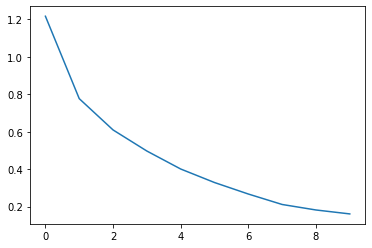

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(train_losses)

After instantiating a trained model, we can then score the test data and compute its accuracy. We then print the classification report and plot a confusion matrix.


In [ ]:
batch_size = 8

test_data = TensorDataset(test_x, test_m)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

outputs = []
with torch.no_grad():
    model.eval()
    for k, (mb_x, mb_m) in enumerate(test_dataloader):
        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)
        output = model(mb_x, attention_mask=mb_m)
        outputs.append(output[0].to('cpu'))

outputs = torch.cat(outputs)

In [ ]:
_, predicted_values = torch.max(outputs, 1)
predicted_values = predicted_values.numpy()
true_values = test_y.numpy()

In [ ]:
test_accuracy = np.sum(predicted_values == true_values) / len(true_values)
print ("Test Accuracy:", test_accuracy)

Test Accuracy: 0.6903553299492385


In [ ]:
import warnings
warnings.filterwarnings('always')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(true_values, predicted_values, target_names=[str(l) for l in label_values]))

              precision    recall  f1-score   support

        zero       0.71      0.71      0.71        77
         one       0.91      0.89      0.90        46
         two       0.54      0.55      0.55        47
       three       0.52      0.52      0.52        27

    accuracy                           0.69       197
   macro avg       0.67      0.67      0.67       197
weighted avg       0.69      0.69      0.69       197



Analysis

In [ ]:
import itertools

# plot confusion matrix
# code borrowed from scikit-learn.org
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[55  2 16  4]
 [ 1 41  1  3]
 [14  1 26  6]
 [ 7  1  5 14]]
Normalized confusion matrix
[[0.71 0.03 0.21 0.05]
 [0.02 0.89 0.02 0.07]
 [0.3  0.02 0.55 0.13]
 [0.26 0.04 0.19 0.52]]


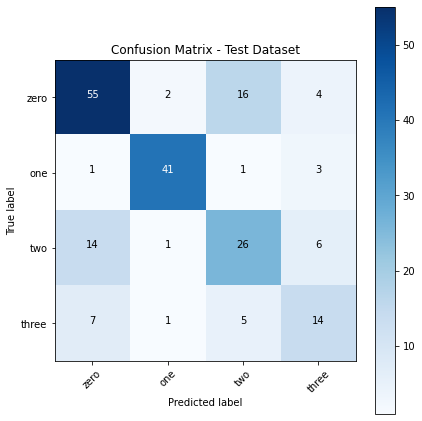

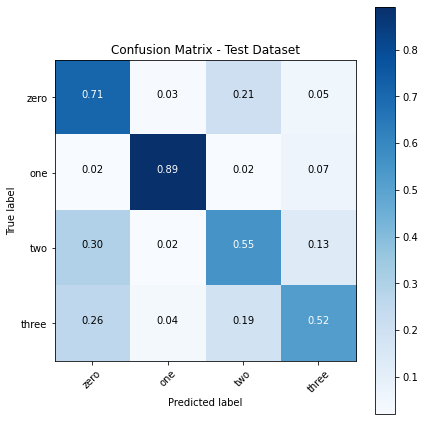

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm_test = confusion_matrix(true_values, predicted_values)

np.set_printoptions(precision=2)

plt.figure(figsize=(6,6))
plot_confusion_matrix(cm_test, classes=label_values, title='Confusion Matrix - Test Dataset')
plt.figure(figsize=(6,6))
plot_confusion_matrix(cm_test, classes=label_values, title='Confusion Matrix - Test Dataset', normalize=True)

# END

# BERT BASE

In [ ]:
!pip install transformers==2.3.0

     |████████████████████████████████| 450kB 4.5MB/s 
     |████████████████████████████████| 133kB 19.8MB/s 
     |████████████████████████████████| 1.1MB 16.7MB/s 
     |████████████████████████████████| 890kB 52.9MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 
     |████████████████████████████████| 6.7MB 34.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=e53998ce0e113f8a4f2ff855aabb9227bf26e6ae7a2c2a2a86837d227d84b3ea
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


We then load and inspect the dataset we had previously prepared. In order to train faster, we use the sampled version, which contains 10% of the original prepared dataset.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/result_31.csv', encoding='latin-1')

In [ ]:
df.shape

(1970, 4)

In [ ]:
df

,ID,Primary,text,Product_Labels
0,1.005030e+05,three,Snake oil Salesmen are not gone. They have jus...,3
1,1.009760e+05,three,Fact check: Gargling water with salt or vinega...,3
2,1.011710e+05,zero,".. this is great advice. Also, stop fighting f...",0
3,1.017920e+05,three,"14 people in Iran died from alcohol poisoning,...",3
4,1.037400e+05,one,"To be fair, China is not the only country alle...",1
...,...,...,...,...
1965,1.230000e+18,one,@TheSecondRevol1 @VincentCrypt46 I have been s...,1
1966,1.230000e+18,one,If anyone is aware of the 5G theory related to...,1
1967,1.230000e+18,one,@ClydeLewis @ClydeLewis have you looked into 5...,1
1968,1.230000e+18,one,How many have the âVirusâ where thereâs...,1


Clean(tweet)

In [ ]:

import re
import string
def clean(tweet):
            
    # Special characters
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)    
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    tweet = re.sub(r"å£3million", "3 million", tweet)
    tweet = re.sub(r"åÀ", "", tweet)
    
    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)   
            
    # Character entity references
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # Typos, slang and informal abbreviations
    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/", "with", tweet)
    tweet = re.sub(r"USAgov", "USA government", tweet)
    tweet = re.sub(r"recentlu", "recently", tweet)
    tweet = re.sub(r"Ph0tos", "Photos", tweet)
    tweet = re.sub(r"amirite", "am I right", tweet)
    tweet = re.sub(r"exp0sed", "exposed", tweet)
    tweet = re.sub(r"<3", "love", tweet)
    tweet = re.sub(r"amageddon", "armageddon", tweet)
    tweet = re.sub(r"Trfc", "Traffic", tweet)
    tweet = re.sub(r"8/5/2015", "2015-08-05", tweet)
    tweet = re.sub(r"WindStorm", "Wind Storm", tweet)
    tweet = re.sub(r"8/6/2015", "2015-08-06", tweet)
    tweet = re.sub(r"10:38PM", "10:38 PM", tweet)
    tweet = re.sub(r"10:30pm", "10:30 PM", tweet)
    tweet = re.sub(r"16yr", "16 year", tweet)
    tweet = re.sub(r"lmao", "laughing my ass off", tweet)   
    tweet = re.sub(r"TRAUMATISED", "traumatized", tweet)
    
  # re.sub(r"humanconsumption", "human consumption", tweet)
  #   tweet = re.sub(r"Typhoon-Devastated", "Typhoon Devastated", tweet)
  #   tweet = re.sub(r"Meat-Loving", "Meat Loving", tweet)
  #   tweet = re.sub(r"facialabuse", "facial abuse", tweet)
  #   tweet = re.sub(r"LakeCounty", "Lake County", tweet)
  #   tweet = re.sub(r"BeingAuthor", "Being Author", tweet)
  #   tweet = re.sub(r"withheavenly", "with heavenly", tweet)
  #   tweet = re.sub(r"thankU", "thank you", tweet)
  #   tweet = re.sub(r"iTunesMusic", "iTunes Music", tweet)
  #   tweet = re.sub(r"OffensiveContent", "Offensive Content", tweet)
  #   tweet = re.sub(r"WorstSummerJob", "Worst Summer Job", tweet)
  #   tweet = re.sub(r"HarryBeCareful", "Harry Be Careful", tweet)
  #   tweet = re.sub(r"NASASolarSystem", "NASA Solar System", tweet)
  #   tweet = re.sub(r"animalrescue", "animal rescue", tweet)
  #   tweet = re.sub(r"KurtSchlichter", "Kurt Schlichter", tweet)
  #   tweet = re.sub(r"aRmageddon", "armageddon", tweet)
  #   tweet = re.sub(r"Throwingknifes", "Throwing knives", tweet)
  #   tweet = re.sub(r"GodsLove", "God's Love", tweet)
  #   tweet = re.sub(r"bookboost", "book boost", tweet)
  #   tweet = re.sub(r"ibooklove", "I book love", tweet)
  #   tweet = re.sub(r"NestleIndia", "Nestle India", tweet)
  #   tweet = re.sub(r"realDonaldTrump", "Donald Trump", tweet)
  #   tweet = re.sub(r"DavidVonderhaar", "David Vonderhaar", tweet)
  #   tweet = re.sub(r"CecilTheLion", "Cecil The Lion", tweet)
  #   tweet = re.sub(r"weathernetwork", "weather network", tweet)
  #   tweet = re.sub(r"withBioterrorism  # Hashtags and usernames
  #   tweet = re.sub(r"IranDeal", "Iran Deal", tweet)
  #   tweet = re.sub(r"ArianaGrande", "Ariana Grande", tweet)
  #   tweet = re.sub(r"camilacabello97", "camila cabello", tweet) 
  #   tweet = re.sub(r"RondaRousey", "Ronda Rousey", tweet)     
  #   tweet = re.sub(r"MTVHottest", "MTV Hottest", tweet)
  #   tweet = re.sub(r"TrapMusic", "Trap Music", tweet)
  #   tweet = re.sub(r"ProphetMuhammad", "Prophet Muhammad", tweet)
  #   tweet = re.sub(r"PantherAttack", "Panther Attack", tweet)
  #   tweet = re.sub(r"StrategicPatience", "Strategic Patience", tweet)
  #   tweet = re.sub(r"socialnews", "social news", tweet)
  #   tweet = re.sub(r"NASAHurricane", "NASA Hurricane", tweet)
  #   tweet = re.sub(r"onlinecommunities", "online communities", tweet)
  #   tweet = &use", "with Bioterrorism & use", tweet)
  #   tweet = re.sub(r"Hostage&2", "Hostage & 2", tweet)
  #   tweet = re.sub(r"GOPDebate", "GOP Debate", tweet)
  #   tweet = re.sub(r"RickPerry", "Rick Perry", tweet)
  #   tweet = re.sub(r"frontpage", "front page", tweet)
  #   tweet = re.sub(r"NewsInTweets", "News In Tweets", tweet)
  #   tweet = re.sub(r"ViralSpell", "Viral Spell", tweet)
  #   tweet = re.sub(r"til_now", "until now", tweet)
  #   tweet = re.sub(r"volcanoinRussia", "volcano in Russia", tweet)
  #   tweet = re.sub(r"ZippedNews", "Zipped News", tweet)
  #   tweet = re.sub(r"MicheleBachman", "Michele Bachman", tweet)
  #   tweet = re.sub(r"53inch", "53 inch", tweet)
  #   tweet = re.sub(r"KerrickTrial", "Kerrick Trial", tweet)
  #   tweet = re.sub(r"abstorm", "Alberta Storm", tweet)
  #   tweet = re.sub(r"Beyhive", "Beyonce hive", tweet)
  #   tweet = re.sub(r"IDFire", "Idaho Fire", tweet)
  #   tweet = re.sub(r"DETECTADO", "Detected", tweet)
  #   tweet = re.sub(r"RockyFire", "Rocky Fire", tweet)
  #   tweet = re.sub(r"Listen/Buy", "Listen / Buy", tweet)
  #   tweet = re.sub(r"NickCannon", "Nick Cannon", tweet)
  #   tweet = re.sub(r"FaroeIslands", "Faroe Islands", tweet)
  #   tweet = re.sub(r"yycstorm", "Calgary Storm", tweet)
  #   tweet = re.sub(r"IDPs:", "Internally Displaced People :", tweet)
  #   tweet = re.sub(r"ArtistsUnited", "Artists United", tweet)
  #   tweet = re.sub(r"ClaytonBryant", "Clayton Bryant", tweet)
  #   tweet = re.sub(r"jimmyfallon", "jimmy fallon", tweet)
  #   tweet = re.sub(r"justinbieber", "justin bieber", tweet)  
  #   tweet = re.sub(r"UTC2015", "UTC 2015", tweet)
  #   tweet = re.sub(r"Time2015", "Time 2015", tweet)
  #   tweet = re.sub(r"djicemoon", "dj icemoon", tweet)
  #   tweet = re.sub(r"LivingSafely", "Living Safely", tweet)
  #   tweet = re.sub(r"FIFA16", "Fifa 2016", tweet)
  #   tweet = re.sub(r"thisiswhywecanthavenicethings", "this is why we cannot have nice things", tweet)
  #   tweet = re.sub(r"bbcnews", "bbc news", tweet)
  #   tweet = re.sub(r"UndergroundRailraod", "Underground Railraod", tweet)
  #   tweet = re.sub(r"c4news", "c4 news", tweet)
  #   tweet = re.sub(r"OBLITERATION", "obliteration", tweet)
  #   tweet = re.sub(r"MUDSLIDE", "mudslide", tweet)
  #   tweet = re.sub(r"NoSurrender", "No Surrender", tweet)
  #   tweet = re.sub(r"NotExplained", "Not Explained", tweet)
  #   tweet = re.sub(r"greatbritishbakeoff", "great british bake off", tweet)
  #   tweet = re.sub(r"LondonFire", "London Fire", tweet)
  #   tweet = re.sub(r"KOTAWeather", "KOTA Weather", tweet)
  #   tweet = re.sub(r"LuchaUnderground", "Lucha Underground", tweet)
  #   tweet = re.sub(r"KOIN6News", "KOIN 6 News", tweet)
  #   tweet = re.sub(r"LiveOnK2", "Live On K2", tweet)
  #   tweet = re.sub(r"9NewsGoldCoast", "9 News Gold Coast", tweet)
  #   tweet = re.sub(r"nikeplus", "nike plus", tweet)
  #   tweet = re.sub(r"david_cameron", "David Cameron", tweet)
  #   tweet = re.sub(r"peterjukes", "Peter Jukes", tweet)
  #   tweet = re.sub(r"JamesMelville", "James Melville", tweet)
  #   tweet = re.sub(r"megynkelly", "Megyn Kelly", tweet)
  #   tweet = re.sub(r"cnewslive", "C News Live", tweet)
  #   tweet = re.sub(r"JamaicaObserver", "Jamaica Observer", tweet)
  #   tweet = re.sub(r"TweetLikeItsSeptember11th2001", "Tweet like it is september 11th 2001", tweet)
  #   tweet = re.sub(r"cbplawyers", "cbp lawyers", tweet)
  #   tweet = re.sub(r"fewmoretweets", "few more tweets", tweet)
  #   tweet = re.sub(r"BlackLivesMatter", "Black Lives Matter", tweet)
  #   tweet = re.sub(r"cjoyner", "Chris Joyner", tweet)
  #   tweet = re.sub(r"ENGvAUS", "England vs Australia", tweet)
  #   tweet = re.sub(r"ScottWalker", "Scott Walker", tweet)
  #   tweet = re.sub(r"MikeParrActor", "Michael Parr", tweet)
  #   tweet = re.sub(r"4PlayThursdays", "Foreplay Thursdays", tweet)
  #   tweet = re.sub(r"TGF2015", "Tontitown Grape Festival", tweet)
  #   tweet = re.sub(r"realmandyrain", "Mandy Rain", tweet)
  #   tweet = re.sub(r"GraysonDolan", "Grayson Dolan", tweet)
  #   tweet = re.sub(r"ApolloBrown", "Apollo Brown", tweet)
  #   tweet = re.sub(r"saddlebrooke", "Saddlebrooke", tweet)
  #   tweet = re.sub(r"TontitownGrape", "Tontitown Grape", tweet)
  #   tweet = re.sub(r"AbbsWinston", "Abbs Winston", tweet)
  #   tweet = re.sub(r"ShaunKing", "Shaun King", tweet)
  #   tweet = re.sub(r"MeekMill", "Meek Mill", tweet)
  #   tweet = re.sub(r"TornadoGiveaway", "Tornado Giveaway", tweet)
  #   tweet = re.sub(r"GRupdates", "GR updates", tweet)
  #   tweet = re.sub(r"SouthDowns", "South Downs", tweet)
  #   tweet = re.sub(r"braininjury", "brain injury", tweet)
  #   tweet = re.sub(r"auspol", "Australian politics", tweet)
  #   tweet = re.sub(r"PlannedParenthood", "Planned Parenthood", tweet)
  #   tweet = re.sub(r"calgaryweather", "Calgary Weather", tweet)
  #   tweet = re.sub(r"weallheartonedirection", "we all heart one direction", tweet)
  #   tweet = re.sub(r"edsheeran", "Ed Sheeran", tweet)
  #   tweet = re.sub(r"TrueHeroes", "True Heroes", tweet)
  #   tweet = re.sub(r"S3XLEAK", "sex leak", tweet)
  #   tweet = re.sub(r"ComplexMag", "Complex Magazine", tweet)
  #   tweet = re.sub(r"TheAdvocateMag", "The Advocate Magazine", tweet)
  #   tweet = re.sub(r"CityofCalgary", "City of Calgary", tweet)
  #   tweet = re.sub(r"EbolaOutbreak", "Ebola Outbreak", tweet)
  #   tweet = re.sub(r"SummerFate", "Summer Fate", tweet)
  #   tweet = re.sub(r"RAmag", "Royal Academy Magazine", tweet)
  #   tweet = re.sub(r"offers2go", "offers to go", tweet)
  #   tweet = re.sub(r"foodscare", "food scare", tweet)
  #   tweet = re.sub(r"MNPDNashville", "Metropolitan Nashville Police Department", tweet)
  #   tweet = re.sub(r"TfLBusAlerts", "TfL Bus Alerts", tweet)
  #   tweet = re.sub(r"GamerGate", "Gamer Gate", tweet)
  #   tweet = re.sub(r"IHHen", "Humanitarian Relief", tweet)
  #   tweet = re.sub(r"spinningbot", "spinning bot", tweet)
  #   tweet = re.sub(r"ModiMinistry", "Modi Ministry", tweet)
  #   tweet = re.sub(r"TAXIWAYS", "taxi ways", tweet)
  #   tweet = re.sub(r"Calum5SOS", "Calum Hood", tweet)
  #   tweet = re.sub(r"po_st", "po.st", tweet)
  #   tweet = re.sub(r"scoopit", "scoop.it", tweet)
  #   tweet = re.sub(r"UltimaLucha", "Ultima Lucha", tweet)
  #   tweet = re.sub(r"JonathanFerrell", "Jonathan Ferrell", tweet)
  #   tweet = re.sub(r"aria_ahrary", "Aria Ahrary", tweet)
  #   tweet = re.sub(r"rapidcity", "Rapid City", tweet)
  #   tweet = re.sub(r"OutBid", "outbid", tweet)
  #   tweet = re.sub(r"lavenderpoetrycafe", "lavender poetry cafe", tweet)
  #   tweet = re.sub(r"EudryLantiqua", "Eudry Lantiqua", tweet)
  #   tweet = re.sub(r"15PM", "15 PM", tweet)
  #   tweet = re.sub(r"OriginalFunko", "Funko", tweet)
  #   tweet = re.sub(r"rightwaystan", "Richard Tan", tweet)
  #   tweet = re.sub(r"CindyNoonan", "Cindy Noonan", tweet)
  #   tweet = re.sub(r"RT_America", "RT America", tweet)
  #   tweet = re.sub(r"narendramodi", "Narendra Modi", tweet)
  #   tweet = re.sub(r"BakeOffFriends", "Bake Off Friends", tweet)
  #   tweet = re.sub(r"TeamHendrick", "Hendrick Motorsports", tweet)
  #   tweet = re.sub(r"alexbelloli", "Alex Belloli", tweet)
  #   tweet = re.sub(r"itsjustinstuart", "Justin Stuart", tweet)
  #   tweet = re.sub(r"gunsense", "gun sense", tweet)
  #   tweet = re.sub(r"DebateQuestionsWeWantToHear", "debate questions we want to hear", tweet)
  #   tweet = re.sub(r"RoyalCarribean", "Royal Carribean", tweet)
  #   tweet = re.sub(r"samanthaturne19", "Samantha Turner", tweet)
  #   tweet = re.sub(r"JonVoyage", "Jon Stewart", tweet)
  #   tweet = re.sub(r"renew911health", "renew 911 health", tweet)
  #   tweet = re.sub(r"SuryaRay", "Surya Ray", tweet)
  #   tweet = re.sub(r"pattonoswalt", "Patton Oswalt", tweet)
  #   tweet = re.sub(r"minhazmerchant", "Minhaz Merchant", tweet)
  #   tweet = re.sub(r"TLVFaces", "Israel Diaspora Coalition", tweet)
  #   tweet = re.sub(r"pmarca", "Marc Andreessen", tweet)
  #   tweet = re.sub(r"pdx911", "Portland Police", tweet)
  #   tweet = re.sub(r"jamaicaplain", "Jamaica Plain", tweet)
  #   tweet = re.sub(r"Japton", "Arkansas", tweet)
  #   tweet = re.sub(r"RouteComplex", "Route Complex", tweet)
  #   tweet = re.sub(r"INSubcontinent", "Indian Subcontinent", tweet)
  #   tweet = re.sub(r"NJTurnpike", "New Jersey Turnpike", tweet)
  #   tweet = re.sub(r"Politifiact", "PolitiFact", tweet)
  #   tweet = re.sub(r"Hiroshima70", "Hiroshima", tweet)
  #   tweet = re.sub(r"GMMBC", "Greater Mt Moriah Baptist Church", tweet)
  #   tweet = re.sub(r"versethe", "verse the", tweet)
  #   tweet = re.sub(r"TubeStrike", "Tube Strike", tweet)
  #   tweet = re.sub(r"MissionHills", "Mission Hills", tweet)
  #   tweet = re.sub(r"ProtectDenaliWolves", "Protect Denali Wolves", tweet)
  #   tweet = re.sub(r"NANKANA", "Nankana", tweet)
  #   tweet = re.sub(r"SAHIB", "Sahib", tweet)
  #   tweet = re.sub(r"PAKPATTAN", "Pakpattan", tweet)
  #   tweet = re.sub(r"Newz_Sacramento", "News Sacramento", tweet)
  #   tweet = re.sub(r"gofundme", "go fund me", tweet)
  #   tweet = re.sub(r"pmharper", "Stephen Harper", tweet)
  #   tweet = re.sub(r"IvanBerroa", "Ivan Berroa", tweet)
  #   tweet = re.sub(r"LosDelSonido", "Los Del Sonido", tweet)
  #   tweet = re.sub(r"bancodeseries", "banco de series", tweet)
  #   tweet = re.sub(r"timkaine", "Tim Kaine", tweet)
  #   tweet = re.sub(r"IdentityTheft", "Identity Theft", tweet)
  #   tweet = re.sub(r"AllLivesMatter", "All Lives Matter", tweet)
  #   tweet = re.sub(r"mishacollins", "Misha Collins", tweet)
  #   tweet = re.sub(r"BillNeelyNBC", "Bill Neely", tweet)
  #   tweet = re.sub(r"BeClearOnCancer", "be clear on cancer", tweet)
  #   tweet = re.sub(r"Kowing", "Knowing", tweet)
  #   tweet = re.sub(r"ScreamQueens", "Scream Queens", tweet)
  #   tweet = re.sub(r"AskCharley", "Ask Charley", tweet)
  #   tweet = re.sub(r"BlizzHeroes", "Heroes of the Storm", tweet)
  #   tweet = re.sub(r"BradleyBrad47", "Bradley Brad", tweet)
  #   tweet = re.sub(r"HannaPH", "Typhoon Hanna", tweet)
  #   tweet = re.sub(r"meinlcymbals", "MEINL Cymbals", tweet)
  #   tweet = re.sub(r"Ptbo", "Peterborough", tweet)
  #   tweet = re.sub(r"cnnbrk", "CNN Breaking News", tweet)
  #   tweet = re.sub(r"IndianNews", "Indian News", tweet)
  #   tweet = re.sub(r"savebees", "save bees", tweet)
  #   tweet = re.sub(r"GreenHarvard", "Green Harvard", tweet)
  #   tweet = re.sub(r"StandwithPP", "Stand with planned parenthood", tweet)
  #   tweet = re.sub(r"hermancranston", "Herman Cranston", tweet)
  #   tweet = re.sub(r"WMUR9", "WMUR-TV", tweet)
  #   tweet = re.sub(r"RockBottomRadFM", "Rock Bottom Radio", tweet)
  #   tweet = re.sub(r"ameenshaikh3", "Ameen Shaikh", tweet)
  #   tweet = re.sub(r"ProSyn", "Project Syndicate", tweet)
  #   tweet = re.sub(r"Daesh", "ISIS", tweet)
  #   tweet = re.sub(r"s2g", "swear to god", tweet)
  #   tweet = re.sub(r"listenlive", "listen live", tweet)
  #   tweet = re.sub(r"CDCgov", "Centers for Disease Control and Prevention", tweet)
  #   tweet = re.sub(r"FoxNew", "Fox News", tweet)
  #   tweet = re.sub(r"CBSBigBrother", "Big Brother", tweet)
  #   tweet = re.sub(r"JulieDiCaro", "Julie DiCaro", tweet)
  #   tweet = re.sub(r"theadvocatemag", "The Advocate Magazine", tweet)
  #   tweet = re.sub(r"RohnertParkDPS", "Rohnert Park Police Department", tweet)
  #   tweet = re.sub(r"THISIZBWRIGHT", "Bonnie Wright", tweet)
  #   tweet = re.sub(r"Popularmmos", "Popular MMOs", tweet)
  #   tweet = re.sub(r"WildHorses", "Wild Horses", tweet)
  #   tweet = re.sub(r"FantasticFour", "Fantastic Four", tweet)
  #   tweet = re.sub(r"HORNDALE", "Horndale", tweet)
  #   tweet = re.sub(r"PINER", "Piner", tweet)
  #   tweet = re.sub(r"BathAndNorthEastSomerset", "Bath and North East Somerset", tweet)
  #   tweet = re.sub(r"thatswhatfriendsarefor", "that is what friends are for", tweet)
  #   tweet = re.sub(r"residualincome", "residual income", tweet)
  #   tweet = re.sub(r"YahooNewsDigest", "Yahoo News Digest", tweet)
  #   tweet = re.sub(r"MalaysiaAirlines", "Malaysia Airlines", tweet)
  #   tweet = re.sub(r"AmazonDeals", "Amazon Deals", tweet)
  #   tweet = re.sub(r"MissCharleyWebb", "Charley Webb", tweet)
  #   tweet = re.sub(r"shoalstraffic", "shoals traffic", tweet)
  #   tweet = re.sub(r"GeorgeFoster72", "George Foster", tweet)
  #   tweet = re.sub(r"pop2015", "pop 2015", tweet)
  #   tweet = re.sub(r"_PokemonCards_", "Pokemon Cards", tweet)
  #   tweet = re.sub(r"DianneG", "Dianne Gallagher", tweet)
  #   tweet = re.sub(r"KashmirConflict", "Kashmir Conflict", tweet)
  #   tweet = re.sub(r"BritishBakeOff", "British Bake Off", tweet)
  #   tweet = re.sub(r"FreeKashmir", "Free Kashmir", tweet)
  #   tweet = re.sub(r"mattmosley", "Matt Mosley", tweet)
  #   tweet = re.sub(r"BishopFred", "Bishop Fred", tweet)
  #   tweet = re.sub(r"EndConflict", "End Conflict", tweet)
  #   tweet = re.sub(r"EndOccupation", "End Occupation", tweet)
  #   tweet = re.sub(r"UNHEALED", "unhealed", tweet)
  #   tweet = re.sub(r"CharlesDagnall", "Charles Dagnall", tweet)
  #   tweet = re.sub(r"Latestnews", "Latest news", tweet)
  #   tweet = re.sub(r"KindleCountdown", "Kindle Countdown", tweet)
  #   tweet = re.sub(r"NoMoreHandouts", "No More Handouts", tweet)
  #   tweet = re.sub(r"datingtips", "dating tips", tweet)
  #   tweet = re.sub(r"charlesadler", "Charles Adler", tweet)
  #   tweet = re.sub(r"twia", "Texas Windstorm Insurance Association", tweet)
  #   tweet = re.sub(r"txlege", "Texas Legislature", tweet)
  #   tweet = re.sub(r"WindstormInsurer", "Windstorm Insurer", tweet)
  #   tweet = re.sub(r"Newss", "News", tweet)
  #   tweet = re.sub(r"hempoil", "hemp oil", tweet)
  #   tweet = re.sub(r"CommoditiesAre", "Commodities are", tweet)
  #   tweet = re.sub(r"tubestrike", "tube strike", tweet)
  #   tweet = re.sub(r"JoeNBC", "Joe Scarborough", tweet)
  #   tweet = re.sub(r"LiteraryCakes", "Literary Cakes", tweet)
  #   tweet = re.sub(r"TI5", "The International 5", tweet)
  #   tweet = re.sub(r"thehill", "the hill", tweet)
  #   tweet = re.sub(r"3others", "3 others", tweet)
  #   tweet = re.sub(r"stighefootball", "Sam Tighe", tweet)
  #   tweet = re.sub(r"whatstheimportantvideo", "what is the important video", tweet)
  #   tweet = re.sub(r"ClaudioMeloni", "Claudio Meloni", tweet)
  #   tweet = re.sub(r"DukeSkywalker", "Duke Skywalker", tweet)
  #   tweet = re.sub(r"carsonmwr", "Fort Carson", tweet)
  #   tweet = re.sub(r"offdishduty", "off dish duty", tweet)
  #   tweet = re.sub(r"andword", "and word", tweet)
  #   tweet = re.sub(r"rhodeisland", "Rhode Island", tweet)
  #   tweet = re.sub(r"easternoregon", "Eastern Oregon", tweet)
  #   tweet = re.sub(r"WAwildfire", "Washington Wildfire", tweet)
  #   tweet = re.sub(r"fingerrockfire", "Finger Rock Fire", tweet)
  #   tweet = re.sub(r"57am", "57 am", tweet)
  #   tweet = re.sub(r"fingerrockfire", "Finger Rock Fire", tweet)
  #   tweet = re.sub(r"JacobHoggard", "Jacob Hoggard", tweet)
  #   tweet = re.sub(r"newnewnew", "new new new", tweet)
  #   tweet = re.sub(r"under50", "under 50", tweet)
  #   tweet = re.sub(r"getitbeforeitsgone", "get it before it is gone", tweet)
  #   tweet = re.sub(r"freshoutofthebox", "fresh out of the box", tweet)
  #   tweet = re.sub(r"amwriting", "am writing", tweet)
  #   tweet = re.sub(r"Bokoharm", "Boko Haram", tweet)
  #   tweet = re.sub(r"Nowlike", "Now like", tweet)
  #   tweet = re.sub(r"seasonfrom", "season from", tweet)
  #   tweet = re.sub(r"epicente", "epicenter", tweet)
  #   tweet = re.sub(r"epicenterr", "epicenter", tweet)
  #   tweet = re.sub(r"sicklife", "sick life", tweet)
  #   tweet = re.sub(r"yycweather", "Calgary Weather", tweet)
  #   tweet = re.sub(r"calgarysun", "Calgary Sun", tweet)
  #   tweet = re.sub(r"approachng", "approaching", tweet)
  #   tweet = re.sub(r"evng", "evening", tweet)
  #   tweet = re.sub(r"Sumthng", "something", tweet)
  #   tweet = re.sub(r"EllenPompeo", "Ellen Pompeo", tweet)
  #   tweet = re.sub(r"shondarhimes", "Shonda Rhimes", tweet)
  #   tweet = re.sub(r"ABCNetwork", "ABC Network", tweet)
  #   tweet = re.sub(r"SushmaSwaraj", "Sushma Swaraj", tweet)
  #   tweet = re.sub(r"pray4japan", "Pray for Japan", tweet)
  #   tweet = re.sub(r"hope4japan", "Hope for Japan", tweet)
  #   tweet = re.sub(r"Illusionimagess", "Illusion images", tweet)
  #   tweet = re.sub(r"SummerUnderTheStars", "Summer Under The Stars", tweet)
  #   tweet = re.sub(r"ShallWeDance", "Shall We Dance", tweet)
  #   tweet = re.sub(r"TCMParty", "TCM Party", tweet)
  #   tweet = re.sub(r"marijuananews", "marijuana news", tweet)
  #   tweet = re.sub(r"onbeingwithKristaTippett", "on being with Krista Tippett", tweet)
  #   tweet = re.sub(r"Beingtweets", "Being tweets", tweet)
  #   tweet = re.sub(r"newauthors", "new authors", tweet)
  #   tweet = re.sub(r"remedyyyy", "remedy", tweet)
  #   tweet = re.sub(r"44PM", "44 PM", tweet)
  #   tweet = re.sub(r"HeadlinesApp", "Headlines App", tweet)
  #   tweet = re.sub(r"40PM", "40 PM", tweet)
  #   tweet = re.sub(r"myswc", "Severe Weather Center", tweet)
  #   tweet = re.sub(r"ithats", "that is", tweet)
  #   tweet = re.sub(r"icouldsitinthismomentforever", "I could sit in this moment forever", tweet)
  #   tweet = re.sub(r"FatLoss", "Fat Loss", tweet)
  #   tweet = re.sub(r"02PM", "02 PM", tweet)
  #   tweet = re.sub(r"MetroFmTalk", "Metro Fm Talk", tweet)
  #   tweet = re.sub(r"Bstrd", "bastard", tweet)
  #   tweet = re.sub(r"bldy", "bloody", tweet)
  #   tweet = re.sub(r"MetrofmTalk", "Metro Fm Talk", tweet)
  #   tweet = re.sub(r"terrorismturn", "terrorism turn", tweet)
  #   tweet = re.sub(r"BBCNewsAsia", "BBC News Asia", tweet)
  #   tweet = re.sub(r"BehindTheScenes", "Behind The Scenes", tweet)
  #   tweet = re.sub(r"GeorgeTakei", "George Takei", tweet)
  #   tweet = re.sub(r"WomensWeeklyMag", "Womens Weekly Magazine", tweet)
  #   tweet = re.sub(r"SurvivorsGuidetoEarth", "Survivors Guide to Earth", tweet)
  #   tweet = re.sub(r"incubusband", "incubus band", tweet)
  #   tweet = re.sub(r"Babypicturethis", "Baby picture this", tweet)
  #   tweet = re.sub(r"BombEffects", "Bomb Effects", tweet)
  #   tweet = re.sub(r"win10", "Windows 10", tweet)
  #   tweet = re.sub(r"idkidk", "I do not know I do not know", tweet)
  #   tweet = re.sub(r"TheWalkingDead", "The Walking Dead", tweet)
  #   tweet = re.sub(r"amyschumer", "Amy Schumer", tweet)
  #   tweet = re.sub(r"crewlist", "crew list", tweet)
  #   tweet = re.sub(r"Erdogans", "Erdogan", tweet)
  #   tweet = re.sub(r"BBCLive", "BBC Live", tweet)
  #   tweet = re.sub(r"TonyAbbottMHR", "Tony Abbott", tweet)
  #   tweet = re.sub(r"paulmyerscough", "Paul Myerscough", tweet)
  #   tweet = re.sub(r"georgegallagher", "George Gallagher", tweet)
  #   tweet = re.sub(r"JimmieJohnson", "Jimmie Johnson", tweet)
  #   tweet = re.sub(r"pctool", "pc tool", tweet)
  #   tweet = re.sub(r"DoingHashtagsRight", "Doing Hashtags Right", tweet)
  #   tweet = re.sub(r"ThrowbackThursday", "Throwback Thursday", tweet)
  #   tweet = re.sub(r"SnowBackSunday", "Snowback Sunday", tweet)
  #   tweet = re.sub(r"LakeEffect", "Lake Effect", tweet)
  #   tweet = re.sub(r"RTphotographyUK", "Richard Thomas Photography UK", tweet)
  #   tweet = re.sub(r"BigBang_CBS", "Big Bang CBS", tweet)
  #   tweet = re.sub(r"writerslife", "writers life", tweet)
  #   tweet = re.sub(r"NaturalBirth", "Natural Birth", tweet)
  #   tweet = re.sub(r"UnusualWords", "Unusual Words", tweet)
  #   tweet = re.sub(r"wizkhalifa", "Wiz Khalifa", tweet)
  #   tweet = re.sub(r"acreativedc", "a creative DC", tweet)
  #   tweet = re.sub(r"vscodc", "vsco DC", tweet)
  #   tweet = re.sub(r"VSCOcam", "vsco camera", tweet)
  #   tweet = re.sub(r"TheBEACHDC", "The beach DC", tweet)
  #   tweet = re.sub(r"buildingmuseum", "building museum", tweet)
  #   tweet = re.sub(r"WorldOil", "World Oil", tweet)
  #   tweet = re.sub(r"redwedding", "red wedding", tweet)
  #   tweet = re.sub(r"AmazingRaceCanada", "Amazing Race Canada", tweet)
  #   tweet = re.sub(r"WakeUpAmerica", "Wake Up America", tweet)
  #   tweet = re.sub(r"\\Allahuakbar\\", "Allahu Akbar", tweet)
  #   tweet = re.sub(r"bleased", "blessed", tweet)
  #   tweet = re.sub(r"nigeriantribune", "Nigerian Tribune", tweet)
  #   tweet = re.sub(r"HIDEO_KOJIMA_EN", "Hideo Kojima", tweet)
  #   tweet = re.sub(r"FusionFestival", "Fusion Festival", tweet)
  #   tweet = re.sub(r"50Mixed", "50 Mixed", tweet)
  #   tweet = re.sub(r"NoAgenda", "No Agenda", tweet)
  #   tweet = re.sub(r"WhiteGenocide", "White Genocide", tweet)
  #   tweet = re.sub(r"dirtylying", "dirty lying", tweet)
  #   tweet = re.sub(r"SyrianRefugees", "Syrian Refugees", tweet)
  #   tweet = re.sub(r"changetheworld", "change the world", tweet)
  #   tweet = re.sub(r"Ebolacase", "Ebola case", tweet)
  #   tweet = re.sub(r"mcgtech", "mcg technologies", tweet)
  #   tweet = re.sub(r"withweapons", "with weapons", tweet)
  #   tweet = re.sub(r"advancedwarfare", "advanced warfare", tweet)
  #   tweet = re.sub(r"letsFootball", "let us Football", tweet)
  #   tweet = re.sub(r"LateNiteMix", "late night mix", tweet)
  #   tweet = re.sub(r"PhilCollinsFeed", "Phil Collins", tweet)
  #   tweet = re.sub(r"RudyHavenstein", "Rudy Havenstein", tweet)
  #   tweet = re.sub(r"22PM", "22 PM", tweet)
  #   tweet = re.sub(r"54am", "54 AM", tweet)
  #   tweet = re.sub(r"38am", "38 AM", tweet)
  #   tweet = re.sub(r"OldFolkExplainStuff", "Old Folk Explain Stuff", tweet)
  #   tweet = re.sub(r"BlacklivesMatter", "Black Lives Matter", tweet)
  #   tweet = re.sub(r"InsaneLimits", "Insane Limits", tweet)
  #   tweet = re.sub(r"youcantsitwithus", "you cannot sit with us", tweet)
  #   tweet = re.sub(r"2k15", "2015", tweet)
  #   tweet = re.sub(r"TheIran", "Iran", tweet)
  #   tweet = re.sub(r"JimmyFallon", "Jimmy Fallon", tweet)
  #   tweet = re.sub(r"AlbertBrooks", "Albert Brooks", tweet)
  #   tweet = re.sub(r"defense_news", "defense news", tweet)
  #   tweet = re.sub(r"nuclearrcSA", "Nuclear Risk Control Self Assessment", tweet)
  #   tweet = re.sub(r"Auspol", "Australia Politics", tweet)
  #   tweet = re.sub(r"NuclearPower", "Nuclear Power", tweet)
  #   tweet = re.sub(r"WhiteTerrorism", "White Terrorism", tweet)
  #   tweet = re.sub(r"truthfrequencyradio", "Truth Frequency Radio", tweet)
  #   tweet = re.sub(r"ErasureIsNotEquality", "Erasure is not equality", tweet)
  #   tweet = re.sub(r"ProBonoNews", "Pro Bono News", tweet)
  #   tweet = re.sub(r"JakartaPost", "Jakarta Post", tweet)
  #   tweet = re.sub(r"toopainful", "too painful", tweet)
  #   tweet = re.sub(r"melindahaunton", "Melinda Haunton", tweet)
  #   tweet = re.sub(r"NoNukes", "No Nukes", tweet)
  #   tweet = re.sub(r"curryspcworld", "Currys PC World", tweet)
  #   tweet = re.sub(r"ineedcake", "I need cake", tweet)
  #   tweet = re.sub(r"blackforestgateau", "black forest gateau", tweet)
  #   tweet = re.sub(r"BBCOne", "BBC One", tweet)
  #   tweet = re.sub(r"AlexxPage", "Alex Page", tweet)
  #   tweet = re.sub(r"jonathanserrie", "Jonathan Serrie", tweet)
  #   tweet = re.sub(r"SocialJerkBlog", "Social Jerk Blog", tweet)
  #   tweet = re.sub(r"ChelseaVPeretti", "Chelsea Peretti", tweet)
  #   tweet = re.sub(r"irongiant", "iron giant", tweet)
  #   tweet = re.sub(r"RonFunches", "Ron Funches", tweet)
  #   tweet = re.sub(r"TimCook", "Tim Cook", tweet)
  #   tweet = re.sub(r"sebastianstanisaliveandwell", "Sebastian Stan is alive and well", tweet)
  #   tweet = re.sub(r"Madsummer", "Mad summer", tweet)
  #   tweet = re.sub(r"NowYouKnow", "Now you know", tweet)
  #   tweet = re.sub(r"concertphotography", "concert photography", tweet)
  #   tweet = re.sub(r"TomLandry", "Tom Landry", tweet)
  #   tweet = re.sub(r"showgirldayoff", "show girl day off", tweet)
  #   tweet = re.sub(r"Yougslavia", "Yugoslavia", tweet)
  #   tweet = re.sub(r"QuantumDataInformatics", "Quantum Data Informatics", tweet)
  #   tweet = re.sub(r"FromTheDesk", "From The Desk", tweet)
  #   tweet = re.sub(r"TheaterTrial", "Theater Trial", tweet)
  #   tweet = re.sub(r"CatoInstitute", "Cato Institute", tweet)
  #   tweet = re.sub(r"EmekaGift", "Emeka Gift", tweet)
  #   tweet = re.sub(r"LetsBe_Rational", "Let us be rational", tweet)
  #   tweet = re.sub(r"Cynicalreality", "Cynical reality", tweet)
  #   tweet = re.sub(r"FredOlsenCruise", "Fred Olsen Cruise", tweet)
  #   tweet = re.sub(r"NotSorry", "not sorry", tweet)
  #   tweet = re.sub(r"UseYourWords", "use your words", tweet)
  #   tweet = re.sub(r"WordoftheDay", "word of the day", tweet)
  #   tweet = re.sub(r"Dictionarycom", "Dictionary.com", tweet)
  #   tweet = re.sub(r"TheBrooklynLife", "The Brooklyn Life", tweet)
  #   tweet = re.sub(r"jokethey", "joke they", tweet)
  #   tweet = re.sub(r"nflweek1picks", "NFL week 1 picks", tweet)
  #   tweet = re.sub(r"uiseful", "useful", tweet)
  #   tweet = re.sub(r"JusticeDotOrg", "The American Association for Justice", tweet)
  #   tweet = re.sub(r"autoaccidents", "auto accidents", tweet)
  #   tweet = re.sub(r"SteveGursten", "Steve Gursten", tweet)
  #   tweet = re.sub(r"MichiganAutoLaw", "Michigan Auto Law", tweet)
  #   tweet = re.sub(r"birdgang", "bird gang", tweet)
  #   tweet = re.sub(r"nflnetwork", "NFL Network", tweet)
  #   tweet = re.sub(r"NYDNSports", "NY Daily News Sports", tweet)
  #   tweet = re.sub(r"RVacchianoNYDN", "Ralph Vacchiano NY Daily News", tweet)
  #   tweet = re.sub(r"EdmontonEsks", "Edmonton Eskimos", tweet)
  #   tweet = re.sub(r"david_brelsford", "David Brelsford", tweet)
  #   tweet = re.sub(r"TOI_India", "The Times of India", tweet)
  #   tweet = re.sub(r"hegot", "he got", tweet)
  #   tweet = re.sub(r"SkinsOn9", "Skins on 9", tweet)
  #   tweet = re.sub(r"sothathappened", "so that happened", tweet)
  #   tweet = re.sub(r"LCOutOfDoors", "LC Out Of Doors", tweet)
  #   tweet = re.sub(r"NationFirst", "Nation First", tweet)
  #   tweet = re.sub(r"IndiaToday", "India Today", tweet)
  #   tweet = re.sub(r"HLPS", "helps", tweet)
  #   tweet = re.sub(r"HOSTAGESTHROSW", "hostages throw", tweet)
  #   tweet = re.sub(r"SNCTIONS", "sanctions", tweet)
  #   tweet = re.sub(r"BidTime", "Bid Time", tweet)
  #   tweet = re.sub(r"crunchysensible", "crunchy sensible", tweet)
  #   tweet = re.sub(r"RandomActsOfRomance", "Random acts of romance", tweet)
  #   tweet = re.sub(r"MomentsAtHill", "Moments at hill", tweet)
  #   tweet = re.sub(r"eatshit", "eat shit", tweet)
  #   tweet = re.sub(r"liveleakfun", "live leak fun", tweet)
  #   tweet = re.sub(r"SahelNews", "Sahel News", tweet)
  #   tweet = re.sub(r"abc7newsbayarea", "ABC 7 News Bay Area", tweet)
  #   tweet = re.sub(r"facilitiesmanagement", "facilities management", tweet)
  #   tweet = re.sub(r"facilitydude", "facility dude", tweet)
  #   tweet = re.sub(r"CampLogistics", "Camp logistics", tweet)
  #   tweet = re.sub(r"alaskapublic", "Alaska public", tweet)
  #   tweet = re.sub(r"MarketResearch", "Market Research", tweet)
  #   tweet = re.sub(r"AccuracyEsports", "Accuracy Esports", tweet)
  #   tweet = re.sub(r"TheBodyShopAust", "The Body Shop Australia", tweet)
  #   tweet = re.sub(r"yychail", "Calgary hail", tweet)
  #   tweet = re.sub(r"yyctraffic", "Calgary traffic", tweet)
  #   tweet = re.sub(r"eliotschool", "eliot school", tweet)
  #   tweet = re.sub(r"TheBrokenCity", "The Broken City", tweet)
  #   tweet = re.sub(r"OldsFireDept", "Olds Fire Department", tweet)
  #   tweet = re.sub(r"RiverComplex", "River Complex", tweet)
  #   tweet = re.sub(r"fieldworksmells", "field work smells", tweet)
  #   tweet = re.sub(r"IranElection", "Iran Election", tweet)
  #   tweet = re.sub(r"glowng", "glowing", tweet)
  #   tweet = re.sub(r"kindlng", "kindling", tweet)
  #   tweet = re.sub(r"riggd", "rigged", tweet)
  #   tweet = re.sub(r"slownewsday", "slow news day", tweet)
  #   tweet = re.sub(r"MyanmarFlood", "Myanmar Flood", tweet)
  #   tweet = re.sub(r"abc7chicago", "ABC 7 Chicago", tweet)
  #   tweet = re.sub(r"copolitics", "Colorado Politics", tweet)
  #   tweet = re.sub(r"AdilGhumro", "Adil Ghumro", tweet)
  #   tweet = re.sub(r"netbots", "net bots", tweet)
  #   tweet = re.sub(r"byebyeroad", "bye bye road", tweet)
  #   tweet = re.sub(r"massiveflooding", "massive flooding", tweet)
  #   tweet = re.sub(r"EndofUS", "End of United States", tweet)
  #   tweet = re.sub(r"35PM", "35 PM", tweet)
  #   tweet = re.sub(r"greektheatrela", "Greek Theatre Los Angeles", tweet)
  #   tweet = re.sub(r"76mins", "76 minutes", tweet)
  #   tweet = re.sub(r"publicsafetyfirst", "public safety first", tweet)
  #   tweet = re.sub(r"livesmatter", "lives matter", tweet)
  #   tweet = re.sub(r"myhometown", "my hometown", tweet)
  #   tweet = re.sub(r"tankerfire", "tanker fire", tweet)
  #   tweet = re.sub(r"MEMORIALDAY", "memorial day", tweet)
  #   tweet = re.sub(r"MEMORIAL_DAY", "memorial day", tweet)
  #   tweet = re.sub(r"instaxbooty", "instagram booty", tweet)
  #   tweet = re.sub(r"Jerusalem_Post", "Jerusalem Post", tweet)
  #   tweet = re.sub(r"WayneRooney_INA", "Wayne Rooney", tweet)
  #   tweet = re.sub(r"VirtualReality", "Virtual Reality", tweet)
  #   tweet = re.sub(r"OculusRift", "Oculus Rift", tweet)
  #   tweet = re.sub(r"OwenJones84", "Owen Jones", tweet)
  #   tweet = re.sub(r"jeremycorbyn", "Jeremy Corbyn", tweet)
  #   tweet = re.sub(r"paulrogers002", "Paul Rogers", tweet)
  #   tweet = re.sub(r"mortalkombatx", "Mortal Kombat X", tweet)
  #   tweet = re.sub(r"mortalkombat", "Mortal Kombat", tweet)
  #   tweet = re.sub(r"FilipeCoelho92", "Filipe Coelho", tweet)
  #   tweet = re.sub(r"OnlyQuakeNews", "Only Quake News", tweet)
  #   tweet = re.sub(r"kostumes", "costumes", tweet)
  #   tweet = re.sub(r"YEEESSSS", "yes", tweet)
  #   tweet = re.sub(r"ToshikazuKatayama", "Toshikazu Katayama", tweet)
  #   tweet = re.sub(r"IntlDevelopment", "Intl Development", tweet)
  #   tweet = re.sub(r"ExtremeWeather", "Extreme Weather", tweet)
  #   tweet = re.sub(r"WereNotGruberVoters", "We are not gruber voters", tweet)
  #   tweet = re.sub(r"NewsThousands", "News Thousands", tweet)
  #   tweet = re.sub(r"EdmundAdamus", "Edmund Adamus", tweet)
  #   tweet = re.sub(r"EyewitnessWV", "Eye witness WV", tweet)
  #   tweet = re.sub(r"PhiladelphiaMuseu", "Philadelphia Museum", tweet)
  #   tweet = re.sub(r"DublinComicCon", "Dublin Comic Con", tweet)
  #   tweet = re.sub(r"NicholasBrendon", "Nicholas Brendon", tweet)
  #   tweet = re.sub(r"Alltheway80s", "All the way 80s", tweet)
  #   tweet = re.sub(r"FromTheField", "From the field", tweet)
  #   tweet = re.sub(r"NorthIowa", "North Iowa", tweet)
  #   tweet = re.sub(r"WillowFire", "Willow Fire", tweet)
  #   tweet = re.sub(r"MadRiverComplex", "Mad River Complex", tweet)
  #   tweet = re.sub(r"feelingmanly", "feeling manly", tweet)
  #   tweet = re.sub(r"stillnotoverit", "still not over it", tweet)
  #   tweet = re.sub(r"FortitudeValley", "Fortitude Valley", tweet)
  #   tweet = re.sub(r"CoastpowerlineTramTr", "Coast powerline", tweet)
  #   tweet = re.sub(r"ServicesGold", "Services Gold", tweet)
  #   tweet = re.sub(r"NewsbrokenEmergency", "News broken emergency", tweet)
  #   tweet = re.sub(r"Evaucation", "evacuation", tweet)
  #   tweet = re.sub(r"leaveevacuateexitbe", "leave evacuate exit be", tweet)
  #   tweet = re.sub(r"P_EOPLE", "PEOPLE", tweet)
  #   tweet = re.sub(r"Tubestrike", "tube strike", tweet)
  #   tweet = re.sub(r"CLASS_SICK", "CLASS SICK", tweet)
  #   tweet = re.sub(r"localplumber", "local plumber", tweet)
  #   tweet = re.sub(r"awesomejobsiri", "awesome job siri", tweet)
  #   tweet = re.sub(r"PayForItHow", "Pay for it how", tweet)
  #   tweet = re.sub(r"ThisIsAfrica", "This is Africa", tweet)
  #   tweet = re.sub(r"crimeairnetwork", "crime air network", tweet)
  #   tweet = re.sub(r"KimAcheson", "Kim Acheson", tweet)
  #   tweet = re.sub(r"cityofcalgary", "City of Calgary", tweet)
  #   tweet = re.sub(r"prosyndicate", "pro syndicate", tweet)
  #   tweet = re.sub(r"660NEWS", "660 NEWS", tweet)
  #   tweet = re.sub(r"BusInsMagazine", "Business Insurance Magazine", tweet)
  #   tweet = re.sub(r"wfocus", "focus", tweet)
  #   tweet = re.sub(r"ShastaDam", "Shasta Dam", tweet)
  #   tweet = re.sub(r"go2MarkFranco", "Mark Franco", tweet)
  #   tweet = re.sub(r"StephGHinojosa", "Steph Hinojosa", tweet)
  #   tweet = re.sub(r"Nashgrier", "Nash Grier", tweet)
  #   tweet = re.sub(r"NashNewVideo", "Nash new video", tweet)
  #   tweet = re.sub(r"IWouldntGetElectedBecause", "I would not get elected because", tweet)
  #   tweet = re.sub(r"SHGames", "Sledgehammer Games", tweet)
  #   tweet = re.sub(r"bedhair", "bed hair", tweet)
  #   tweet = re.sub(r"JoelHeyman", "Joel Heyman", tweet)
  #   tweet = re.sub(r"viaYouTube", "via YouTube", tweet)
           
    # Urls
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
        
    # Words with punctuations and special characters
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        tweet = tweet.replace(p, f' {p} ')
        
    # ... and ..
    tweet = tweet.replace('...', ' ... ')
    if '...' not in tweet:
        tweet = tweet.replace('..', ' ... ')      
        
    # # Acronyms
    # tweet = re.sub(r"MH370", "Malaysia Airlines Flight 370", tweet)
    # tweet = re.sub(r"mÌ¼sica", "music", tweet)
    # tweet = re.sub(r"okwx", "Oklahoma City Weather", tweet)
    # tweet = re.sub(r"arwx", "Arkansas Weather", tweet)    
    # tweet = re.sub(r"gawx", "Georgia Weather", tweet)  
    # tweet = re.sub(r"scwx", "South Carolina Weather", tweet)  
    # tweet = re.sub(r"cawx", "California Weather", tweet)
    # tweet = re.sub(r"tnwx", "Tennessee Weather", tweet)
    # tweet = re.sub(r"azwx", "Arizona Weather", tweet)  
    # tweet = re.sub(r"alwx", "Alabama Weather", tweet)
    # tweet = re.sub(r"wordpressdotcom", "wordpress", tweet)    
    # tweet = re.sub(r"usNWSgov", "United States National Weather Service", tweet)
    # tweet = re.sub(r"Suruc", "Sanliurfa", tweet)   
    
    # Grouping same words without embeddings
    tweet = re.sub(r"Bestnaijamade", "bestnaijamade", tweet)
    tweet = re.sub(r"SOUDELOR", "Soudelor", tweet)

    tweet = re.sub(r'https?://\S+|www\.\S+',r'',tweet)
    tweet = re.sub(r'<.*?>',r'',tweet)
    tweet = re.sub("["
                    u"\U0001F600-\U0001F64F"  # emoticons
                    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                    u"\U0001F680-\U0001F6FF"  # transport & map symbols
                    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                    u"\U00002702-\U000027B0"
                    u"\U000024C2-\U0001F251"
                    "]+",r'', tweet, flags=re.UNICODE)
    table=str.maketrans('','',string.punctuation)
    return tweet.translate(table).lower()

In [ ]:
df['clean_text'] = df['text'].apply(lambda x: clean(x))

In [ ]:
df['Product_Label']=df['Product_Labels']

In [ ]:
df['Complaint']=df['clean_text']

In [ ]:
df['Product']=df['Primary']

In [ ]:
df

,ID,Primary,text,Product_Labels,clean_text,Product_Label,Complaint,Product
0,1.005030e+05,three,Snake oil Salesmen are not gone. They have jus...,3,snake oil salesmen are not gone they have ju...,3,snake oil salesmen are not gone they have ju...,three
1,1.009760e+05,three,Fact check: Gargling water with salt or vinega...,3,fact check gargling water with salt or vineg...,3,fact check gargling water with salt or vineg...,three
2,1.011710e+05,zero,".. this is great advice. Also, stop fighting f...",0,this is great advice also stop fighting...,0,this is great advice also stop fighting...,zero
3,1.017920e+05,three,"14 people in Iran died from alcohol poisoning,...",3,14 people in iran died from alcohol poisoning ...,3,14 people in iran died from alcohol poisoning ...,three
4,1.037400e+05,one,"To be fair, China is not the only country alle...",1,to be fair china is not the only country alleg...,1,to be fair china is not the only country alleg...,one
...,...,...,...,...,...,...,...,...
1965,1.230000e+18,one,@TheSecondRevol1 @VincentCrypt46 I have been s...,1,thesecondrevol1 vincentcrypt46 i have been...,1,thesecondrevol1 vincentcrypt46 i have been...,one
1966,1.230000e+18,one,If anyone is aware of the 5G theory related to...,1,if anyone is aware of the 5g theory related to...,1,if anyone is aware of the 5g theory related to...,one
1967,1.230000e+18,one,@ClydeLewis @ClydeLewis have you looked into 5...,1,clydelewis clydelewis have you looked into...,1,clydelewis clydelewis have you looked into...,one
1968,1.230000e+18,one,How many have the âVirusâ where thereâs...,1,how many have the âvirusâ where thereâs...,1,how many have the âvirusâ where thereâs...,one


In [ ]:
df.head(10)

,ID,Primary,text,Product_Labels,clean_text,Product_Label,Complaint,Product
0,100503.0,three,Snake oil Salesmen are not gone. They have jus...,3,snake oil salesmen are not gone they have ju...,3,snake oil salesmen are not gone they have ju...,three
1,100976.0,three,Fact check: Gargling water with salt or vinega...,3,fact check gargling water with salt or vineg...,3,fact check gargling water with salt or vineg...,three
2,101171.0,zero,".. this is great advice. Also, stop fighting f...",0,this is great advice also stop fighting...,0,this is great advice also stop fighting...,zero
3,101792.0,three,"14 people in Iran died from alcohol poisoning,...",3,14 people in iran died from alcohol poisoning ...,3,14 people in iran died from alcohol poisoning ...,three
4,103740.0,one,"To be fair, China is not the only country alle...",1,to be fair china is not the only country alleg...,1,to be fair china is not the only country alleg...,one
5,108359.0,three,Cocaine does NOT cure #coronavirus: French gov...,3,cocaine does not cure coronavirus french g...,3,cocaine does not cure coronavirus french g...,three
6,108430.0,three,2008 Research paper demonstrating various esse...,3,2008 research paper demonstrating various esse...,3,2008 research paper demonstrating various esse...,three
7,110352.0,three,@SwerveChris @FakeNewsRehab @RudyGiuliani http...,3,swervechris fakenewsrehab rudygiuliani ...,3,swervechris fakenewsrehab rudygiuliani ...,three
8,110704.0,three,@wevarts @oliverdarcy @RudyGiuliani @charlieki...,3,wevarts oliverdarcy rudygiuliani charl...,3,wevarts oliverdarcy rudygiuliani charl...,three
9,110956.0,zero,Wasn't it great when our only health concerns ...,0,wasn t it great when our only health concerns...,0,wasn t it great when our only health concerns...,zero


In [ ]:
label_counts = pd.DataFrame(df['Product'].value_counts())
label_counts

,Product
zero,768
two,468
one,462
three,272


Here we create an array with the label names in the order they were numerically encoded. We use them later when plotting model performance data.

In [ ]:
label_values = list(label_counts.index)
order = list(pd.DataFrame(df['Product_Label'].value_counts()).index)
label_values = [l for _,l in sorted(zip(order, label_values))]

label_values

['zero', 'one', 'two', 'three']

We need to create 2 arrays: one with the textual data, which is our feature data, and one with the numerically encoded labels, representing our target data.

In [ ]:
texts = df['Complaint'].values
labels = df['Product_Label'].values

BERT is a ‘heavy-weight’´model. This makes the training a very resource-intensive process, specially when we are fine-tuning for all model layers. To mitigate this, we can control the sequence length of our input text, which is given by the number of tokens in our input text, plus 2 special tokens to mark the beginning and ending of a text sequence.

In [ ]:
text_lengths = [len(texts[i].split()) for i in range(len(texts))]
print(min(text_lengths))
print(max(text_lengths))

1
90


In [ ]:
sum([1 for i in range(len(text_lengths)) if text_lengths[i] >= 55])

7

Here we instantiate a BERT tokenizer and show an example of a tokenized text. 

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)



print('Original Text: ', texts[0], '\n')
print('Tokenized Text: ', tokenizer.tokenize(texts[0]), '\n')
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(texts[0])))

Original Text:  snake oil salesmen are not gone   they have just replaced the horse cart with twitter accounts and websites    got an   fda warning letter for advertising and selling the most powerful essential oil that can treat and defend against   covid19   stay safe    

Tokenized Text:  ['snake', 'oil', 'sales', '##men', 'are', 'not', 'gone', 'they', 'have', 'just', 'replaced', 'the', 'horse', 'cart', 'with', 'twitter', 'accounts', 'and', 'websites', 'got', 'an', 'fda', 'warning', 'letter', 'for', 'advertising', 'and', 'selling', 'the', 'most', 'powerful', 'essential', 'oil', 'that', 'can', 'treat', 'and', 'defend', 'against', 'co', '##vid', '##19', 'stay', 'safe'] 

Token IDs:  [7488, 3514, 4341, 3549, 2024, 2025, 2908, 2027, 2031, 2074, 2999, 1996, 3586, 11122, 2007, 10474, 6115, 1998, 11744, 2288, 2019, 17473, 5432, 3661, 2005, 6475, 1998, 4855, 1996, 2087, 3928, 6827, 3514, 2008, 2064, 7438, 1998, 6985, 2114, 2522, 17258, 16147, 2994, 3647]


We then tokenize and encode the entire dataset. In this process, we perform the following:
- tokenize the text as shown above
- encode it to the corresponding numeric values for each token.
- truncate it to the maximum sequence length of 55.
- pad the tokens positions greater than 55.
- include the special token IDs to mark the beginning and end of each sequence.

In [ ]:
text_ids = [tokenizer.encode(text, max_length=55, pad_to_max_length=True) for text in texts]

text_ids[0]

[101,
 7488,
 3514,
 4341,
 3549,
 2024,
 2025,
 2908,
 2027,
 2031,
 2074,
 2999,
 1996,
 3586,
 11122,
 2007,
 10474,
 6115,
 1998,
 11744,
 2288,
 2019,
 17473,
 5432,
 3661,
 2005,
 6475,
 1998,
 4855,
 1996,
 2087,
 3928,
 6827,
 3514,
 2008,
 2064,
 7438,
 1998,
 6985,
 2114,
 2522,
 17258,
 16147,
 2994,
 3647,
 102,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
text_ids_lengths = [len(text_ids[i]) for i in range(len(text_ids))]
print(min(text_ids_lengths))
print(max(text_ids_lengths))

55
55


To fine-tune our model, we need two inputs: one array of token IDs (created above) and one array of a corresponding binary mask, called attention mask in the BERT model specification. Each attention mask has the same length of the corresponding input sequence and has a 0 if the corresponding token is a pad token, or a 1 otherwise. 

In [ ]:
att_masks = []
for ids in text_ids:
    masks = [int(id > 0) for id in ids]
    att_masks.append(masks)
    
att_masks[0]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

Here we split the input and output arrays created before into train, validation, and test sets. We use 80% of the data for training, 10% for training validation, and 10% for final testing.

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_val_x, train_y, test_val_y = train_test_split(text_ids, labels, random_state=11, test_size=0.2, stratify=labels)
train_m, test_val_m = train_test_split(att_masks, random_state=11, test_size=0.2)

test_x, val_x, test_y, val_y = train_test_split(test_val_x, test_val_y, random_state=11, test_size=0.5, stratify=test_val_y)
test_m, val_m = train_test_split(test_val_m, random_state=11, test_size=0.5)

We are working with the PyTorch artifacts in the transformers library, therefore we need our model input and output data as PyTorch tensors.

In [ ]:
import torch

train_x = torch.tensor(train_x)
test_x = torch.tensor(test_x)
val_x = torch.tensor(val_x)
train_y = torch.tensor(train_y)
test_y = torch.tensor(test_y)
val_y = torch.tensor(val_y)
train_m = torch.tensor(train_m)
test_m = torch.tensor(test_m)
val_m = torch.tensor(val_m)

print(train_x.shape)
print(test_x.shape)
print(val_x.shape)
print(train_y.shape)
print(test_y.shape)
print(val_y.shape)
print(train_m.shape)
print(test_m.shape)
print(val_m.shape)

torch.Size([1576, 55])
torch.Size([197, 55])
torch.Size([197, 55])
torch.Size([1576])
torch.Size([197])
torch.Size([197])
torch.Size([1576, 55])
torch.Size([197, 55])
torch.Size([197, 55])


To feed data into the model for training, we use Pytorch’s Dataset, DataLoader, and Sampler. For feeding training data, which drives model weights updates, we use the RandomSampler. For feeding the validation data we can use the SequentialSampler.

In [ ]:
 # Checking if GPU is available or not
 !nvidia-smi

Mon Oct 19 17:09:35 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 8

train_data = TensorDataset(train_x, train_m, train_y)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_x, val_m, val_y)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

Here we instantiate our model class. We use a compact version, that is trained through model distillation from a base BERT model and modified to include a classification layer at the output. This compact version has 6 transformer layers instead of 12 as in the original BERT model. Please see [here]( https://github.com/huggingface/transformers/tree/master/examples/distillation) for more details.

In [ ]:
from transformers import BertForSequenceClassification, BertConfig, AdamW

num_labels = len(set(labels))

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels,
                                                            output_attentions=False, output_hidden_states=False)

In [ ]:
num_labels

4

BERT is a very large model. Unless you are freezing model weights in all layers but the classification layer, it is recommended to train it on a GPU.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = model.to(device)

cuda


Here we print the model architecture and all model learnable parameters.

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print('Number of trainable parameters:', count_parameters(model), '\n', model)

Number of trainable parameters: 109485316 
 BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (Laye

In [ ]:
[n for n, p in model.named_parameters()]

['bert.embeddings.word_embeddings.weight',
 'bert.embeddings.position_embeddings.weight',
 'bert.embeddings.token_type_embeddings.weight',
 'bert.embeddings.LayerNorm.weight',
 'bert.embeddings.LayerNorm.bias',
 'bert.encoder.layer.0.attention.self.query.weight',
 'bert.encoder.layer.0.attention.self.query.bias',
 'bert.encoder.layer.0.attention.self.key.weight',
 'bert.encoder.layer.0.attention.self.key.bias',
 'bert.encoder.layer.0.attention.self.value.weight',
 'bert.encoder.layer.0.attention.self.value.bias',
 'bert.encoder.layer.0.attention.output.dense.weight',
 'bert.encoder.layer.0.attention.output.dense.bias',
 'bert.encoder.layer.0.attention.output.LayerNorm.weight',
 'bert.encoder.layer.0.attention.output.LayerNorm.bias',
 'bert.encoder.layer.0.intermediate.dense.weight',
 'bert.encoder.layer.0.intermediate.dense.bias',
 'bert.encoder.layer.0.output.dense.weight',
 'bert.encoder.layer.0.output.dense.bias',
 'bert.encoder.layer.0.output.LayerNorm.weight',
 'bert.encoder.layer

In the following 5 cells we define our PyTorch optimizer and corresponding parameters, learning rate scheduler, and the training loop for the fine-tuning procedure. We train for 10 epochs.

In [ ]:
learning_rate = 1e-5
adam_epsilon = 1e-8

no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.2},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate, eps=adam_epsilon)

In [ ]:
from transformers import get_linear_schedule_with_warmup

num_epochs = 10
total_steps = len(train_dataloader) * num_epochs

scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

In [ ]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
import numpy as np
import random

seed_val = 11

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
train_losses = []
val_losses = []
num_mb_train = len(train_dataloader)
num_mb_val = len(val_dataloader)

if num_mb_val == 0:
    num_mb_val = 1

for n in range(num_epochs):
    train_loss = 0
    val_loss = 0
    start_time = time.time()
    
    for k, (mb_x, mb_m, mb_y) in enumerate(train_dataloader):
        optimizer.zero_grad()
        model.train()
        
        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)
        mb_y = mb_y.to(device)
        
        outputs = model(mb_x, attention_mask=mb_m, labels=mb_y)
        
        loss = outputs[0]
        #loss = model_loss(outputs[1], mb_y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        
        train_loss += loss.data / num_mb_train
    
    print ("\nTrain loss after itaration %i: %f" % (n+1, train_loss))
    train_losses.append(train_loss.cpu())
    
    with torch.no_grad():
        model.eval()
        
        for k, (mb_x, mb_m, mb_y) in enumerate(val_dataloader):
            mb_x = mb_x.to(device)
            mb_m = mb_m.to(device)
            mb_y = mb_y.to(device)
        
            outputs = model(mb_x, attention_mask=mb_m, labels=mb_y)
            
            loss = outputs[0]
            #loss = model_loss(outputs[1], mb_y)
            
            val_loss += loss.data / num_mb_val
            
        print ("Validation loss after itaration %i: %f" % (n+1, val_loss))
        val_losses.append(val_loss.cpu())
    
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    print(f'Time: {epoch_mins}m {epoch_secs}s')

/usr/local/lib/python3.6/dist-packages/transformers/optimization.py:146: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  exp_avg.mul_(beta1).add_(1.0 - beta1, grad)



Train loss after itaration 1: 1.264114
Validation loss after itaration 1: 1.061481
Time: 0m 24s

Train loss after itaration 2: 0.837278
Validation loss after itaration 2: 0.842118
Time: 0m 24s

Train loss after itaration 3: 0.623381
Validation loss after itaration 3: 0.805889
Time: 0m 24s

Train loss after itaration 4: 0.467118
Validation loss after itaration 4: 0.855168
Time: 0m 24s

Train loss after itaration 5: 0.312736
Validation loss after itaration 5: 0.984129
Time: 0m 24s

Train loss after itaration 6: 0.233230
Validation loss after itaration 6: 0.952618
Time: 0m 25s

Train loss after itaration 7: 0.161600
Validation loss after itaration 7: 1.108665
Time: 0m 25s

Train loss after itaration 8: 0.121656
Validation loss after itaration 8: 1.252152
Time: 0m 25s

Train loss after itaration 9: 0.087712
Validation loss after itaration 9: 1.299764
Time: 0m 25s

Train loss after itaration 10: 0.072797
Validation loss after itaration 10: 1.319620
Time: 0m 25s


After training, we can save the model and necessary configuration parameters, to recreate it later and use it to score the test data. Here we also save the losses computed from both training and validation data.

In [ ]:
import pickle
import os

out_dir = './model'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    
model_to_save = model.module if hasattr(model, 'module') else model
model_to_save.save_pretrained(out_dir)
tokenizer.save_pretrained(out_dir)

with open(out_dir + '/train_losses.pkl', 'wb') as f:
    pickle.dump(train_losses, f)
    
with open(out_dir + '/val_losses.pkl', 'wb') as f:
    pickle.dump(val_losses, f)

In [ ]:
out_dir = './model'

model = BertForSequenceClassification.from_pretrained(out_dir)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

with open(out_dir + '/train_losses.pkl', 'rb') as f:
    train_losses = pickle.load(f)
    
with open(out_dir + '/val_losses.pkl', 'rb') as f:
    val_losses = pickle.load(f)

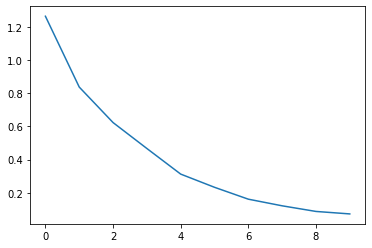

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(train_losses)

After instantiating a trained model, we can then score the test data and compute its accuracy. We then print the classification report and plot a confusion matrix.


In [ ]:
batch_size = 8

test_data = TensorDataset(test_x, test_m)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

outputs = []
with torch.no_grad():
    model.eval()
    for k, (mb_x, mb_m) in enumerate(test_dataloader):
        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)
        output = model(mb_x, attention_mask=mb_m)
        outputs.append(output[0].to('cpu'))

outputs = torch.cat(outputs)

In [ ]:
_, predicted_values = torch.max(outputs, 1)
predicted_values = predicted_values.numpy()
true_values = test_y.numpy()

In [ ]:
test_accuracy = np.sum(predicted_values == true_values) / len(true_values)
print ("Test Accuracy:", test_accuracy)

Test Accuracy: 0.6802030456852792


In [ ]:
import warnings
warnings.filterwarnings('always')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(true_values, predicted_values, target_names=[str(l) for l in label_values]))

              precision    recall  f1-score   support

        zero       0.73      0.66      0.69        77
         one       0.87      0.87      0.87        46
         two       0.54      0.64      0.58        47
       three       0.52      0.48      0.50        27

    accuracy                           0.68       197
   macro avg       0.66      0.66      0.66       197
weighted avg       0.69      0.68      0.68       197



Analysis

In [ ]:
import itertools

# plot confusion matrix
# code borrowed from scikit-learn.org
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm_test = confusion_matrix(true_values, predicted_values)

np.set_printoptions(precision=2)

plt.figure(figsize=(6,6))
plot_confusion_matrix(cm_test, classes=label_values, title='Confusion Matrix - Test Dataset')
plt.figure(figsize=(6,6))
plot_confusion_matrix(cm_test, classes=label_values, title='Confusion Matrix - Test Dataset', normalize=True)

# END

# BERT LARGE

In [ ]:
!pip install transformers==2.3.0

     |████████████████████████████████| 450kB 4.4MB/s 
     |████████████████████████████████| 890kB 11.0MB/s 
     |████████████████████████████████| 1.1MB 14.1MB/s 
     |████████████████████████████████| 133kB 27.7MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 6.7MB 25.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=73e8d5c792aef8cae5fa6adc8a094357388e19ea1ec16e2b54eb8808b677b18a
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
ERROR: botocore 1.19.0 has requirement urllib3<1.26,>=1.25.4; python_version != "3.4", but you'll have urllib3 1.24.3 which is incompatible.


We then load and inspect the dataset we had previously prepared. In order to train faster, we use the sampled version, which contains 10% of the original prepared dataset.

In [ ]:
pip install urllib3==1.25.4

     |████████████████████████████████| 133kB 5.6MB/s 
ERROR: kaggle 1.5.8 has requirement urllib3<1.25,>=1.21.1, but you'll have urllib3 1.25.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
import pandas as pd

df = pd.read_csv('/content/result_31.csv', encoding='latin-1')

In [ ]:
df.shape

(1970, 4)

In [ ]:
df

,ID,Primary,text,Product_Labels
0,1.005030e+05,three,Snake oil Salesmen are not gone. They have jus...,3
1,1.009760e+05,three,Fact check: Gargling water with salt or vinega...,3
2,1.011710e+05,zero,".. this is great advice. Also, stop fighting f...",0
3,1.017920e+05,three,"14 people in Iran died from alcohol poisoning,...",3
4,1.037400e+05,one,"To be fair, China is not the only country alle...",1
...,...,...,...,...
1965,1.230000e+18,one,@TheSecondRevol1 @VincentCrypt46 I have been s...,1
1966,1.230000e+18,one,If anyone is aware of the 5G theory related to...,1
1967,1.230000e+18,one,@ClydeLewis @ClydeLewis have you looked into 5...,1
1968,1.230000e+18,one,How many have the âVirusâ where thereâs...,1


Clean(tweet)

In [ ]:

import re
import string
def clean(tweet):
            
    # Special characters
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)    
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    tweet = re.sub(r"å£3million", "3 million", tweet)
    tweet = re.sub(r"åÀ", "", tweet)
    
    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet)   
            
    # Character entity references
    tweet = re.sub(r"&gt;", ">", tweet)
    tweet = re.sub(r"&lt;", "<", tweet)
    tweet = re.sub(r"&amp;", "&", tweet)
    
    # Typos, slang and informal abbreviations
    tweet = re.sub(r"w/e", "whatever", tweet)
    tweet = re.sub(r"w/", "with", tweet)
    tweet = re.sub(r"USAgov", "USA government", tweet)
    tweet = re.sub(r"recentlu", "recently", tweet)
    tweet = re.sub(r"Ph0tos", "Photos", tweet)
    tweet = re.sub(r"amirite", "am I right", tweet)
    tweet = re.sub(r"exp0sed", "exposed", tweet)
    tweet = re.sub(r"<3", "love", tweet)
    tweet = re.sub(r"amageddon", "armageddon", tweet)
    tweet = re.sub(r"Trfc", "Traffic", tweet)
    tweet = re.sub(r"8/5/2015", "2015-08-05", tweet)
    tweet = re.sub(r"WindStorm", "Wind Storm", tweet)
    tweet = re.sub(r"8/6/2015", "2015-08-06", tweet)
    tweet = re.sub(r"10:38PM", "10:38 PM", tweet)
    tweet = re.sub(r"10:30pm", "10:30 PM", tweet)
    tweet = re.sub(r"16yr", "16 year", tweet)
    tweet = re.sub(r"lmao", "laughing my ass off", tweet)   
    tweet = re.sub(r"TRAUMATISED", "traumatized", tweet)
    
  # re.sub(r"humanconsumption", "human consumption", tweet)
  #   tweet = re.sub(r"Typhoon-Devastated", "Typhoon Devastated", tweet)
  #   tweet = re.sub(r"Meat-Loving", "Meat Loving", tweet)
  #   tweet = re.sub(r"facialabuse", "facial abuse", tweet)
  #   tweet = re.sub(r"LakeCounty", "Lake County", tweet)
  #   tweet = re.sub(r"BeingAuthor", "Being Author", tweet)
  #   tweet = re.sub(r"withheavenly", "with heavenly", tweet)
  #   tweet = re.sub(r"thankU", "thank you", tweet)
  #   tweet = re.sub(r"iTunesMusic", "iTunes Music", tweet)
  #   tweet = re.sub(r"OffensiveContent", "Offensive Content", tweet)
  #   tweet = re.sub(r"WorstSummerJob", "Worst Summer Job", tweet)
  #   tweet = re.sub(r"HarryBeCareful", "Harry Be Careful", tweet)
  #   tweet = re.sub(r"NASASolarSystem", "NASA Solar System", tweet)
  #   tweet = re.sub(r"animalrescue", "animal rescue", tweet)
  #   tweet = re.sub(r"KurtSchlichter", "Kurt Schlichter", tweet)
  #   tweet = re.sub(r"aRmageddon", "armageddon", tweet)
  #   tweet = re.sub(r"Throwingknifes", "Throwing knives", tweet)
  #   tweet = re.sub(r"GodsLove", "God's Love", tweet)
  #   tweet = re.sub(r"bookboost", "book boost", tweet)
  #   tweet = re.sub(r"ibooklove", "I book love", tweet)
  #   tweet = re.sub(r"NestleIndia", "Nestle India", tweet)
  #   tweet = re.sub(r"realDonaldTrump", "Donald Trump", tweet)
  #   tweet = re.sub(r"DavidVonderhaar", "David Vonderhaar", tweet)
  #   tweet = re.sub(r"CecilTheLion", "Cecil The Lion", tweet)
  #   tweet = re.sub(r"weathernetwork", "weather network", tweet)
  #   tweet = re.sub(r"withBioterrorism  # Hashtags and usernames
  #   tweet = re.sub(r"IranDeal", "Iran Deal", tweet)
  #   tweet = re.sub(r"ArianaGrande", "Ariana Grande", tweet)
  #   tweet = re.sub(r"camilacabello97", "camila cabello", tweet) 
  #   tweet = re.sub(r"RondaRousey", "Ronda Rousey", tweet)     
  #   tweet = re.sub(r"MTVHottest", "MTV Hottest", tweet)
  #   tweet = re.sub(r"TrapMusic", "Trap Music", tweet)
  #   tweet = re.sub(r"ProphetMuhammad", "Prophet Muhammad", tweet)
  #   tweet = re.sub(r"PantherAttack", "Panther Attack", tweet)
  #   tweet = re.sub(r"StrategicPatience", "Strategic Patience", tweet)
  #   tweet = re.sub(r"socialnews", "social news", tweet)
  #   tweet = re.sub(r"NASAHurricane", "NASA Hurricane", tweet)
  #   tweet = re.sub(r"onlinecommunities", "online communities", tweet)
  #   tweet = &use", "with Bioterrorism & use", tweet)
  #   tweet = re.sub(r"Hostage&2", "Hostage & 2", tweet)
  #   tweet = re.sub(r"GOPDebate", "GOP Debate", tweet)
  #   tweet = re.sub(r"RickPerry", "Rick Perry", tweet)
  #   tweet = re.sub(r"frontpage", "front page", tweet)
  #   tweet = re.sub(r"NewsInTweets", "News In Tweets", tweet)
  #   tweet = re.sub(r"ViralSpell", "Viral Spell", tweet)
  #   tweet = re.sub(r"til_now", "until now", tweet)
  #   tweet = re.sub(r"volcanoinRussia", "volcano in Russia", tweet)
  #   tweet = re.sub(r"ZippedNews", "Zipped News", tweet)
  #   tweet = re.sub(r"MicheleBachman", "Michele Bachman", tweet)
  #   tweet = re.sub(r"53inch", "53 inch", tweet)
  #   tweet = re.sub(r"KerrickTrial", "Kerrick Trial", tweet)
  #   tweet = re.sub(r"abstorm", "Alberta Storm", tweet)
  #   tweet = re.sub(r"Beyhive", "Beyonce hive", tweet)
  #   tweet = re.sub(r"IDFire", "Idaho Fire", tweet)
  #   tweet = re.sub(r"DETECTADO", "Detected", tweet)
  #   tweet = re.sub(r"RockyFire", "Rocky Fire", tweet)
  #   tweet = re.sub(r"Listen/Buy", "Listen / Buy", tweet)
  #   tweet = re.sub(r"NickCannon", "Nick Cannon", tweet)
  #   tweet = re.sub(r"FaroeIslands", "Faroe Islands", tweet)
  #   tweet = re.sub(r"yycstorm", "Calgary Storm", tweet)
  #   tweet = re.sub(r"IDPs:", "Internally Displaced People :", tweet)
  #   tweet = re.sub(r"ArtistsUnited", "Artists United", tweet)
  #   tweet = re.sub(r"ClaytonBryant", "Clayton Bryant", tweet)
  #   tweet = re.sub(r"jimmyfallon", "jimmy fallon", tweet)
  #   tweet = re.sub(r"justinbieber", "justin bieber", tweet)  
  #   tweet = re.sub(r"UTC2015", "UTC 2015", tweet)
  #   tweet = re.sub(r"Time2015", "Time 2015", tweet)
  #   tweet = re.sub(r"djicemoon", "dj icemoon", tweet)
  #   tweet = re.sub(r"LivingSafely", "Living Safely", tweet)
  #   tweet = re.sub(r"FIFA16", "Fifa 2016", tweet)
  #   tweet = re.sub(r"thisiswhywecanthavenicethings", "this is why we cannot have nice things", tweet)
  #   tweet = re.sub(r"bbcnews", "bbc news", tweet)
  #   tweet = re.sub(r"UndergroundRailraod", "Underground Railraod", tweet)
  #   tweet = re.sub(r"c4news", "c4 news", tweet)
  #   tweet = re.sub(r"OBLITERATION", "obliteration", tweet)
  #   tweet = re.sub(r"MUDSLIDE", "mudslide", tweet)
  #   tweet = re.sub(r"NoSurrender", "No Surrender", tweet)
  #   tweet = re.sub(r"NotExplained", "Not Explained", tweet)
  #   tweet = re.sub(r"greatbritishbakeoff", "great british bake off", tweet)
  #   tweet = re.sub(r"LondonFire", "London Fire", tweet)
  #   tweet = re.sub(r"KOTAWeather", "KOTA Weather", tweet)
  #   tweet = re.sub(r"LuchaUnderground", "Lucha Underground", tweet)
  #   tweet = re.sub(r"KOIN6News", "KOIN 6 News", tweet)
  #   tweet = re.sub(r"LiveOnK2", "Live On K2", tweet)
  #   tweet = re.sub(r"9NewsGoldCoast", "9 News Gold Coast", tweet)
  #   tweet = re.sub(r"nikeplus", "nike plus", tweet)
  #   tweet = re.sub(r"david_cameron", "David Cameron", tweet)
  #   tweet = re.sub(r"peterjukes", "Peter Jukes", tweet)
  #   tweet = re.sub(r"JamesMelville", "James Melville", tweet)
  #   tweet = re.sub(r"megynkelly", "Megyn Kelly", tweet)
  #   tweet = re.sub(r"cnewslive", "C News Live", tweet)
  #   tweet = re.sub(r"JamaicaObserver", "Jamaica Observer", tweet)
  #   tweet = re.sub(r"TweetLikeItsSeptember11th2001", "Tweet like it is september 11th 2001", tweet)
  #   tweet = re.sub(r"cbplawyers", "cbp lawyers", tweet)
  #   tweet = re.sub(r"fewmoretweets", "few more tweets", tweet)
  #   tweet = re.sub(r"BlackLivesMatter", "Black Lives Matter", tweet)
  #   tweet = re.sub(r"cjoyner", "Chris Joyner", tweet)
  #   tweet = re.sub(r"ENGvAUS", "England vs Australia", tweet)
  #   tweet = re.sub(r"ScottWalker", "Scott Walker", tweet)
  #   tweet = re.sub(r"MikeParrActor", "Michael Parr", tweet)
  #   tweet = re.sub(r"4PlayThursdays", "Foreplay Thursdays", tweet)
  #   tweet = re.sub(r"TGF2015", "Tontitown Grape Festival", tweet)
  #   tweet = re.sub(r"realmandyrain", "Mandy Rain", tweet)
  #   tweet = re.sub(r"GraysonDolan", "Grayson Dolan", tweet)
  #   tweet = re.sub(r"ApolloBrown", "Apollo Brown", tweet)
  #   tweet = re.sub(r"saddlebrooke", "Saddlebrooke", tweet)
  #   tweet = re.sub(r"TontitownGrape", "Tontitown Grape", tweet)
  #   tweet = re.sub(r"AbbsWinston", "Abbs Winston", tweet)
  #   tweet = re.sub(r"ShaunKing", "Shaun King", tweet)
  #   tweet = re.sub(r"MeekMill", "Meek Mill", tweet)
  #   tweet = re.sub(r"TornadoGiveaway", "Tornado Giveaway", tweet)
  #   tweet = re.sub(r"GRupdates", "GR updates", tweet)
  #   tweet = re.sub(r"SouthDowns", "South Downs", tweet)
  #   tweet = re.sub(r"braininjury", "brain injury", tweet)
  #   tweet = re.sub(r"auspol", "Australian politics", tweet)
  #   tweet = re.sub(r"PlannedParenthood", "Planned Parenthood", tweet)
  #   tweet = re.sub(r"calgaryweather", "Calgary Weather", tweet)
  #   tweet = re.sub(r"weallheartonedirection", "we all heart one direction", tweet)
  #   tweet = re.sub(r"edsheeran", "Ed Sheeran", tweet)
  #   tweet = re.sub(r"TrueHeroes", "True Heroes", tweet)
  #   tweet = re.sub(r"S3XLEAK", "sex leak", tweet)
  #   tweet = re.sub(r"ComplexMag", "Complex Magazine", tweet)
  #   tweet = re.sub(r"TheAdvocateMag", "The Advocate Magazine", tweet)
  #   tweet = re.sub(r"CityofCalgary", "City of Calgary", tweet)
  #   tweet = re.sub(r"EbolaOutbreak", "Ebola Outbreak", tweet)
  #   tweet = re.sub(r"SummerFate", "Summer Fate", tweet)
  #   tweet = re.sub(r"RAmag", "Royal Academy Magazine", tweet)
  #   tweet = re.sub(r"offers2go", "offers to go", tweet)
  #   tweet = re.sub(r"foodscare", "food scare", tweet)
  #   tweet = re.sub(r"MNPDNashville", "Metropolitan Nashville Police Department", tweet)
  #   tweet = re.sub(r"TfLBusAlerts", "TfL Bus Alerts", tweet)
  #   tweet = re.sub(r"GamerGate", "Gamer Gate", tweet)
  #   tweet = re.sub(r"IHHen", "Humanitarian Relief", tweet)
  #   tweet = re.sub(r"spinningbot", "spinning bot", tweet)
  #   tweet = re.sub(r"ModiMinistry", "Modi Ministry", tweet)
  #   tweet = re.sub(r"TAXIWAYS", "taxi ways", tweet)
  #   tweet = re.sub(r"Calum5SOS", "Calum Hood", tweet)
  #   tweet = re.sub(r"po_st", "po.st", tweet)
  #   tweet = re.sub(r"scoopit", "scoop.it", tweet)
  #   tweet = re.sub(r"UltimaLucha", "Ultima Lucha", tweet)
  #   tweet = re.sub(r"JonathanFerrell", "Jonathan Ferrell", tweet)
  #   tweet = re.sub(r"aria_ahrary", "Aria Ahrary", tweet)
  #   tweet = re.sub(r"rapidcity", "Rapid City", tweet)
  #   tweet = re.sub(r"OutBid", "outbid", tweet)
  #   tweet = re.sub(r"lavenderpoetrycafe", "lavender poetry cafe", tweet)
  #   tweet = re.sub(r"EudryLantiqua", "Eudry Lantiqua", tweet)
  #   tweet = re.sub(r"15PM", "15 PM", tweet)
  #   tweet = re.sub(r"OriginalFunko", "Funko", tweet)
  #   tweet = re.sub(r"rightwaystan", "Richard Tan", tweet)
  #   tweet = re.sub(r"CindyNoonan", "Cindy Noonan", tweet)
  #   tweet = re.sub(r"RT_America", "RT America", tweet)
  #   tweet = re.sub(r"narendramodi", "Narendra Modi", tweet)
  #   tweet = re.sub(r"BakeOffFriends", "Bake Off Friends", tweet)
  #   tweet = re.sub(r"TeamHendrick", "Hendrick Motorsports", tweet)
  #   tweet = re.sub(r"alexbelloli", "Alex Belloli", tweet)
  #   tweet = re.sub(r"itsjustinstuart", "Justin Stuart", tweet)
  #   tweet = re.sub(r"gunsense", "gun sense", tweet)
  #   tweet = re.sub(r"DebateQuestionsWeWantToHear", "debate questions we want to hear", tweet)
  #   tweet = re.sub(r"RoyalCarribean", "Royal Carribean", tweet)
  #   tweet = re.sub(r"samanthaturne19", "Samantha Turner", tweet)
  #   tweet = re.sub(r"JonVoyage", "Jon Stewart", tweet)
  #   tweet = re.sub(r"renew911health", "renew 911 health", tweet)
  #   tweet = re.sub(r"SuryaRay", "Surya Ray", tweet)
  #   tweet = re.sub(r"pattonoswalt", "Patton Oswalt", tweet)
  #   tweet = re.sub(r"minhazmerchant", "Minhaz Merchant", tweet)
  #   tweet = re.sub(r"TLVFaces", "Israel Diaspora Coalition", tweet)
  #   tweet = re.sub(r"pmarca", "Marc Andreessen", tweet)
  #   tweet = re.sub(r"pdx911", "Portland Police", tweet)
  #   tweet = re.sub(r"jamaicaplain", "Jamaica Plain", tweet)
  #   tweet = re.sub(r"Japton", "Arkansas", tweet)
  #   tweet = re.sub(r"RouteComplex", "Route Complex", tweet)
  #   tweet = re.sub(r"INSubcontinent", "Indian Subcontinent", tweet)
  #   tweet = re.sub(r"NJTurnpike", "New Jersey Turnpike", tweet)
  #   tweet = re.sub(r"Politifiact", "PolitiFact", tweet)
  #   tweet = re.sub(r"Hiroshima70", "Hiroshima", tweet)
  #   tweet = re.sub(r"GMMBC", "Greater Mt Moriah Baptist Church", tweet)
  #   tweet = re.sub(r"versethe", "verse the", tweet)
  #   tweet = re.sub(r"TubeStrike", "Tube Strike", tweet)
  #   tweet = re.sub(r"MissionHills", "Mission Hills", tweet)
  #   tweet = re.sub(r"ProtectDenaliWolves", "Protect Denali Wolves", tweet)
  #   tweet = re.sub(r"NANKANA", "Nankana", tweet)
  #   tweet = re.sub(r"SAHIB", "Sahib", tweet)
  #   tweet = re.sub(r"PAKPATTAN", "Pakpattan", tweet)
  #   tweet = re.sub(r"Newz_Sacramento", "News Sacramento", tweet)
  #   tweet = re.sub(r"gofundme", "go fund me", tweet)
  #   tweet = re.sub(r"pmharper", "Stephen Harper", tweet)
  #   tweet = re.sub(r"IvanBerroa", "Ivan Berroa", tweet)
  #   tweet = re.sub(r"LosDelSonido", "Los Del Sonido", tweet)
  #   tweet = re.sub(r"bancodeseries", "banco de series", tweet)
  #   tweet = re.sub(r"timkaine", "Tim Kaine", tweet)
  #   tweet = re.sub(r"IdentityTheft", "Identity Theft", tweet)
  #   tweet = re.sub(r"AllLivesMatter", "All Lives Matter", tweet)
  #   tweet = re.sub(r"mishacollins", "Misha Collins", tweet)
  #   tweet = re.sub(r"BillNeelyNBC", "Bill Neely", tweet)
  #   tweet = re.sub(r"BeClearOnCancer", "be clear on cancer", tweet)
  #   tweet = re.sub(r"Kowing", "Knowing", tweet)
  #   tweet = re.sub(r"ScreamQueens", "Scream Queens", tweet)
  #   tweet = re.sub(r"AskCharley", "Ask Charley", tweet)
  #   tweet = re.sub(r"BlizzHeroes", "Heroes of the Storm", tweet)
  #   tweet = re.sub(r"BradleyBrad47", "Bradley Brad", tweet)
  #   tweet = re.sub(r"HannaPH", "Typhoon Hanna", tweet)
  #   tweet = re.sub(r"meinlcymbals", "MEINL Cymbals", tweet)
  #   tweet = re.sub(r"Ptbo", "Peterborough", tweet)
  #   tweet = re.sub(r"cnnbrk", "CNN Breaking News", tweet)
  #   tweet = re.sub(r"IndianNews", "Indian News", tweet)
  #   tweet = re.sub(r"savebees", "save bees", tweet)
  #   tweet = re.sub(r"GreenHarvard", "Green Harvard", tweet)
  #   tweet = re.sub(r"StandwithPP", "Stand with planned parenthood", tweet)
  #   tweet = re.sub(r"hermancranston", "Herman Cranston", tweet)
  #   tweet = re.sub(r"WMUR9", "WMUR-TV", tweet)
  #   tweet = re.sub(r"RockBottomRadFM", "Rock Bottom Radio", tweet)
  #   tweet = re.sub(r"ameenshaikh3", "Ameen Shaikh", tweet)
  #   tweet = re.sub(r"ProSyn", "Project Syndicate", tweet)
  #   tweet = re.sub(r"Daesh", "ISIS", tweet)
  #   tweet = re.sub(r"s2g", "swear to god", tweet)
  #   tweet = re.sub(r"listenlive", "listen live", tweet)
  #   tweet = re.sub(r"CDCgov", "Centers for Disease Control and Prevention", tweet)
  #   tweet = re.sub(r"FoxNew", "Fox News", tweet)
  #   tweet = re.sub(r"CBSBigBrother", "Big Brother", tweet)
  #   tweet = re.sub(r"JulieDiCaro", "Julie DiCaro", tweet)
  #   tweet = re.sub(r"theadvocatemag", "The Advocate Magazine", tweet)
  #   tweet = re.sub(r"RohnertParkDPS", "Rohnert Park Police Department", tweet)
  #   tweet = re.sub(r"THISIZBWRIGHT", "Bonnie Wright", tweet)
  #   tweet = re.sub(r"Popularmmos", "Popular MMOs", tweet)
  #   tweet = re.sub(r"WildHorses", "Wild Horses", tweet)
  #   tweet = re.sub(r"FantasticFour", "Fantastic Four", tweet)
  #   tweet = re.sub(r"HORNDALE", "Horndale", tweet)
  #   tweet = re.sub(r"PINER", "Piner", tweet)
  #   tweet = re.sub(r"BathAndNorthEastSomerset", "Bath and North East Somerset", tweet)
  #   tweet = re.sub(r"thatswhatfriendsarefor", "that is what friends are for", tweet)
  #   tweet = re.sub(r"residualincome", "residual income", tweet)
  #   tweet = re.sub(r"YahooNewsDigest", "Yahoo News Digest", tweet)
  #   tweet = re.sub(r"MalaysiaAirlines", "Malaysia Airlines", tweet)
  #   tweet = re.sub(r"AmazonDeals", "Amazon Deals", tweet)
  #   tweet = re.sub(r"MissCharleyWebb", "Charley Webb", tweet)
  #   tweet = re.sub(r"shoalstraffic", "shoals traffic", tweet)
  #   tweet = re.sub(r"GeorgeFoster72", "George Foster", tweet)
  #   tweet = re.sub(r"pop2015", "pop 2015", tweet)
  #   tweet = re.sub(r"_PokemonCards_", "Pokemon Cards", tweet)
  #   tweet = re.sub(r"DianneG", "Dianne Gallagher", tweet)
  #   tweet = re.sub(r"KashmirConflict", "Kashmir Conflict", tweet)
  #   tweet = re.sub(r"BritishBakeOff", "British Bake Off", tweet)
  #   tweet = re.sub(r"FreeKashmir", "Free Kashmir", tweet)
  #   tweet = re.sub(r"mattmosley", "Matt Mosley", tweet)
  #   tweet = re.sub(r"BishopFred", "Bishop Fred", tweet)
  #   tweet = re.sub(r"EndConflict", "End Conflict", tweet)
  #   tweet = re.sub(r"EndOccupation", "End Occupation", tweet)
  #   tweet = re.sub(r"UNHEALED", "unhealed", tweet)
  #   tweet = re.sub(r"CharlesDagnall", "Charles Dagnall", tweet)
  #   tweet = re.sub(r"Latestnews", "Latest news", tweet)
  #   tweet = re.sub(r"KindleCountdown", "Kindle Countdown", tweet)
  #   tweet = re.sub(r"NoMoreHandouts", "No More Handouts", tweet)
  #   tweet = re.sub(r"datingtips", "dating tips", tweet)
  #   tweet = re.sub(r"charlesadler", "Charles Adler", tweet)
  #   tweet = re.sub(r"twia", "Texas Windstorm Insurance Association", tweet)
  #   tweet = re.sub(r"txlege", "Texas Legislature", tweet)
  #   tweet = re.sub(r"WindstormInsurer", "Windstorm Insurer", tweet)
  #   tweet = re.sub(r"Newss", "News", tweet)
  #   tweet = re.sub(r"hempoil", "hemp oil", tweet)
  #   tweet = re.sub(r"CommoditiesAre", "Commodities are", tweet)
  #   tweet = re.sub(r"tubestrike", "tube strike", tweet)
  #   tweet = re.sub(r"JoeNBC", "Joe Scarborough", tweet)
  #   tweet = re.sub(r"LiteraryCakes", "Literary Cakes", tweet)
  #   tweet = re.sub(r"TI5", "The International 5", tweet)
  #   tweet = re.sub(r"thehill", "the hill", tweet)
  #   tweet = re.sub(r"3others", "3 others", tweet)
  #   tweet = re.sub(r"stighefootball", "Sam Tighe", tweet)
  #   tweet = re.sub(r"whatstheimportantvideo", "what is the important video", tweet)
  #   tweet = re.sub(r"ClaudioMeloni", "Claudio Meloni", tweet)
  #   tweet = re.sub(r"DukeSkywalker", "Duke Skywalker", tweet)
  #   tweet = re.sub(r"carsonmwr", "Fort Carson", tweet)
  #   tweet = re.sub(r"offdishduty", "off dish duty", tweet)
  #   tweet = re.sub(r"andword", "and word", tweet)
  #   tweet = re.sub(r"rhodeisland", "Rhode Island", tweet)
  #   tweet = re.sub(r"easternoregon", "Eastern Oregon", tweet)
  #   tweet = re.sub(r"WAwildfire", "Washington Wildfire", tweet)
  #   tweet = re.sub(r"fingerrockfire", "Finger Rock Fire", tweet)
  #   tweet = re.sub(r"57am", "57 am", tweet)
  #   tweet = re.sub(r"fingerrockfire", "Finger Rock Fire", tweet)
  #   tweet = re.sub(r"JacobHoggard", "Jacob Hoggard", tweet)
  #   tweet = re.sub(r"newnewnew", "new new new", tweet)
  #   tweet = re.sub(r"under50", "under 50", tweet)
  #   tweet = re.sub(r"getitbeforeitsgone", "get it before it is gone", tweet)
  #   tweet = re.sub(r"freshoutofthebox", "fresh out of the box", tweet)
  #   tweet = re.sub(r"amwriting", "am writing", tweet)
  #   tweet = re.sub(r"Bokoharm", "Boko Haram", tweet)
  #   tweet = re.sub(r"Nowlike", "Now like", tweet)
  #   tweet = re.sub(r"seasonfrom", "season from", tweet)
  #   tweet = re.sub(r"epicente", "epicenter", tweet)
  #   tweet = re.sub(r"epicenterr", "epicenter", tweet)
  #   tweet = re.sub(r"sicklife", "sick life", tweet)
  #   tweet = re.sub(r"yycweather", "Calgary Weather", tweet)
  #   tweet = re.sub(r"calgarysun", "Calgary Sun", tweet)
  #   tweet = re.sub(r"approachng", "approaching", tweet)
  #   tweet = re.sub(r"evng", "evening", tweet)
  #   tweet = re.sub(r"Sumthng", "something", tweet)
  #   tweet = re.sub(r"EllenPompeo", "Ellen Pompeo", tweet)
  #   tweet = re.sub(r"shondarhimes", "Shonda Rhimes", tweet)
  #   tweet = re.sub(r"ABCNetwork", "ABC Network", tweet)
  #   tweet = re.sub(r"SushmaSwaraj", "Sushma Swaraj", tweet)
  #   tweet = re.sub(r"pray4japan", "Pray for Japan", tweet)
  #   tweet = re.sub(r"hope4japan", "Hope for Japan", tweet)
  #   tweet = re.sub(r"Illusionimagess", "Illusion images", tweet)
  #   tweet = re.sub(r"SummerUnderTheStars", "Summer Under The Stars", tweet)
  #   tweet = re.sub(r"ShallWeDance", "Shall We Dance", tweet)
  #   tweet = re.sub(r"TCMParty", "TCM Party", tweet)
  #   tweet = re.sub(r"marijuananews", "marijuana news", tweet)
  #   tweet = re.sub(r"onbeingwithKristaTippett", "on being with Krista Tippett", tweet)
  #   tweet = re.sub(r"Beingtweets", "Being tweets", tweet)
  #   tweet = re.sub(r"newauthors", "new authors", tweet)
  #   tweet = re.sub(r"remedyyyy", "remedy", tweet)
  #   tweet = re.sub(r"44PM", "44 PM", tweet)
  #   tweet = re.sub(r"HeadlinesApp", "Headlines App", tweet)
  #   tweet = re.sub(r"40PM", "40 PM", tweet)
  #   tweet = re.sub(r"myswc", "Severe Weather Center", tweet)
  #   tweet = re.sub(r"ithats", "that is", tweet)
  #   tweet = re.sub(r"icouldsitinthismomentforever", "I could sit in this moment forever", tweet)
  #   tweet = re.sub(r"FatLoss", "Fat Loss", tweet)
  #   tweet = re.sub(r"02PM", "02 PM", tweet)
  #   tweet = re.sub(r"MetroFmTalk", "Metro Fm Talk", tweet)
  #   tweet = re.sub(r"Bstrd", "bastard", tweet)
  #   tweet = re.sub(r"bldy", "bloody", tweet)
  #   tweet = re.sub(r"MetrofmTalk", "Metro Fm Talk", tweet)
  #   tweet = re.sub(r"terrorismturn", "terrorism turn", tweet)
  #   tweet = re.sub(r"BBCNewsAsia", "BBC News Asia", tweet)
  #   tweet = re.sub(r"BehindTheScenes", "Behind The Scenes", tweet)
  #   tweet = re.sub(r"GeorgeTakei", "George Takei", tweet)
  #   tweet = re.sub(r"WomensWeeklyMag", "Womens Weekly Magazine", tweet)
  #   tweet = re.sub(r"SurvivorsGuidetoEarth", "Survivors Guide to Earth", tweet)
  #   tweet = re.sub(r"incubusband", "incubus band", tweet)
  #   tweet = re.sub(r"Babypicturethis", "Baby picture this", tweet)
  #   tweet = re.sub(r"BombEffects", "Bomb Effects", tweet)
  #   tweet = re.sub(r"win10", "Windows 10", tweet)
  #   tweet = re.sub(r"idkidk", "I do not know I do not know", tweet)
  #   tweet = re.sub(r"TheWalkingDead", "The Walking Dead", tweet)
  #   tweet = re.sub(r"amyschumer", "Amy Schumer", tweet)
  #   tweet = re.sub(r"crewlist", "crew list", tweet)
  #   tweet = re.sub(r"Erdogans", "Erdogan", tweet)
  #   tweet = re.sub(r"BBCLive", "BBC Live", tweet)
  #   tweet = re.sub(r"TonyAbbottMHR", "Tony Abbott", tweet)
  #   tweet = re.sub(r"paulmyerscough", "Paul Myerscough", tweet)
  #   tweet = re.sub(r"georgegallagher", "George Gallagher", tweet)
  #   tweet = re.sub(r"JimmieJohnson", "Jimmie Johnson", tweet)
  #   tweet = re.sub(r"pctool", "pc tool", tweet)
  #   tweet = re.sub(r"DoingHashtagsRight", "Doing Hashtags Right", tweet)
  #   tweet = re.sub(r"ThrowbackThursday", "Throwback Thursday", tweet)
  #   tweet = re.sub(r"SnowBackSunday", "Snowback Sunday", tweet)
  #   tweet = re.sub(r"LakeEffect", "Lake Effect", tweet)
  #   tweet = re.sub(r"RTphotographyUK", "Richard Thomas Photography UK", tweet)
  #   tweet = re.sub(r"BigBang_CBS", "Big Bang CBS", tweet)
  #   tweet = re.sub(r"writerslife", "writers life", tweet)
  #   tweet = re.sub(r"NaturalBirth", "Natural Birth", tweet)
  #   tweet = re.sub(r"UnusualWords", "Unusual Words", tweet)
  #   tweet = re.sub(r"wizkhalifa", "Wiz Khalifa", tweet)
  #   tweet = re.sub(r"acreativedc", "a creative DC", tweet)
  #   tweet = re.sub(r"vscodc", "vsco DC", tweet)
  #   tweet = re.sub(r"VSCOcam", "vsco camera", tweet)
  #   tweet = re.sub(r"TheBEACHDC", "The beach DC", tweet)
  #   tweet = re.sub(r"buildingmuseum", "building museum", tweet)
  #   tweet = re.sub(r"WorldOil", "World Oil", tweet)
  #   tweet = re.sub(r"redwedding", "red wedding", tweet)
  #   tweet = re.sub(r"AmazingRaceCanada", "Amazing Race Canada", tweet)
  #   tweet = re.sub(r"WakeUpAmerica", "Wake Up America", tweet)
  #   tweet = re.sub(r"\\Allahuakbar\\", "Allahu Akbar", tweet)
  #   tweet = re.sub(r"bleased", "blessed", tweet)
  #   tweet = re.sub(r"nigeriantribune", "Nigerian Tribune", tweet)
  #   tweet = re.sub(r"HIDEO_KOJIMA_EN", "Hideo Kojima", tweet)
  #   tweet = re.sub(r"FusionFestival", "Fusion Festival", tweet)
  #   tweet = re.sub(r"50Mixed", "50 Mixed", tweet)
  #   tweet = re.sub(r"NoAgenda", "No Agenda", tweet)
  #   tweet = re.sub(r"WhiteGenocide", "White Genocide", tweet)
  #   tweet = re.sub(r"dirtylying", "dirty lying", tweet)
  #   tweet = re.sub(r"SyrianRefugees", "Syrian Refugees", tweet)
  #   tweet = re.sub(r"changetheworld", "change the world", tweet)
  #   tweet = re.sub(r"Ebolacase", "Ebola case", tweet)
  #   tweet = re.sub(r"mcgtech", "mcg technologies", tweet)
  #   tweet = re.sub(r"withweapons", "with weapons", tweet)
  #   tweet = re.sub(r"advancedwarfare", "advanced warfare", tweet)
  #   tweet = re.sub(r"letsFootball", "let us Football", tweet)
  #   tweet = re.sub(r"LateNiteMix", "late night mix", tweet)
  #   tweet = re.sub(r"PhilCollinsFeed", "Phil Collins", tweet)
  #   tweet = re.sub(r"RudyHavenstein", "Rudy Havenstein", tweet)
  #   tweet = re.sub(r"22PM", "22 PM", tweet)
  #   tweet = re.sub(r"54am", "54 AM", tweet)
  #   tweet = re.sub(r"38am", "38 AM", tweet)
  #   tweet = re.sub(r"OldFolkExplainStuff", "Old Folk Explain Stuff", tweet)
  #   tweet = re.sub(r"BlacklivesMatter", "Black Lives Matter", tweet)
  #   tweet = re.sub(r"InsaneLimits", "Insane Limits", tweet)
  #   tweet = re.sub(r"youcantsitwithus", "you cannot sit with us", tweet)
  #   tweet = re.sub(r"2k15", "2015", tweet)
  #   tweet = re.sub(r"TheIran", "Iran", tweet)
  #   tweet = re.sub(r"JimmyFallon", "Jimmy Fallon", tweet)
  #   tweet = re.sub(r"AlbertBrooks", "Albert Brooks", tweet)
  #   tweet = re.sub(r"defense_news", "defense news", tweet)
  #   tweet = re.sub(r"nuclearrcSA", "Nuclear Risk Control Self Assessment", tweet)
  #   tweet = re.sub(r"Auspol", "Australia Politics", tweet)
  #   tweet = re.sub(r"NuclearPower", "Nuclear Power", tweet)
  #   tweet = re.sub(r"WhiteTerrorism", "White Terrorism", tweet)
  #   tweet = re.sub(r"truthfrequencyradio", "Truth Frequency Radio", tweet)
  #   tweet = re.sub(r"ErasureIsNotEquality", "Erasure is not equality", tweet)
  #   tweet = re.sub(r"ProBonoNews", "Pro Bono News", tweet)
  #   tweet = re.sub(r"JakartaPost", "Jakarta Post", tweet)
  #   tweet = re.sub(r"toopainful", "too painful", tweet)
  #   tweet = re.sub(r"melindahaunton", "Melinda Haunton", tweet)
  #   tweet = re.sub(r"NoNukes", "No Nukes", tweet)
  #   tweet = re.sub(r"curryspcworld", "Currys PC World", tweet)
  #   tweet = re.sub(r"ineedcake", "I need cake", tweet)
  #   tweet = re.sub(r"blackforestgateau", "black forest gateau", tweet)
  #   tweet = re.sub(r"BBCOne", "BBC One", tweet)
  #   tweet = re.sub(r"AlexxPage", "Alex Page", tweet)
  #   tweet = re.sub(r"jonathanserrie", "Jonathan Serrie", tweet)
  #   tweet = re.sub(r"SocialJerkBlog", "Social Jerk Blog", tweet)
  #   tweet = re.sub(r"ChelseaVPeretti", "Chelsea Peretti", tweet)
  #   tweet = re.sub(r"irongiant", "iron giant", tweet)
  #   tweet = re.sub(r"RonFunches", "Ron Funches", tweet)
  #   tweet = re.sub(r"TimCook", "Tim Cook", tweet)
  #   tweet = re.sub(r"sebastianstanisaliveandwell", "Sebastian Stan is alive and well", tweet)
  #   tweet = re.sub(r"Madsummer", "Mad summer", tweet)
  #   tweet = re.sub(r"NowYouKnow", "Now you know", tweet)
  #   tweet = re.sub(r"concertphotography", "concert photography", tweet)
  #   tweet = re.sub(r"TomLandry", "Tom Landry", tweet)
  #   tweet = re.sub(r"showgirldayoff", "show girl day off", tweet)
  #   tweet = re.sub(r"Yougslavia", "Yugoslavia", tweet)
  #   tweet = re.sub(r"QuantumDataInformatics", "Quantum Data Informatics", tweet)
  #   tweet = re.sub(r"FromTheDesk", "From The Desk", tweet)
  #   tweet = re.sub(r"TheaterTrial", "Theater Trial", tweet)
  #   tweet = re.sub(r"CatoInstitute", "Cato Institute", tweet)
  #   tweet = re.sub(r"EmekaGift", "Emeka Gift", tweet)
  #   tweet = re.sub(r"LetsBe_Rational", "Let us be rational", tweet)
  #   tweet = re.sub(r"Cynicalreality", "Cynical reality", tweet)
  #   tweet = re.sub(r"FredOlsenCruise", "Fred Olsen Cruise", tweet)
  #   tweet = re.sub(r"NotSorry", "not sorry", tweet)
  #   tweet = re.sub(r"UseYourWords", "use your words", tweet)
  #   tweet = re.sub(r"WordoftheDay", "word of the day", tweet)
  #   tweet = re.sub(r"Dictionarycom", "Dictionary.com", tweet)
  #   tweet = re.sub(r"TheBrooklynLife", "The Brooklyn Life", tweet)
  #   tweet = re.sub(r"jokethey", "joke they", tweet)
  #   tweet = re.sub(r"nflweek1picks", "NFL week 1 picks", tweet)
  #   tweet = re.sub(r"uiseful", "useful", tweet)
  #   tweet = re.sub(r"JusticeDotOrg", "The American Association for Justice", tweet)
  #   tweet = re.sub(r"autoaccidents", "auto accidents", tweet)
  #   tweet = re.sub(r"SteveGursten", "Steve Gursten", tweet)
  #   tweet = re.sub(r"MichiganAutoLaw", "Michigan Auto Law", tweet)
  #   tweet = re.sub(r"birdgang", "bird gang", tweet)
  #   tweet = re.sub(r"nflnetwork", "NFL Network", tweet)
  #   tweet = re.sub(r"NYDNSports", "NY Daily News Sports", tweet)
  #   tweet = re.sub(r"RVacchianoNYDN", "Ralph Vacchiano NY Daily News", tweet)
  #   tweet = re.sub(r"EdmontonEsks", "Edmonton Eskimos", tweet)
  #   tweet = re.sub(r"david_brelsford", "David Brelsford", tweet)
  #   tweet = re.sub(r"TOI_India", "The Times of India", tweet)
  #   tweet = re.sub(r"hegot", "he got", tweet)
  #   tweet = re.sub(r"SkinsOn9", "Skins on 9", tweet)
  #   tweet = re.sub(r"sothathappened", "so that happened", tweet)
  #   tweet = re.sub(r"LCOutOfDoors", "LC Out Of Doors", tweet)
  #   tweet = re.sub(r"NationFirst", "Nation First", tweet)
  #   tweet = re.sub(r"IndiaToday", "India Today", tweet)
  #   tweet = re.sub(r"HLPS", "helps", tweet)
  #   tweet = re.sub(r"HOSTAGESTHROSW", "hostages throw", tweet)
  #   tweet = re.sub(r"SNCTIONS", "sanctions", tweet)
  #   tweet = re.sub(r"BidTime", "Bid Time", tweet)
  #   tweet = re.sub(r"crunchysensible", "crunchy sensible", tweet)
  #   tweet = re.sub(r"RandomActsOfRomance", "Random acts of romance", tweet)
  #   tweet = re.sub(r"MomentsAtHill", "Moments at hill", tweet)
  #   tweet = re.sub(r"eatshit", "eat shit", tweet)
  #   tweet = re.sub(r"liveleakfun", "live leak fun", tweet)
  #   tweet = re.sub(r"SahelNews", "Sahel News", tweet)
  #   tweet = re.sub(r"abc7newsbayarea", "ABC 7 News Bay Area", tweet)
  #   tweet = re.sub(r"facilitiesmanagement", "facilities management", tweet)
  #   tweet = re.sub(r"facilitydude", "facility dude", tweet)
  #   tweet = re.sub(r"CampLogistics", "Camp logistics", tweet)
  #   tweet = re.sub(r"alaskapublic", "Alaska public", tweet)
  #   tweet = re.sub(r"MarketResearch", "Market Research", tweet)
  #   tweet = re.sub(r"AccuracyEsports", "Accuracy Esports", tweet)
  #   tweet = re.sub(r"TheBodyShopAust", "The Body Shop Australia", tweet)
  #   tweet = re.sub(r"yychail", "Calgary hail", tweet)
  #   tweet = re.sub(r"yyctraffic", "Calgary traffic", tweet)
  #   tweet = re.sub(r"eliotschool", "eliot school", tweet)
  #   tweet = re.sub(r"TheBrokenCity", "The Broken City", tweet)
  #   tweet = re.sub(r"OldsFireDept", "Olds Fire Department", tweet)
  #   tweet = re.sub(r"RiverComplex", "River Complex", tweet)
  #   tweet = re.sub(r"fieldworksmells", "field work smells", tweet)
  #   tweet = re.sub(r"IranElection", "Iran Election", tweet)
  #   tweet = re.sub(r"glowng", "glowing", tweet)
  #   tweet = re.sub(r"kindlng", "kindling", tweet)
  #   tweet = re.sub(r"riggd", "rigged", tweet)
  #   tweet = re.sub(r"slownewsday", "slow news day", tweet)
  #   tweet = re.sub(r"MyanmarFlood", "Myanmar Flood", tweet)
  #   tweet = re.sub(r"abc7chicago", "ABC 7 Chicago", tweet)
  #   tweet = re.sub(r"copolitics", "Colorado Politics", tweet)
  #   tweet = re.sub(r"AdilGhumro", "Adil Ghumro", tweet)
  #   tweet = re.sub(r"netbots", "net bots", tweet)
  #   tweet = re.sub(r"byebyeroad", "bye bye road", tweet)
  #   tweet = re.sub(r"massiveflooding", "massive flooding", tweet)
  #   tweet = re.sub(r"EndofUS", "End of United States", tweet)
  #   tweet = re.sub(r"35PM", "35 PM", tweet)
  #   tweet = re.sub(r"greektheatrela", "Greek Theatre Los Angeles", tweet)
  #   tweet = re.sub(r"76mins", "76 minutes", tweet)
  #   tweet = re.sub(r"publicsafetyfirst", "public safety first", tweet)
  #   tweet = re.sub(r"livesmatter", "lives matter", tweet)
  #   tweet = re.sub(r"myhometown", "my hometown", tweet)
  #   tweet = re.sub(r"tankerfire", "tanker fire", tweet)
  #   tweet = re.sub(r"MEMORIALDAY", "memorial day", tweet)
  #   tweet = re.sub(r"MEMORIAL_DAY", "memorial day", tweet)
  #   tweet = re.sub(r"instaxbooty", "instagram booty", tweet)
  #   tweet = re.sub(r"Jerusalem_Post", "Jerusalem Post", tweet)
  #   tweet = re.sub(r"WayneRooney_INA", "Wayne Rooney", tweet)
  #   tweet = re.sub(r"VirtualReality", "Virtual Reality", tweet)
  #   tweet = re.sub(r"OculusRift", "Oculus Rift", tweet)
  #   tweet = re.sub(r"OwenJones84", "Owen Jones", tweet)
  #   tweet = re.sub(r"jeremycorbyn", "Jeremy Corbyn", tweet)
  #   tweet = re.sub(r"paulrogers002", "Paul Rogers", tweet)
  #   tweet = re.sub(r"mortalkombatx", "Mortal Kombat X", tweet)
  #   tweet = re.sub(r"mortalkombat", "Mortal Kombat", tweet)
  #   tweet = re.sub(r"FilipeCoelho92", "Filipe Coelho", tweet)
  #   tweet = re.sub(r"OnlyQuakeNews", "Only Quake News", tweet)
  #   tweet = re.sub(r"kostumes", "costumes", tweet)
  #   tweet = re.sub(r"YEEESSSS", "yes", tweet)
  #   tweet = re.sub(r"ToshikazuKatayama", "Toshikazu Katayama", tweet)
  #   tweet = re.sub(r"IntlDevelopment", "Intl Development", tweet)
  #   tweet = re.sub(r"ExtremeWeather", "Extreme Weather", tweet)
  #   tweet = re.sub(r"WereNotGruberVoters", "We are not gruber voters", tweet)
  #   tweet = re.sub(r"NewsThousands", "News Thousands", tweet)
  #   tweet = re.sub(r"EdmundAdamus", "Edmund Adamus", tweet)
  #   tweet = re.sub(r"EyewitnessWV", "Eye witness WV", tweet)
  #   tweet = re.sub(r"PhiladelphiaMuseu", "Philadelphia Museum", tweet)
  #   tweet = re.sub(r"DublinComicCon", "Dublin Comic Con", tweet)
  #   tweet = re.sub(r"NicholasBrendon", "Nicholas Brendon", tweet)
  #   tweet = re.sub(r"Alltheway80s", "All the way 80s", tweet)
  #   tweet = re.sub(r"FromTheField", "From the field", tweet)
  #   tweet = re.sub(r"NorthIowa", "North Iowa", tweet)
  #   tweet = re.sub(r"WillowFire", "Willow Fire", tweet)
  #   tweet = re.sub(r"MadRiverComplex", "Mad River Complex", tweet)
  #   tweet = re.sub(r"feelingmanly", "feeling manly", tweet)
  #   tweet = re.sub(r"stillnotoverit", "still not over it", tweet)
  #   tweet = re.sub(r"FortitudeValley", "Fortitude Valley", tweet)
  #   tweet = re.sub(r"CoastpowerlineTramTr", "Coast powerline", tweet)
  #   tweet = re.sub(r"ServicesGold", "Services Gold", tweet)
  #   tweet = re.sub(r"NewsbrokenEmergency", "News broken emergency", tweet)
  #   tweet = re.sub(r"Evaucation", "evacuation", tweet)
  #   tweet = re.sub(r"leaveevacuateexitbe", "leave evacuate exit be", tweet)
  #   tweet = re.sub(r"P_EOPLE", "PEOPLE", tweet)
  #   tweet = re.sub(r"Tubestrike", "tube strike", tweet)
  #   tweet = re.sub(r"CLASS_SICK", "CLASS SICK", tweet)
  #   tweet = re.sub(r"localplumber", "local plumber", tweet)
  #   tweet = re.sub(r"awesomejobsiri", "awesome job siri", tweet)
  #   tweet = re.sub(r"PayForItHow", "Pay for it how", tweet)
  #   tweet = re.sub(r"ThisIsAfrica", "This is Africa", tweet)
  #   tweet = re.sub(r"crimeairnetwork", "crime air network", tweet)
  #   tweet = re.sub(r"KimAcheson", "Kim Acheson", tweet)
  #   tweet = re.sub(r"cityofcalgary", "City of Calgary", tweet)
  #   tweet = re.sub(r"prosyndicate", "pro syndicate", tweet)
  #   tweet = re.sub(r"660NEWS", "660 NEWS", tweet)
  #   tweet = re.sub(r"BusInsMagazine", "Business Insurance Magazine", tweet)
  #   tweet = re.sub(r"wfocus", "focus", tweet)
  #   tweet = re.sub(r"ShastaDam", "Shasta Dam", tweet)
  #   tweet = re.sub(r"go2MarkFranco", "Mark Franco", tweet)
  #   tweet = re.sub(r"StephGHinojosa", "Steph Hinojosa", tweet)
  #   tweet = re.sub(r"Nashgrier", "Nash Grier", tweet)
  #   tweet = re.sub(r"NashNewVideo", "Nash new video", tweet)
  #   tweet = re.sub(r"IWouldntGetElectedBecause", "I would not get elected because", tweet)
  #   tweet = re.sub(r"SHGames", "Sledgehammer Games", tweet)
  #   tweet = re.sub(r"bedhair", "bed hair", tweet)
  #   tweet = re.sub(r"JoelHeyman", "Joel Heyman", tweet)
  #   tweet = re.sub(r"viaYouTube", "via YouTube", tweet)
           
    # Urls
    tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)
        
    # Words with punctuations and special characters
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`"
    for p in punctuations:
        tweet = tweet.replace(p, f' {p} ')
        
    # ... and ..
    tweet = tweet.replace('...', ' ... ')
    if '...' not in tweet:
        tweet = tweet.replace('..', ' ... ')      
        
    # # Acronyms
    # tweet = re.sub(r"MH370", "Malaysia Airlines Flight 370", tweet)
    # tweet = re.sub(r"mÌ¼sica", "music", tweet)
    # tweet = re.sub(r"okwx", "Oklahoma City Weather", tweet)
    # tweet = re.sub(r"arwx", "Arkansas Weather", tweet)    
    # tweet = re.sub(r"gawx", "Georgia Weather", tweet)  
    # tweet = re.sub(r"scwx", "South Carolina Weather", tweet)  
    # tweet = re.sub(r"cawx", "California Weather", tweet)
    # tweet = re.sub(r"tnwx", "Tennessee Weather", tweet)
    # tweet = re.sub(r"azwx", "Arizona Weather", tweet)  
    # tweet = re.sub(r"alwx", "Alabama Weather", tweet)
    # tweet = re.sub(r"wordpressdotcom", "wordpress", tweet)    
    # tweet = re.sub(r"usNWSgov", "United States National Weather Service", tweet)
    # tweet = re.sub(r"Suruc", "Sanliurfa", tweet)   
    
    # Grouping same words without embeddings
    tweet = re.sub(r"Bestnaijamade", "bestnaijamade", tweet)
    tweet = re.sub(r"SOUDELOR", "Soudelor", tweet)

    tweet = re.sub(r'https?://\S+|www\.\S+',r'',tweet)
    tweet = re.sub(r'<.*?>',r'',tweet)
    tweet = re.sub("["
                    u"\U0001F600-\U0001F64F"  # emoticons
                    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                    u"\U0001F680-\U0001F6FF"  # transport & map symbols
                    u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                    u"\U00002702-\U000027B0"
                    u"\U000024C2-\U0001F251"
                    "]+",r'', tweet, flags=re.UNICODE)
    table=str.maketrans('','',string.punctuation)
    return tweet.translate(table).lower()

In [ ]:
df['clean_text'] = df['text'].apply(lambda x: clean(x))

In [ ]:
df['Product_Label']=df['Product_Labels']

In [ ]:
df['Complaint']=df['clean_text']

In [ ]:
df['Product']=df['Primary']

In [ ]:
df

,ID,Primary,text,Product_Labels,clean_text,Product_Label,Complaint,Product
0,1.005030e+05,three,Snake oil Salesmen are not gone. They have jus...,3,snake oil salesmen are not gone they have ju...,3,snake oil salesmen are not gone they have ju...,three
1,1.009760e+05,three,Fact check: Gargling water with salt or vinega...,3,fact check gargling water with salt or vineg...,3,fact check gargling water with salt or vineg...,three
2,1.011710e+05,zero,".. this is great advice. Also, stop fighting f...",0,this is great advice also stop fighting...,0,this is great advice also stop fighting...,zero
3,1.017920e+05,three,"14 people in Iran died from alcohol poisoning,...",3,14 people in iran died from alcohol poisoning ...,3,14 people in iran died from alcohol poisoning ...,three
4,1.037400e+05,one,"To be fair, China is not the only country alle...",1,to be fair china is not the only country alleg...,1,to be fair china is not the only country alleg...,one
...,...,...,...,...,...,...,...,...
1965,1.230000e+18,one,@TheSecondRevol1 @VincentCrypt46 I have been s...,1,thesecondrevol1 vincentcrypt46 i have been...,1,thesecondrevol1 vincentcrypt46 i have been...,one
1966,1.230000e+18,one,If anyone is aware of the 5G theory related to...,1,if anyone is aware of the 5g theory related to...,1,if anyone is aware of the 5g theory related to...,one
1967,1.230000e+18,one,@ClydeLewis @ClydeLewis have you looked into 5...,1,clydelewis clydelewis have you looked into...,1,clydelewis clydelewis have you looked into...,one
1968,1.230000e+18,one,How many have the âVirusâ where thereâs...,1,how many have the âvirusâ where thereâs...,1,how many have the âvirusâ where thereâs...,one


In [ ]:
df.head(10)

,ID,Primary,text,Product_Labels,clean_text,Product_Label,Complaint,Product
0,100503.0,three,Snake oil Salesmen are not gone. They have jus...,3,snake oil salesmen are not gone they have ju...,3,snake oil salesmen are not gone they have ju...,three
1,100976.0,three,Fact check: Gargling water with salt or vinega...,3,fact check gargling water with salt or vineg...,3,fact check gargling water with salt or vineg...,three
2,101171.0,zero,".. this is great advice. Also, stop fighting f...",0,this is great advice also stop fighting...,0,this is great advice also stop fighting...,zero
3,101792.0,three,"14 people in Iran died from alcohol poisoning,...",3,14 people in iran died from alcohol poisoning ...,3,14 people in iran died from alcohol poisoning ...,three
4,103740.0,one,"To be fair, China is not the only country alle...",1,to be fair china is not the only country alleg...,1,to be fair china is not the only country alleg...,one
5,108359.0,three,Cocaine does NOT cure #coronavirus: French gov...,3,cocaine does not cure coronavirus french g...,3,cocaine does not cure coronavirus french g...,three
6,108430.0,three,2008 Research paper demonstrating various esse...,3,2008 research paper demonstrating various esse...,3,2008 research paper demonstrating various esse...,three
7,110352.0,three,@SwerveChris @FakeNewsRehab @RudyGiuliani http...,3,swervechris fakenewsrehab rudygiuliani ...,3,swervechris fakenewsrehab rudygiuliani ...,three
8,110704.0,three,@wevarts @oliverdarcy @RudyGiuliani @charlieki...,3,wevarts oliverdarcy rudygiuliani charl...,3,wevarts oliverdarcy rudygiuliani charl...,three
9,110956.0,zero,Wasn't it great when our only health concerns ...,0,wasn t it great when our only health concerns...,0,wasn t it great when our only health concerns...,zero


In [ ]:
label_counts = pd.DataFrame(df['Product'].value_counts())
label_counts

,Product
zero,768
two,468
one,462
three,272


Here we create an array with the label names in the order they were numerically encoded. We use them later when plotting model performance data.

In [ ]:
label_values = list(label_counts.index)
order = list(pd.DataFrame(df['Product_Label'].value_counts()).index)
label_values = [l for _,l in sorted(zip(order, label_values))]

label_values

['zero', 'one', 'two', 'three']

We need to create 2 arrays: one with the textual data, which is our feature data, and one with the numerically encoded labels, representing our target data.

In [ ]:
texts = df['Complaint'].values
labels = df['Product_Label'].values

BERT is a ‘heavy-weight’´model. This makes the training a very resource-intensive process, specially when we are fine-tuning for all model layers. To mitigate this, we can control the sequence length of our input text, which is given by the number of tokens in our input text, plus 2 special tokens to mark the beginning and ending of a text sequence.

In [ ]:
text_lengths = [len(texts[i].split()) for i in range(len(texts))]
print(min(text_lengths))
print(max(text_lengths))

1
90


In [ ]:
sum([1 for i in range(len(text_lengths)) if text_lengths[i] >= 55])

7

Here we instantiate a BERT tokenizer and show an example of a tokenized text. 

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased', do_lower_case=True)



print('Original Text: ', texts[0], '\n')
print('Tokenized Text: ', tokenizer.tokenize(texts[0]), '\n')
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(texts[0])))

Original Text:  snake oil salesmen are not gone   they have just replaced the horse cart with twitter accounts and websites    got an   fda warning letter for advertising and selling the most powerful essential oil that can treat and defend against   covid19   stay safe    

Tokenized Text:  ['snake', 'oil', 'sales', '##men', 'are', 'not', 'gone', 'they', 'have', 'just', 'replaced', 'the', 'horse', 'cart', 'with', 'twitter', 'accounts', 'and', 'websites', 'got', 'an', 'fda', 'warning', 'letter', 'for', 'advertising', 'and', 'selling', 'the', 'most', 'powerful', 'essential', 'oil', 'that', 'can', 'treat', 'and', 'defend', 'against', 'co', '##vid', '##19', 'stay', 'safe'] 

Token IDs:  [7488, 3514, 4341, 3549, 2024, 2025, 2908, 2027, 2031, 2074, 2999, 1996, 3586, 11122, 2007, 10474, 6115, 1998, 11744, 2288, 2019, 17473, 5432, 3661, 2005, 6475, 1998, 4855, 1996, 2087, 3928, 6827, 3514, 2008, 2064, 7438, 1998, 6985, 2114, 2522, 17258, 16147, 2994, 3647]


We then tokenize and encode the entire dataset. In this process, we perform the following:
- tokenize the text as shown above
- encode it to the corresponding numeric values for each token.
- truncate it to the maximum sequence length of 55.
- pad the tokens positions greater than 55.
- include the special token IDs to mark the beginning and end of each sequence.

In [ ]:
text_ids = [tokenizer.encode(text, max_length=55, pad_to_max_length=True) for text in texts]

text_ids[0]

[101,
 7488,
 3514,
 4341,
 3549,
 2024,
 2025,
 2908,
 2027,
 2031,
 2074,
 2999,
 1996,
 3586,
 11122,
 2007,
 10474,
 6115,
 1998,
 11744,
 2288,
 2019,
 17473,
 5432,
 3661,
 2005,
 6475,
 1998,
 4855,
 1996,
 2087,
 3928,
 6827,
 3514,
 2008,
 2064,
 7438,
 1998,
 6985,
 2114,
 2522,
 17258,
 16147,
 2994,
 3647,
 102,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
text_ids_lengths = [len(text_ids[i]) for i in range(len(text_ids))]
print(min(text_ids_lengths))
print(max(text_ids_lengths))

55
55


To fine-tune our model, we need two inputs: one array of token IDs (created above) and one array of a corresponding binary mask, called attention mask in the BERT model specification. Each attention mask has the same length of the corresponding input sequence and has a 0 if the corresponding token is a pad token, or a 1 otherwise. 

In [ ]:
att_masks = []
for ids in text_ids:
    masks = [int(id > 0) for id in ids]
    att_masks.append(masks)
    
att_masks[0]

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

Here we split the input and output arrays created before into train, validation, and test sets. We use 80% of the data for training, 10% for training validation, and 10% for final testing.

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_val_x, train_y, test_val_y = train_test_split(text_ids, labels, random_state=11, test_size=0.2, stratify=labels)
train_m, test_val_m = train_test_split(att_masks, random_state=11, test_size=0.2)

test_x, val_x, test_y, val_y = train_test_split(test_val_x, test_val_y, random_state=11, test_size=0.5, stratify=test_val_y)
test_m, val_m = train_test_split(test_val_m, random_state=11, test_size=0.5)

We are working with the PyTorch artifacts in the transformers library, therefore we need our model input and output data as PyTorch tensors.

In [ ]:
import torch

train_x = torch.tensor(train_x)
test_x = torch.tensor(test_x)
val_x = torch.tensor(val_x)
train_y = torch.tensor(train_y)
test_y = torch.tensor(test_y)
val_y = torch.tensor(val_y)
train_m = torch.tensor(train_m)
test_m = torch.tensor(test_m)
val_m = torch.tensor(val_m)

print(train_x.shape)
print(test_x.shape)
print(val_x.shape)
print(train_y.shape)
print(test_y.shape)
print(val_y.shape)
print(train_m.shape)
print(test_m.shape)
print(val_m.shape)

torch.Size([1576, 55])
torch.Size([197, 55])
torch.Size([197, 55])
torch.Size([1576])
torch.Size([197])
torch.Size([197])
torch.Size([1576, 55])
torch.Size([197, 55])
torch.Size([197, 55])


To feed data into the model for training, we use Pytorch’s Dataset, DataLoader, and Sampler. For feeding training data, which drives model weights updates, we use the RandomSampler. For feeding the validation data we can use the SequentialSampler.

In [ ]:
 # Checking if GPU is available or not
 !nvidia-smi

Tue Oct 20 06:32:24 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 8

train_data = TensorDataset(train_x, train_m, train_y)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_x, val_m, val_y)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

Here we instantiate our model class. We use a compact version, that is trained through model distillation from a base BERT model and modified to include a classification layer at the output. This compact version has 6 transformer layers instead of 12 as in the original BERT model. Please see [here]( https://github.com/huggingface/transformers/tree/master/examples/distillation) for more details.

In [ ]:
from transformers import BertForSequenceClassification, BertConfig, AdamW

num_labels = len(set(labels))

model = BertForSequenceClassification.from_pretrained('bert-large-uncased', num_labels=num_labels,
                                                            output_attentions=False, output_hidden_states=False)

In [ ]:
num_labels

4

BERT is a very large model. Unless you are freezing model weights in all layers but the classification layer, it is recommended to train it on a GPU.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = model.to(device)

cuda


Here we print the model architecture and all model learnable parameters.

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print('Number of trainable parameters:', count_parameters(model), '\n', model)

Number of trainable parameters: 335145988 
 BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
       

In [ ]:
[n for n, p in model.named_parameters()]

['bert.embeddings.word_embeddings.weight',
 'bert.embeddings.position_embeddings.weight',
 'bert.embeddings.token_type_embeddings.weight',
 'bert.embeddings.LayerNorm.weight',
 'bert.embeddings.LayerNorm.bias',
 'bert.encoder.layer.0.attention.self.query.weight',
 'bert.encoder.layer.0.attention.self.query.bias',
 'bert.encoder.layer.0.attention.self.key.weight',
 'bert.encoder.layer.0.attention.self.key.bias',
 'bert.encoder.layer.0.attention.self.value.weight',
 'bert.encoder.layer.0.attention.self.value.bias',
 'bert.encoder.layer.0.attention.output.dense.weight',
 'bert.encoder.layer.0.attention.output.dense.bias',
 'bert.encoder.layer.0.attention.output.LayerNorm.weight',
 'bert.encoder.layer.0.attention.output.LayerNorm.bias',
 'bert.encoder.layer.0.intermediate.dense.weight',
 'bert.encoder.layer.0.intermediate.dense.bias',
 'bert.encoder.layer.0.output.dense.weight',
 'bert.encoder.layer.0.output.dense.bias',
 'bert.encoder.layer.0.output.LayerNorm.weight',
 'bert.encoder.layer

In the following 5 cells we define our PyTorch optimizer and corresponding parameters, learning rate scheduler, and the training loop for the fine-tuning procedure. We train for 10 epochs.

In [ ]:
learning_rate = 1e-5
adam_epsilon = 1e-8

no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.2},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate, eps=adam_epsilon)

In [ ]:
from transformers import get_linear_schedule_with_warmup

num_epochs = 10
total_steps = len(train_dataloader) * num_epochs

scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

In [ ]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
import numpy as np
import random

seed_val = 11

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
train_losses = []
val_losses = []
num_mb_train = len(train_dataloader)
num_mb_val = len(val_dataloader)

if num_mb_val == 0:
    num_mb_val = 1

for n in range(num_epochs):
    train_loss = 0
    val_loss = 0
    start_time = time.time()
    
    for k, (mb_x, mb_m, mb_y) in enumerate(train_dataloader):
        optimizer.zero_grad()
        model.train()
        
        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)
        mb_y = mb_y.to(device)
        
        outputs = model(mb_x, attention_mask=mb_m, labels=mb_y)
        
        loss = outputs[0]
        #loss = model_loss(outputs[1], mb_y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        
        train_loss += loss.data / num_mb_train
    
    print ("\nTrain loss after itaration %i: %f" % (n+1, train_loss))
    train_losses.append(train_loss.cpu())
    
    with torch.no_grad():
        model.eval()
        
        for k, (mb_x, mb_m, mb_y) in enumerate(val_dataloader):
            mb_x = mb_x.to(device)
            mb_m = mb_m.to(device)
            mb_y = mb_y.to(device)
        
            outputs = model(mb_x, attention_mask=mb_m, labels=mb_y)
            
            loss = outputs[0]
            #loss = model_loss(outputs[1], mb_y)
            
            val_loss += loss.data / num_mb_val
            
        print ("Validation loss after itaration %i: %f" % (n+1, val_loss))
        val_losses.append(val_loss.cpu())
    
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    print(f'Time: {epoch_mins}m {epoch_secs}s')

/usr/local/lib/python3.6/dist-packages/transformers/optimization.py:146: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  exp_avg.mul_(beta1).add_(1.0 - beta1, grad)



Train loss after itaration 1: 1.307759
Validation loss after itaration 1: 1.098660
Time: 1m 25s

Train loss after itaration 2: 0.906865
Validation loss after itaration 2: 0.871359
Time: 1m 26s

Train loss after itaration 3: 0.676544
Validation loss after itaration 3: 0.809871
Time: 1m 26s

Train loss after itaration 4: 0.524132
Validation loss after itaration 4: 0.832292
Time: 1m 26s

Train loss after itaration 5: 0.419839
Validation loss after itaration 5: 1.095985
Time: 1m 26s

Train loss after itaration 6: 0.319559
Validation loss after itaration 6: 1.017313
Time: 1m 26s

Train loss after itaration 7: 0.263214
Validation loss after itaration 7: 1.234148
Time: 1m 26s

Train loss after itaration 8: 0.185777
Validation loss after itaration 8: 1.273066
Time: 1m 26s

Train loss after itaration 9: 0.139775
Validation loss after itaration 9: 1.418784
Time: 1m 26s

Train loss after itaration 10: 0.114112
Validation loss after itaration 10: 1.448836
Time: 1m 25s


After training, we can save the model and necessary configuration parameters, to recreate it later and use it to score the test data. Here we also save the losses computed from both training and validation data.

In [ ]:
import pickle
import os

out_dir = './model'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    
model_to_save = model.module if hasattr(model, 'module') else model
model_to_save.save_pretrained(out_dir)
tokenizer.save_pretrained(out_dir)

with open(out_dir + '/train_losses.pkl', 'wb') as f:
    pickle.dump(train_losses, f)
    
with open(out_dir + '/val_losses.pkl', 'wb') as f:
    pickle.dump(val_losses, f)

In [ ]:
out_dir = './model'

model = BertForSequenceClassification.from_pretrained(out_dir)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

with open(out_dir + '/train_losses.pkl', 'rb') as f:
    train_losses = pickle.load(f)
    
with open(out_dir + '/val_losses.pkl', 'rb') as f:
    val_losses = pickle.load(f)

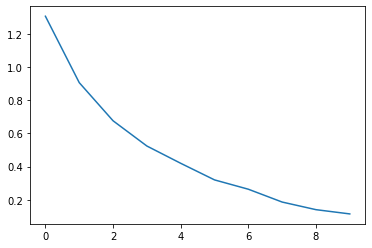

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(train_losses)

After instantiating a trained model, we can then score the test data and compute its accuracy. We then print the classification report and plot a confusion matrix.


In [ ]:
batch_size = 8

test_data = TensorDataset(test_x, test_m)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

outputs = []
with torch.no_grad():
    model.eval()
    for k, (mb_x, mb_m) in enumerate(test_dataloader):
        mb_x = mb_x.to(device)
        mb_m = mb_m.to(device)
        output = model(mb_x, attention_mask=mb_m)
        outputs.append(output[0].to('cpu'))

outputs = torch.cat(outputs)

In [ ]:
_, predicted_values = torch.max(outputs, 1)
predicted_values = predicted_values.numpy()
true_values = test_y.numpy()

In [ ]:
test_accuracy = np.sum(predicted_values == true_values) / len(true_values)
print ("Test Accuracy:", test_accuracy)

Test Accuracy: 0.649746192893401


In [ ]:
import warnings
warnings.filterwarnings('always')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(true_values, predicted_values, target_names=[str(l) for l in label_values]))

              precision    recall  f1-score   support

        zero       0.67      0.65      0.66        77
         one       0.86      0.91      0.88        46
         two       0.51      0.51      0.51        47
       three       0.46      0.44      0.45        27

    accuracy                           0.65       197
   macro avg       0.62      0.63      0.63       197
weighted avg       0.65      0.65      0.65       197



Analysis

In [ ]:
import itertools

# plot confusion matrix
# code borrowed from scikit-learn.org
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[50  5 15  7]
 [ 1 42  1  2]
 [17  1 24  5]
 [ 7  1  7 12]]
Normalized confusion matrix
[[0.65 0.06 0.19 0.09]
 [0.02 0.91 0.02 0.04]
 [0.36 0.02 0.51 0.11]
 [0.26 0.04 0.26 0.44]]


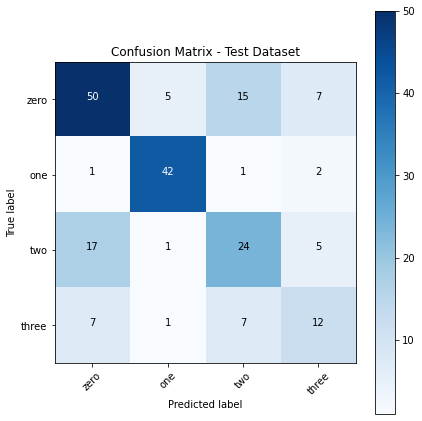

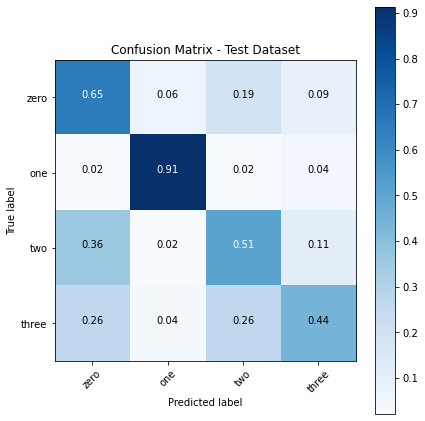

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm_test = confusion_matrix(true_values, predicted_values)

np.set_printoptions(precision=2)

plt.figure(figsize=(6,6))
plot_confusion_matrix(cm_test, classes=label_values, title='Confusion Matrix - Test Dataset')
plt.figure(figsize=(6,6))
plot_confusion_matrix(cm_test, classes=label_values, title='Confusion Matrix - Test Dataset', normalize=True)

# END